In [1]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.storagelevel import StorageLevel
from pyspark.sql.functions import *


In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [30]:
df = pd.read_csv("/Users/diakite/Downloads/Telegram Desktop/Transactions_20220812.csv", sep = "|")
df.head()

/var/folders/b7/pj4f3ws14fl09641x7pq364w0000gn/T/ipykernel_26378/542642858.py:1: DtypeWarning: Columns (0,26,27,44,45,49,51,52,55,58,59,62,63,68,69,70,71,72,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/diakite/Downloads/Telegram Desktop/Transactions_20220812.csv", sep = "|")


,SENDER_MSISDN,RECEIVER_MSISDN,RECEIVER_USER_ID,SENDER_USER_ID,TRANSACTION_AMOUNT,COMMISSIONS_PAID,COMMISSIONS_RECEIVED,COMMISSIONS_OTHERS,SERVICE_CHARGE_RECEIVED,SERVICE_CHARGE_PAID,...,TRANSFER_DONE,INITIATOR_MSISDN,VALIDATOR_MSISDN,INITIATOR_COMMENTS,VALIDATOR_COMMENTS,SENDER_WALLET_NAME,RECIEVER_WALLET_NAME,SENDER_USER_TYPE,RECEIVER_USER_TYPE,TXNMODE
0,0758251037,0708166472,PT111205.1023.000001,PT120919.0946.000005,950.0,0.0,0.0,0.0,0.0,0.0,...,Y,NaN,NaN,NaN,NaN,Normal,Normal,SUBSCRIBER,CHANNEL,NaN
1,0707867601,0758619010,PT111121.1404.000001,PT100810.0845.000005,2650.0,0.0,0.0,0.0,0.0,0.0,...,Y,NaN,NaN,NaN,NaN,Normal,Normal,SUBSCRIBER,CHANNEL,NaN
2,0759046454,0707664024,PT100614.1558.000005,PT210906.1155.631884,95770.0,0.0,0.0,0.0,0.0,0.0,...,Y,NaN,NaN,NaN,NaN,Normal,IRT,CHANNEL,SUBSCRIBER,01#IRTIN#TRN#1IRTV3#FR#NA#1660262489#d0eeb5a4-4889-5815-8#22#+33767761985#CI#TransferTo#TapTap_Send
3,0708517915,0779692523,PT191017.1227.738205,PT101122.1208.000003,550.0,0.0,0.0,0.0,0.0,0.0,...,Y,NaN,NaN,NaN,NaN,Normal,Normal,SUBSCRIBER,CHANNEL,NaN
4,0779956781,0708166472,PT111205.1023.000001,PT160309.1025.393648,200.0,0.0,0.0,0.0,0.0,0.0,...,Y,NaN,NaN,NaN,NaN,Normal,Normal,SUBSCRIBER,CHANNEL,NaN


In [31]:
df.columns

Index(['SENDER_MSISDN', 'RECEIVER_MSISDN', 'RECEIVER_USER_ID',
       'SENDER_USER_ID', 'TRANSACTION_AMOUNT', 'COMMISSIONS_PAID',
       'COMMISSIONS_RECEIVED', 'COMMISSIONS_OTHERS', 'SERVICE_CHARGE_RECEIVED',
       'SERVICE_CHARGE_PAID', 'TAXES', 'SERVICE_TYPE', 'TRANSFER_STATUS',
       'SENDER_PRE_BAL', 'SENDER_POST_BAL', 'RECEIVER_PRE_BAL',
       'RECEIVER_POST_BAL', 'SENDER_ACC_STATUS', 'RECEIVER_ACC_STATUS',
       'ERROR_CODE', 'ERROR_DESC', 'REFERENCE_NUMBER', 'CREATED_ON',
       'CREATED_BY', 'MODIFIED_ON', 'MODIFIED_BY', 'APP_1_DATE', 'APP_2_DATE',
       'TRANSFER_ID', 'TRANSFER_DATETIME', 'SENDER_CATEGORY_CODE',
       'SENDER_DOMAIN_CODE', 'SENDER_GRADE_NAME', 'SENDER_GROUP_ROLE',
       'SENDER_DESIGNATION', 'SENDER_STATE', 'RECEIVER_CATEGORY_CODE',
       'RECEIVER_DOMAIN_CODE', 'RECEIVER_GRADE_NAME', 'RECEIVER_GROUP_ROLE',
       'RECEIVER_DESIGNATION', 'RECEIVER_STATE', 'SENDER_CITY',
       'RECEIVER_CITY', 'APP_1_BY', 'APP_2_BY', 'REQUEST_SOURCE',
       'GATEWAY_

In [35]:
print(df.dtypes)

SENDER_MSISDN            object
RECEIVER_MSISDN          object
RECEIVER_USER_ID         object
SENDER_USER_ID           object
TRANSACTION_AMOUNT      float64
                         ...   
SENDER_WALLET_NAME       object
RECIEVER_WALLET_NAME     object
SENDER_USER_TYPE         object
RECEIVER_USER_TYPE       object
TXNMODE                  object
Length: 84, dtype: object


In [36]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967100 entries, 0 to 967099
Data columns (total 84 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SENDER_MSISDN            966804 non-null  object 
 1   RECEIVER_MSISDN          960246 non-null  object 
 2   RECEIVER_USER_ID         960243 non-null  object 
 3   SENDER_USER_ID           966804 non-null  object 
 4   TRANSACTION_AMOUNT       967100 non-null  float64
 5   COMMISSIONS_PAID         967100 non-null  float64
 6   COMMISSIONS_RECEIVED     967100 non-null  float64
 7   COMMISSIONS_OTHERS       967100 non-null  float64
 8   SERVICE_CHARGE_RECEIVED  967100 non-null  float64
 9   SERVICE_CHARGE_PAID      967100 non-null  float64
 10  TAXES                    967100 non-null  float64
 11  SERVICE_TYPE             967100 non-null  object 
 12  TRANSFER_STATUS          967100 non-null  object 
 13  SENDER_PRE_BAL           967100 non-null  float64
 14  SEND

In [37]:
x = df.columns.to_series().groupby(df.dtypes).groups
x

{float64: ['TRANSACTION_AMOUNT', 'COMMISSIONS_PAID', 'COMMISSIONS_RECEIVED', 'COMMISSIONS_OTHERS', 'SERVICE_CHARGE_RECEIVED', 'SERVICE_CHARGE_PAID', 'TAXES', 'SENDER_PRE_BAL', 'SENDER_POST_BAL', 'RECEIVER_PRE_BAL', 'RECEIVER_POST_BAL', 'ERROR_CODE', 'PAYMENT_NUMBER', 'OTHER_MSISDN', 'TNO_MSISDN', 'TNO_ID', 'INITIATOR_MSISDN', 'VALIDATOR_MSISDN'], object: ['SENDER_MSISDN', 'RECEIVER_MSISDN', 'RECEIVER_USER_ID', 'SENDER_USER_ID', 'SERVICE_TYPE', 'TRANSFER_STATUS', 'SENDER_ACC_STATUS', 'RECEIVER_ACC_STATUS', 'ERROR_DESC', 'REFERENCE_NUMBER', 'CREATED_ON', 'CREATED_BY', 'MODIFIED_ON', 'MODIFIED_BY', 'APP_1_DATE', 'APP_2_DATE', 'TRANSFER_ID', 'TRANSFER_DATETIME', 'SENDER_CATEGORY_CODE', 'SENDER_DOMAIN_CODE', 'SENDER_GRADE_NAME', 'SENDER_GROUP_ROLE', 'SENDER_DESIGNATION', 'SENDER_STATE', 'RECEIVER_CATEGORY_CODE', 'RECEIVER_DOMAIN_CODE', 'RECEIVER_GRADE_NAME', 'RECEIVER_GROUP_ROLE', 'RECEIVER_DESIGNATION', 'RECEIVER_STATE', 'SENDER_CITY', 'RECEIVER_CITY', 'APP_1_BY', 'APP_2_BY', 'REQUEST_SOUR

In [5]:
df[df["RECEIVER_MSISDN"] == "0702173218"]

,SENDER_MSISDN,RECEIVER_MSISDN,RECEIVER_USER_ID,SENDER_USER_ID,TRANSACTION_AMOUNT,COMMISSIONS_PAID,COMMISSIONS_RECEIVED,COMMISSIONS_OTHERS,SERVICE_CHARGE_RECEIVED,SERVICE_CHARGE_PAID,TAXES,SERVICE_TYPE,TRANSFER_STATUS,SENDER_PRE_BAL,SENDER_POST_BAL,RECEIVER_PRE_BAL,RECEIVER_POST_BAL,SENDER_ACC_STATUS,RECEIVER_ACC_STATUS,ERROR_CODE,ERROR_DESC,REFERENCE_NUMBER,CREATED_ON,CREATED_BY,MODIFIED_ON,MODIFIED_BY,APP_1_DATE,APP_2_DATE,TRANSFER_ID,TRANSFER_DATETIME,SENDER_CATEGORY_CODE,SENDER_DOMAIN_CODE,SENDER_GRADE_NAME,SENDER_GROUP_ROLE,SENDER_DESIGNATION,SENDER_STATE,RECEIVER_CATEGORY_CODE,RECEIVER_DOMAIN_CODE,RECEIVER_GRADE_NAME,RECEIVER_GROUP_ROLE,RECEIVER_DESIGNATION,RECEIVER_STATE,SENDER_CITY,RECEIVER_CITY,APP_1_BY,APP_2_BY,REQUEST_SOURCE,GATEWAY_TYPE,TRANSFER_SUBTYPE,PAYMENT_TYPE,PAYMENT_NUMBER,PAYMENT_DATE,REMARKS,ACTION_TYPE,TRANSACTION_TAG,RECONCILIATION_BY,RECONCILIATION_FOR,EXT_TXN_NUMBER,ORIGINAL_REF_NUMBER,ZEBRA_AMBIGUOUS,ATTEMPT_STATUS,OTHER_MSISDN,SENDER_WALLET_NUMBER,RECEIVER_WALLET_NUMBER,SENDER_USER_NAME,RECEIVER_USER_NAME,TNO_MSISDN,TNO_ID,UNREG_FIRST_NAME,UNREG_LAST_NAME,UNREG_DOB,UNREG_ID_NUMBER,BULK_PAYOUT_BATCHID,IS_FINANCIAL,TRANSFER_DONE,INITIATOR_MSISDN,VALIDATOR_MSISDN,INITIATOR_COMMENTS,VALIDATOR_COMMENTS,SENDER_WALLET_NAME,RECIEVER_WALLET_NAME,SENDER_USER_TYPE,RECEIVER_USER_TYPE,TXNMODE


In [6]:
df[df["SENDER_MSISDN"] == "0702173218"]

,SENDER_MSISDN,RECEIVER_MSISDN,RECEIVER_USER_ID,SENDER_USER_ID,TRANSACTION_AMOUNT,COMMISSIONS_PAID,COMMISSIONS_RECEIVED,COMMISSIONS_OTHERS,SERVICE_CHARGE_RECEIVED,SERVICE_CHARGE_PAID,TAXES,SERVICE_TYPE,TRANSFER_STATUS,SENDER_PRE_BAL,SENDER_POST_BAL,RECEIVER_PRE_BAL,RECEIVER_POST_BAL,SENDER_ACC_STATUS,RECEIVER_ACC_STATUS,ERROR_CODE,ERROR_DESC,REFERENCE_NUMBER,CREATED_ON,CREATED_BY,MODIFIED_ON,MODIFIED_BY,APP_1_DATE,APP_2_DATE,TRANSFER_ID,TRANSFER_DATETIME,SENDER_CATEGORY_CODE,SENDER_DOMAIN_CODE,SENDER_GRADE_NAME,SENDER_GROUP_ROLE,SENDER_DESIGNATION,SENDER_STATE,RECEIVER_CATEGORY_CODE,RECEIVER_DOMAIN_CODE,RECEIVER_GRADE_NAME,RECEIVER_GROUP_ROLE,RECEIVER_DESIGNATION,RECEIVER_STATE,SENDER_CITY,RECEIVER_CITY,APP_1_BY,APP_2_BY,REQUEST_SOURCE,GATEWAY_TYPE,TRANSFER_SUBTYPE,PAYMENT_TYPE,PAYMENT_NUMBER,PAYMENT_DATE,REMARKS,ACTION_TYPE,TRANSACTION_TAG,RECONCILIATION_BY,RECONCILIATION_FOR,EXT_TXN_NUMBER,ORIGINAL_REF_NUMBER,ZEBRA_AMBIGUOUS,ATTEMPT_STATUS,OTHER_MSISDN,SENDER_WALLET_NUMBER,RECEIVER_WALLET_NUMBER,SENDER_USER_NAME,RECEIVER_USER_NAME,TNO_MSISDN,TNO_ID,UNREG_FIRST_NAME,UNREG_LAST_NAME,UNREG_DOB,UNREG_ID_NUMBER,BULK_PAYOUT_BATCHID,IS_FINANCIAL,TRANSFER_DONE,INITIATOR_MSISDN,VALIDATOR_MSISDN,INITIATOR_COMMENTS,VALIDATOR_COMMENTS,SENDER_WALLET_NAME,RECIEVER_WALLET_NAME,SENDER_USER_TYPE,RECEIVER_USER_TYPE,TXNMODE


In [1]:
df = pd.read_csv("/Users/diakite/Downloads/random_objectif_hebdomadaire_grossiste_202211.csv", sep = ";")
df.head()

,COMMISSION_AGENT_REEL,COMMISSION_GROSSISTE_FIXE,COMMISSION_GROSSISTE_REEL,COMPTE_PDV,COMPTE_REVENDEUR,LAST_DAY_OF_WEEK,OBJECTIF_AGENT,OBJECTIF_GROSSISTE,OBJECTIF_REALISE_AGENT,OBJECTIF_REALISE_GROSSISTE,OBJECTIF_SEMAINE,PRIME_HEBDOMADAIRE_GROSSISTE,R/O_AGENT,R/O_GROSSISTE,RUNTIME,SEMAINE,TETE_DE_PONT,TRANSACTION_TAG
0,NaN,6050129.0,151253,NaN,NaN,20221107,NaN,NaN,NaN,1638919763,1559197306,151253,NaN,1,08/11/2022 11:20:11,1,788280641,CASHOUT
1,NaN,6698091.0,167452,NaN,NaN,20221107,NaN,NaN,NaN,4302822888,4279525010,167452,NaN,1,08/11/2022 11:20:11,1,708419204,CASHIN
2,NaN,309630.0,7741,NaN,NaN,20221107,NaN,NaN,NaN,34428550,33999050,7741,NaN,1,08/11/2022 11:20:11,1,707068208,CASHOUT
3,NaN,396651.0,9916,NaN,NaN,20221107,NaN,NaN,NaN,23939600,23680296,9916,NaN,1,08/11/2022 11:20:11,1,702155864,CASHOUT
4,NaN,562175.0,14054,NaN,NaN,20221107,NaN,NaN,NaN,85874875,68283889,14054,NaN,1,08/11/2022 11:20:11,1,747118290,CASHIN


In [2]:
df[["COMMISSION_GROSSISTE_FIXE","COMMISSION_GROSSISTE_REEL","LAST_DAY_OF_WEEK","OBJECTIF_REALISE_GROSSISTE",
    "OBJECTIF_SEMAINE","PRIME_HEBDOMADAIRE_GROSSISTE", "R/O_GROSSISTE", "SEMAINE", "TETE_DE_PONT", 
    "TRANSACTION_TAG"]][df["SEMAINE"] == 5].to_csv("/Users/diakite/Downloads/random_objectif_hebdomadaire_grossiste_202211_5.csv", sep = ";", index = False)



In [3]:
df[["COMMISSION_GROSSISTE_FIXE","COMMISSION_GROSSISTE_REEL","LAST_DAY_OF_WEEK","OBJECTIF_REALISE_GROSSISTE",
    "OBJECTIF_SEMAINE","PRIME_HEBDOMADAIRE_GROSSISTE", "R/O_GROSSISTE", "SEMAINE", "TETE_DE_PONT", 
    "TRANSACTION_TAG"]][df["SEMAINE"] == 2].to_csv("/Users/diakite/Downloads/random_objectif_hebdomadaire_grossiste_202211_2.csv", sep = ";", index = False)



In [4]:
df[["COMMISSION_GROSSISTE_FIXE","COMMISSION_GROSSISTE_REEL","LAST_DAY_OF_WEEK","OBJECTIF_REALISE_GROSSISTE",
    "OBJECTIF_SEMAINE","PRIME_HEBDOMADAIRE_GROSSISTE", "R/O_GROSSISTE", "SEMAINE", "TETE_DE_PONT", 
    "TRANSACTION_TAG"]][df["SEMAINE"] == 1].to_csv("/Users/diakite/Downloads/random_objectif_hebdomadaire_grossiste_202211_1.csv", sep = ";", index = False)







In [3]:
df_agent = pd.read_csv("/Users/diakite/Downloads/random_objectif_hebdomadaire_agent_202211.csv", sep = ";")
df_agent.head()


,COMMISSION_AGENT_FIXE,COMMISSION_AGENT_REEL,COMMISSION_GROSSISTE_REEL,COMPTE_PDV,COMPTE_REVENDEUR,LAST_DAY_OF_WEEK,OBJECTIF_AGENT,OBJECTIF_GROSSISTE,OBJECTIF_REALISE_AGENT,OBJECTIF_REALISE_GROSSISTE,...,PRIME_HEBDOMADAIRE_AGENT,R/O_AGENT,R/O_GROSSISTE,RUNTIME,SEMAINE,TETE_DE_PONT,TRANSACTION_TAG,USER_DOMAIN_CODE,USER_GRADE_CODE,USER_GRADE_NAME
0,24669,987,NaN,767268798,767164304,20221107,NaN,NaN,5001600,NaN,...,987,1,NaN,08/11/2022 11:01:25,1,708376099,CASHOUT,NaN,NaN,NaN
1,10374,415,NaN,700493806,700493804,20221107,NaN,NaN,755300,NaN,...,415,1,NaN,08/11/2022 11:01:25,1,700493803,CASHOUT,NaN,NaN,NaN
2,15188,608,NaN,768175665,758014622,20221107,NaN,NaN,1517330,NaN,...,608,1,NaN,08/11/2022 11:01:25,1,758023975,CASHOUT,NaN,NaN,NaN
3,812,32,NaN,768668669,768668668,20221107,NaN,NaN,119450,NaN,...,32,3,NaN,08/11/2022 11:01:25,1,758023975,CASHOUT,NaN,NaN,NaN
4,4108,164,NaN,757317093,749252236,20221107,NaN,NaN,448240,NaN,...,164,1,NaN,08/11/2022 11:01:25,1,708438168,CASHOUT,NaN,NaN,NaN


In [26]:
df_agent[["COMPTE_PDV"]].head(10)

,COMPTE_PDV
0,768013382
1,798191492
2,707360850
3,702164550
4,747953412
5,789518552
6,768379531
7,769474044
8,787519246
9,799094140


In [27]:
df_agent[df_agent["COMPTE_PDV"] == "778855444"].head(10)

,COMMISSION_AGENT_FIXE,COMMISSION_AGENT_REEL,COMMISSION_GROSSISTE_REEL,COMPTE_PDV,COMPTE_REVENDEUR,LAST_DAY_OF_WEEK,OBJECTIF_AGENT,OBJECTIF_GROSSISTE,OBJECTIF_REALISE_AGENT,OBJECTIF_REALISE_GROSSISTE,...,PRIME_HEBDOMADAIRE_AGENT,R/O_AGENT,R/O_GROSSISTE,RUNTIME,SEMAINE,TETE_DE_PONT,TRANSACTION_TAG,USER_DOMAIN_CODE,USER_GRADE_CODE,USER_GRADE_NAME


In [4]:
df_agent[["COMMISSION_AGENT_FIXE","COMMISSION_AGENT_REEL","COMPTE_PDV","COMPTE_REVENDEUR",
    "LAST_DAY_OF_WEEK","OBJECTIF_REALISE_AGENT", "OBJECTIF_SEMAINE", "PRIME_HEBDOMADAIRE_AGENT", "R/O_AGENT", 
    "SEMAINE", "TETE_DE_PONT", "TRANSACTION_TAG"]][df_agent["SEMAINE"] == 5].to_csv("/Users/diakite/Downloads/random_objectif_hebdomadaire_agent_202211_4.csv", sep = ";", index = False)




In [7]:
df_agent[["COMMISSION_AGENT_FIXE","COMMISSION_AGENT_REEL","COMPTE_PDV","COMPTE_REVENDEUR",
    "LAST_DAY_OF_WEEK","OBJECTIF_REALISE_AGENT", "OBJECTIF_SEMAINE", "PRIME_HEBDOMADAIRE_AGENT", "R/O_AGENT", 
    "SEMAINE", "TETE_DE_PONT", "TRANSACTION_TAG"]][df_agent["SEMAINE"] == 2].to_csv("/Users/diakite/Downloads/random_objectif_hebdomadaire_agent_202211_2.csv", sep = ";", index = False)




In [8]:
df_agent[["COMMISSION_AGENT_FIXE","COMMISSION_AGENT_REEL","COMPTE_PDV","COMPTE_REVENDEUR",
    "LAST_DAY_OF_WEEK","OBJECTIF_REALISE_AGENT", "OBJECTIF_SEMAINE", "PRIME_HEBDOMADAIRE_AGENT", "R/O_AGENT", 
    "SEMAINE", "TETE_DE_PONT", "TRANSACTION_TAG"]][df_agent["SEMAINE"] == 1].to_csv("/Users/diakite/Downloads/random_objectif_hebdomadaire_agent_202211_1.csv", sep = ";", index = False)


In [17]:
df = pd.read_csv("/Users/diakite/Downloads/Telegram Desktop/Subscribers_2022_08_01.csv", sep = "|")
df.head()

/var/folders/b7/pj4f3ws14fl09641x7pq364w0000gn/T/ipykernel_26378/3557509496.py:1: DtypeWarning: Columns (15,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/diakite/Downloads/Telegram Desktop/Subscribers_2022_08_01.csv", sep = "|")


,USER_ID,PROFILE_ID,PARENT_USER_ID,PARENT_USER_MSISDN,MSISDN,USER_NAME_PREFIX,USER_FIRST_NAME,USER_LAST_NAME,USER_SHORT_NAME,DOB,...,ID_ISSUE_PLACE,ID_ISSUE_DATE,ID_ISSUE_COUNTRY,ID_EXPIRY_DATE,RESIDENCE_COUNTRY,NATIONALITY,EMPLOYER_NAME,POSTAL_CODE,SOUSCRIPTION_TYPE,MOBILE_GROUP_ROLE
0,PT220801.1623.334681,TCP1605111853.041463,PT220204.1420.940558,0701079499,700699864,Mrs.,YACE BLANDINE,EKPO,NaN,17/08/1985,...,NaN,24/06/2009,NaN,31/12/2022,CI,CI,LOW,225,NOMAD,SubsBCEAORole
1,PT220801.1152.326988,TCP1605111853.041463,PT220204.1436.940889,0758867474,789221512,Mr.,N GUESSAN SERGES,KOFFI,NaN,18/04/1998,...,NaN,29/09/2017,NaN,31/12/2050,CI,CI,LOW,225,NOMAD,SubsBCEAORole
2,SR160818.0952.695531,TCP0806130826.000001,SR160818.0952.695531,0788197184,788197184,Mr.,LANCINE,BAMBA,NaN,18/09/1984,...,NaN,NaN,NaN,NaN,CI,NaN,NaN,NaN,USSD SELF REGISTRATION,SUBS_ROLE
3,PT190612.1346.001526,TCP1605111853.041463,PT190612.1346.001526,0787855293,787855293,Miss,momon,traore,NaN,01/05/1982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USSD SELF REGISTRATION,SubsBCEAORole
4,PT190627.1711.169610,TCP1605111853.041463,PT190627.1711.169610,0759115434,759115434,Mr.,kouame anatole,konan,NaN,06/11/1967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USSD SELF REGISTRATION,SubsBCEAORole


In [18]:
df.to_csv("/Users/diakite/Downloads/Subscribers_2022_08_01.csv", sep = ";", index = False)

In [15]:
df = pd.read_csv("/Users/diakite/Downloads/Telegram Desktop/Transactions_20220815.csv", sep = "|")
df.head()

/var/folders/b7/pj4f3ws14fl09641x7pq364w0000gn/T/ipykernel_22626/2392942586.py:1: DtypeWarning: Columns (0,26,27,44,45,49,51,52,58,59,62,63,68,69,70,71,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/diakite/Downloads/Telegram Desktop/Transactions_20220815.csv", sep = "|")


,SENDER_MSISDN,RECEIVER_MSISDN,RECEIVER_USER_ID,SENDER_USER_ID,TRANSACTION_AMOUNT,COMMISSIONS_PAID,COMMISSIONS_RECEIVED,COMMISSIONS_OTHERS,SERVICE_CHARGE_RECEIVED,SERVICE_CHARGE_PAID,TAXES,SERVICE_TYPE,TRANSFER_STATUS,SENDER_PRE_BAL,SENDER_POST_BAL,RECEIVER_PRE_BAL,RECEIVER_POST_BAL,SENDER_ACC_STATUS,RECEIVER_ACC_STATUS,ERROR_CODE,ERROR_DESC,REFERENCE_NUMBER,CREATED_ON,CREATED_BY,MODIFIED_ON,MODIFIED_BY,APP_1_DATE,APP_2_DATE,TRANSFER_ID,TRANSFER_DATETIME,SENDER_CATEGORY_CODE,SENDER_DOMAIN_CODE,SENDER_GRADE_NAME,SENDER_GROUP_ROLE,SENDER_DESIGNATION,SENDER_STATE,RECEIVER_CATEGORY_CODE,RECEIVER_DOMAIN_CODE,RECEIVER_GRADE_NAME,RECEIVER_GROUP_ROLE,RECEIVER_DESIGNATION,RECEIVER_STATE,SENDER_CITY,RECEIVER_CITY,APP_1_BY,APP_2_BY,REQUEST_SOURCE,GATEWAY_TYPE,TRANSFER_SUBTYPE,PAYMENT_TYPE,PAYMENT_NUMBER,PAYMENT_DATE,REMARKS,ACTION_TYPE,TRANSACTION_TAG,RECONCILIATION_BY,RECONCILIATION_FOR,EXT_TXN_NUMBER,ORIGINAL_REF_NUMBER,ZEBRA_AMBIGUOUS,ATTEMPT_STATUS,OTHER_MSISDN,SENDER_WALLET_NUMBER,RECEIVER_WALLET_NUMBER,SENDER_USER_NAME,RECEIVER_USER_NAME,TNO_MSISDN,TNO_ID,UNREG_FIRST_NAME,UNREG_LAST_NAME,UNREG_DOB,UNREG_ID_NUMBER,BULK_PAYOUT_BATCHID,IS_FINANCIAL,TRANSFER_DONE,INITIATOR_MSISDN,VALIDATOR_MSISDN,INITIATOR_COMMENTS,VALIDATOR_COMMENTS,SENDER_WALLET_NAME,RECIEVER_WALLET_NAME,SENDER_USER_TYPE,RECEIVER_USER_TYPE,TXNMODE
0,0777834729,0779692523,PT191017.1227.738205,PT150512.1129.762051,550.0,0.0,0.0,0.0,0.0,0.0,0.0,MERCHPAY,TS,14398.0,13848.0,41969850.0,41970400.0,Y,Y,NaN,NaN,NaN,15/08/2022 00:02:07,PT191017.1227.738205,15/08/2022 00:02:08,PT150512.1129.762051,NaN,NaN,MP220815.0002.B24891,15/08/2022 00:02:08,SUBS,SUBS,Normal Subscriber,NaN,NaN,NaN,MER,MER,A Grade Merchant,MerchantWP,MARCHAND,NaN,AKOUPE,PROJET PASS ILIMIX,NaN,NaN,BROWSER,USSD,MERCHPAY,NaN,NaN,NaN,NaN,CREATION,PAIEMENT MARCHAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101120000198821,101120012464391,FRANCOIS-XAVIER,PPASSILIMIX MCHD1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,Normal,Normal,SUBSCRIBER,CHANNEL,NaN
1,0707116213,0787515740,PT160112.1533.014946,PT120827.1243.000003,300.0,0.0,0.0,0.0,0.0,0.0,0.0,MERCHPAY,TS,937.5,637.5,5191858.0,5192158.0,Y,Y,NaN,NaN,NaN,15/08/2022 00:02:08,PT120827.1243.000003,15/08/2022 00:02:08,PT120827.1243.000003,NaN,NaN,MP220815.0002.C24440,15/08/2022 00:02:08,SUBS,SUBS,Normal Subscriber,NaN,NaN,NaN,MER,MER,A Grade Merchant,MRCH_001,MARCHAND,NaN,ABIDJAN,NaN,NaN,NaN,BROWSER,USSD,MERCHPAY,NaN,NaN,NaN,NaN,CREATION,PAIEMENT MARCHAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1208271243000003,101120006673842,BOUKARY SIDIKI,ACHATDEPASS MCHD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,Normal,Normal,SUBSCRIBER,CHANNEL,NaN
2,0748498879,0749959978,PT120123.1329.000002,PT201001.1057.790767,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,CASHIN,TS,678479838.0,678476838.0,26.0,3026.0,Y,Y,NaN,NaN,NaN,15/08/2022 00:02:08,PT201001.1057.790767,15/08/2022 00:02:08,PT201001.1057.790767,NaN,NaN,CI220815.0002.A59327,15/08/2022 00:02:08,PICOCAT,PICODOM,PICOSavings,PicoWebGroupeROLE,PICOS,NaN,SUBS,SUBS,Normal Subscriber,NaN,NaN,MODIF LE 221014,NaN,ABIDJAN,NaN,NaN,BROWSER,WEB,CASHIN,NaN,NaN,NaN,NaN,CREATION,RETRAIT EPARGNE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101120016375167,1201231329000002,PICO SAVINGS TP,Alle Jean Florentin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,Normal,Normal,CHANNEL,SUBSCRIBER,01#SAVINGSIN#TRN#1PICOPAMF#CI#XOF#1660521728#PCCI08150002073849Zt#04
3,0709875987,0759094730,PT191017.1227.738206,PT200525.1718.244228,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,MERCHPAY,TS,23135.0,22135.0,41697950.0,41698950.0,Y,Y,NaN,NaN,NaN,15/08/2022 00:01:11,PT191017.1227.738206,15/08/2022 00:01:11,PT200525.1718.244228,NaN,NaN,MP220815.0001.C24317,15/08/2022 00:01:11,SUBS,SUBS,Subscriber Lite BCEAO,NaN,NaN,NaN,MER,MER,A Grade Merchant,MRCH_001,MARCHAND,NaN,YAKRO,PROJET PASS ILIMIX,NaN,NaN,BROWSER,USSD,MERCHPAY,NaN,NaN,NaN,NaN,CREATION,PAIEMENT MARCHAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1011215407830,101120012464392,MAIMOUNA,PPASSILIMIX MCHD2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,Normal,Normal,SUBSCRIBER,CHANNEL,

In [16]:
df[df["SENDER_MSISDN"] == "0700094064"]

,SENDER_MSISDN,RECEIVER_MSISDN,RECEIVER_USER_ID,SENDER_USER_ID,TRANSACTION_AMOUNT,COMMISSIONS_PAID,COMMISSIONS_RECEIVED,COMMISSIONS_OTHERS,SERVICE_CHARGE_RECEIVED,SERVICE_CHARGE_PAID,TAXES,SERVICE_TYPE,TRANSFER_STATUS,SENDER_PRE_BAL,SENDER_POST_BAL,RECEIVER_PRE_BAL,RECEIVER_POST_BAL,SENDER_ACC_STATUS,RECEIVER_ACC_STATUS,ERROR_CODE,ERROR_DESC,REFERENCE_NUMBER,CREATED_ON,CREATED_BY,MODIFIED_ON,MODIFIED_BY,APP_1_DATE,APP_2_DATE,TRANSFER_ID,TRANSFER_DATETIME,SENDER_CATEGORY_CODE,SENDER_DOMAIN_CODE,SENDER_GRADE_NAME,SENDER_GROUP_ROLE,SENDER_DESIGNATION,SENDER_STATE,RECEIVER_CATEGORY_CODE,RECEIVER_DOMAIN_CODE,RECEIVER_GRADE_NAME,RECEIVER_GROUP_ROLE,RECEIVER_DESIGNATION,RECEIVER_STATE,SENDER_CITY,RECEIVER_CITY,APP_1_BY,APP_2_BY,REQUEST_SOURCE,GATEWAY_TYPE,TRANSFER_SUBTYPE,PAYMENT_TYPE,PAYMENT_NUMBER,PAYMENT_DATE,REMARKS,ACTION_TYPE,TRANSACTION_TAG,RECONCILIATION_BY,RECONCILIATION_FOR,EXT_TXN_NUMBER,ORIGINAL_REF_NUMBER,ZEBRA_AMBIGUOUS,ATTEMPT_STATUS,OTHER_MSISDN,SENDER_WALLET_NUMBER,RECEIVER_WALLET_NUMBER,SENDER_USER_NAME,RECEIVER_USER_NAME,TNO_MSISDN,TNO_ID,UNREG_FIRST_NAME,UNREG_LAST_NAME,UNREG_DOB,UNREG_ID_NUMBER,BULK_PAYOUT_BATCHID,IS_FINANCIAL,TRANSFER_DONE,INITIATOR_MSISDN,VALIDATOR_MSISDN,INITIATOR_COMMENTS,VALIDATOR_COMMENTS,SENDER_WALLET_NAME,RECIEVER_WALLET_NAME,SENDER_USER_TYPE,RECEIVER_USER_TYPE,TXNMODE
147,0700094064,NaN,NaN,0700094064,100.0,0.0,0.0,0.0,0.0,0.0,0.0,RC,TF,0.0,0.0,0.00,0.00,NaN,NaN,99033.0,You do not have an Orange Money account. Please go to the nearest Orange Point of Sale to open your account.,NaN,15/08/2022 00:02:18,XXXXX,15/08/2022 00:02:18,XXXXX,NaN,NaN,RC220815.0002.A83326,15/08/2022 00:02:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RC,NaN,NaN,NaN,NaN,CREATION,TOP UP CHANNEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,0700094064,0707202629,PT210920.1608.152186,PT211102.1323.132416,4900.0,0.0,0.0,0.0,0.0,0.0,0.0,CASHIN,TS,128596014.0,128591114.0,160.00,5060.00,Y,Y,NaN,NaN,NaN,15/08/2022 00:00:25,PT211102.1323.132416,15/08/2022 00:00:25,PT211102.1323.132416,NaN,NaN,CI220815.0000.A59312,15/08/2022 00:00:25,PDVEX,DISTEX,PDV Exclusive,MPAY_CU_DE_PDV,PDVEX,NaN,SUBS,SUBS,Subscriber Lite BCEAO,NaN,NaN,MARCORY,NaN,ABIDJAN,NaN,NaN,BROWSER,USSD,CASHIN,NaN,NaN,NaN,NaN,CREATION,CASHIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101120019228078,1011218610254,VISAOBA PDVEX,HUSSEIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,Normal,Normal,CHANNEL,SUBSCRIBER,BEEKEEPING
258,0700094064,0707943118,PT121221.1235.A02855,PT211102.1323.132416,300.0,0.0,0.0,0.0,0.0,0.0,0.0,CASHIN,TS,128591114.0,128590814.0,11108.50,11408.50,Y,Y,NaN,NaN,NaN,15/08/2022 00:01:28,PT211102.1323.132416,15/08/2022 00:01:28,PT211102.1323.132416,NaN,NaN,CI220815.0001.A59320,15/08/2022 00:01:28,PDVEX,DISTEX,PDV Exclusive,MPAY_CU_DE_PDV,PDVEX,NaN,SUBS,SUBS,Normal Subscriber,NaN,NaN,NaN,NaN,ABIDJAN,NaN,NaN,BROWSER,USSD,CASHIN,NaN,NaN,NaN,NaN,CREATION,CASHIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101120019228078,1212211235000007,VISAOBA PDVEX,Moussa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,Normal,Normal,CHANNEL,SUBSCRIBER,NaN
5552,0700094064,0768418632,PT210208.1059.264551,PT211102.1323.132416,8500.0,0.0,0.0,0.0,0.0,0.0,0.0,CASHIN,TS,128577814.0,128569314.0,1355.70,9855.70,Y,Y,NaN,NaN,NaN,15/08/2022 00:48:45,PT211102.1323.132416,15/08/2022 00:48:45,PT211102.1323.132416,NaN,NaN,CI220815.0048.B59519,15/08/2022 00:48:45,PDVEX,DISTEX,PDV Exclusive,MPAY_CU_DE_PDV,PDVEX,NaN,SUBS,SUBS,Normal Subscriber,NaN,NaN,ABIDJAN,NaN,SAN PEDRO,NaN,NaN,BROWSER,USSD,CASHIN,NaN,NaN,NaN,NaN,CREATION,CASHIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101120019228078,1011217030821,VISAOBA PDVEX,LOUA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,Normal,Normal,CHANNEL,SUBSCRIBER,BEEKEEPING
23138,0700094064,0709959034,PT110902.1002.000005,PT211102.1323.132416,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,CASHIN,TS,128445614.0,128425614.0,34309.40,54309.40,Y,Y,NaN,NaN,NaN,15/08/2022 06:34:56,PT211102.1323.132416,15/08/2022 0

In [17]:
df[df["SENDER_MSISDN"] == "0700094064"].shape

(77, 84)

In [18]:
df[df["SENDER_MSISDN"] == "0700094064"].to_csv("/Users/diakite/Downloads/Transactions_20220815_0700094064.csv", sep = ";", index = False)

In [14]:
df[df["SENDER_MSISDN"] == "0700094064"].shape

(77, 84)

In [26]:
schema = """ |-- COMPTE_CLIENT: string (nullable = true) 
 |-- CATEGORIE_CLIENT: string (nullable = true) 
 |-- NOM_RAISON_SOCIALE: string (nullable = true) 
 |-- BIRTHDATE: string (nullable = true) 
 |-- SECOND_CONTACT: string (nullable = true) 
 |-- EMAIL: string (nullable = true) 
 |-- VILLE: string (nullable = true) 
 |-- MSISDN: string (nullable = true) 
 |-- IMSI: string (nullable = true) 
 |-- ICCID: string (nullable = true) 
 |-- PLAN_TARIFAIRE: string (nullable = true) 
 |-- TYPE_OFFRE: string (nullable = true) 
 |-- SEGMENT_OFFRE: string (nullable = true) 
 |-- STATUT_CONTRAT: string (nullable = true) 
 |-- RAISON_STATUT: string (nullable = true) 
 |-- DATE_STATUT: string (nullable = true) 
 |-- USERLASTMOD: string (nullable = true) 
 |-- DATE_SOUSCRIPTION: string (nullable = true) 
 |-- SAISI_PAR_LOGIN: string (nullable = true) 
 |-- DATE_ACTIVATION: string (nullable = true) 
 |-- CH_STATUS_VALIDFROM: string (nullable = true) 
 |-- CO_USERLASTMOD: string (nullable = true) 
 |-- STATUT_SIM: string (nullable = true) 
 |-- DATE_ACTIVATION_SIM: string (nullable = true) 
 |-- DATE_DESACTIVATION_SIM: string (nullable = true) 
 |-- CUSTOMER_ID: string (nullable = true) 
 |-- CO_ID: string (nullable = true) 
 |-- TMCODE: string (nullable = true) 
 |-- RS_ID: string (nullable = true) 
 |-- NUMERO_LOT: string (nullable = true) 
 |-- CO_CODE: string (nullable = true) 
 |-- DIRNUM_NPCODE: string (nullable = true) 
 |-- SUBM_ID: string (nullable = true) 
 |-- PLCODE: string (nullable = true) 
 |-- AUTRE_NOMS: string (nullable = true) 
 |-- CCLOCATION: string (nullable = true) 
 |-- CCJOBDESC: string (nullable = true) 
 |-- SNCODE: string (nullable = true) 
 |-- DES_SVCE: string (nullable = true) 
 |-- STATUT_SERVICE: string (nullable = true) 
 |-- DATE_STATUT_SERVICE: string (nullable = true) 
 |-- DATE_ENT_SERVICE: string (nullable = true) 
 |-- FORMULE: string (nullable = true) 
 |-- SPD: string (nullable = true)"""

In [30]:
a = schema.split("|-- ")
keys_list = [i.split(": ")[0] for i in a[1:]]
values_list = [((i.split(": ")[1]).split("(")[0]).strip() for i in a[1:] ]


a_dictionary = dict(zip(keys_list, values_list))

In [31]:
a_dictionary

{'COMPTE_CLIENT': 'string',
 'CATEGORIE_CLIENT': 'string',
 'NOM_RAISON_SOCIALE': 'string',
 'BIRTHDATE': 'string',
 'SECOND_CONTACT': 'string',
 'EMAIL': 'string',
 'VILLE': 'string',
 'MSISDN': 'string',
 'IMSI': 'string',
 'ICCID': 'string',
 'PLAN_TARIFAIRE': 'string',
 'TYPE_OFFRE': 'string',
 'SEGMENT_OFFRE': 'string',
 'STATUT_CONTRAT': 'string',
 'RAISON_STATUT': 'string',
 'DATE_STATUT': 'string',
 'USERLASTMOD': 'string',
 'DATE_SOUSCRIPTION': 'string',
 'SAISI_PAR_LOGIN': 'string',
 'DATE_ACTIVATION': 'string',
 'CH_STATUS_VALIDFROM': 'string',
 'CO_USERLASTMOD': 'string',
 'STATUT_SIM': 'string',
 'DATE_ACTIVATION_SIM': 'string',
 'DATE_DESACTIVATION_SIM': 'string',
 'CUSTOMER_ID': 'string',
 'CO_ID': 'string',
 'TMCODE': 'string',
 'RS_ID': 'string',
 'NUMERO_LOT': 'string',
 'CO_CODE': 'string',
 'DIRNUM_NPCODE': 'string',
 'SUBM_ID': 'string',
 'PLCODE': 'string',
 'AUTRE_NOMS': 'string',
 'CCLOCATION': 'string',
 'CCJOBDESC': 'string',
 'SNCODE': 'string',
 'DES_SVCE': 

In [41]:
df = pd.read_csv("/Users/diakite/Downloads/Telegram Desktop/Subscribers_20220623.csv", sep = "|")
df.head()

/var/folders/b7/pj4f3ws14fl09641x7pq364w0000gn/T/ipykernel_22626/60652413.py:1: DtypeWarning: Columns (8,15,45,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/diakite/Downloads/Telegram Desktop/Subscribers_20220623.csv", sep = "|")


,USER_ID,PROFILE_ID,PARENT_USER_ID,PARENT_USER_MSISDN,MSISDN,USER_NAME_PREFIX,USER_FIRST_NAME,USER_LAST_NAME,USER_SHORT_NAME,DOB,REGISTERED_ON,ADDRESS1,ADDRESS2,STATE,CITY,COUNTRY,SSN,DESIGNATION,DIVISION,CONTACT_PERSON,CONTACT_NO,EMPLOYEE_CODE,SEX,ID_NUMBER,E_MAIL,WEB_LOGIN,ACCOUNT_STATUS,CREATION_DATE,CREATED_BY,CREATED_BY_MSISDN,NOMADE_CREATED_BY,LEVEL1_APP_DATE,LEVEL1_APP_BY,LEVEL2_APP_DATE,LEVEL2_APP_BY,OWNER_ID,OWNER_MSISDN,USER_DOMAIN_CODE,USER_CATEGORY_CODE,USER_GRADE_NAME,MODIFIED_BY,MODIFIED_ON,MODIFIED_APPROVED_BY,MODIFIED_APPROVED_ON,DELETED_ON,DEACTIVATION_BY,DEPARTMENT,REGISTRATION_FORM_NUMBER,REMARKS,GEOGRAPHICAL_DOMAIN,GROUP_ROLE,FIRST_TRANSACTION_ON,COMPANY_CODE,USER_TYPE,ACTION_TYPE,AGENT_CODE,CREATION_TYPE,BULK_ID,IDENTITY_PROOF_TYPE,ADDRESS_PROOF_TYPE,PHOTO_PROOF_TYPE,ID_TYPE,ID_NO,ID_ISSUE_PLACE,ID_ISSUE_DATE,ID_ISSUE_COUNTRY,ID_EXPIRY_DATE,RESIDENCE_COUNTRY,NATIONALITY,EMPLOYER_NAME,POSTAL_CODE,SOUSCRIPTION_TYPE,MOBILE_GROUP_ROLE
0,PT220623.1957.575285,TCP1605111853.041463,PT211208.1210.788753,0708190057,787352326,Mr.,OUATTARA,OUATTARA,NaN,01/01/1986,23/06/2022 19:57:15,00 BP 00,ABIDJAN,ACTIVATION BO23062022,ABIDJAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GEN_MAL,CI000293881OM3,NaN,NaN,Y,23/06/2022 19:57:15,PT211208.1210.788753,0708190057,NaN,NaN,NaN,23/06/2022 19:57:15,PT211208.1210.788753,CIAO0000147355,0708899881,SUBS,SUBS,Subscriber Lite BCEAO,PT211208.1210.788753,23/06/2022 19:57:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OCI Network,NaN,NaN,NaN,SUBSCRIBER,ACTIVATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/08/2010,NaN,31/08/2030,NaN,NaN,NaN,NaN,WEB TANGO,SubsBCEAORole
1,PT220623.1202.560932,TCP1605111853.041463,PT211208.1201.788506,0747200775,759383795,Mr.,MOHAMED,COULIBALY,NaN,10/12/1996,23/06/2022 12:02:39,00 BP00,ABIDJAN,ACTIVDU23062022,ABIDJAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GEN_MAL,CI004022940OM02,NaN,NaN,Y,23/06/2022 12:02:39,PT211208.1201.788506,0747200775,NaN,NaN,NaN,23/06/2022 12:02:39,PT211208.1201.788506,CIAO0000147355,0708899881,SUBS,SUBS,Subscriber Lite BCEAO,PT211208.1201.788506,23/06/2022 12:02:39,NaN,NaN,NaN,NaN,NaN,HOM23062022,Recu30032022 1556,OCI Network,NaN,NaN,NaN,SUBSCRIBER,ACTIVATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/05/2022,NaN,10/05/2032,NaN,NaN,NaN,NaN,WEB TANGO,SubsBCEAORole
2,PT220623.1308.562479,TCP1605111853.041463,PT211208.1201.788506,0747200775,767301947,Mr.,LOUKOU,KOFFI,NaN,08/06/1983,23/06/2022 13:08:26,00 BP00,ABIDJAN,ACTIVDU23062022,ABIDJAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GEN_MAL,C0055656779OM03,NaN,NaN,Y,23/06/2022 13:08:26,PT211208.1201.788506,0747200775,NaN,NaN,NaN,23/06/2022 13:08:26,PT211208.1201.788506,CIAO0000147355,0708899881,SUBS,SUBS,Subscriber Lite BCEAO,PT211208.1201.788506,23/06/2022 13:08:26,NaN,NaN,NaN,NaN,NaN,NaN,Recu06062022 1823,OCI Network,NaN,NaN,NaN,SUBSCRIBER,ACTIVATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/08/2009,NaN,22/07/2022,NaN,NaN,NaN,NaN,WEB TANGO,SubsBCEAORole
3,PT220623.1139.560303,TCP1605111853.041463,PT211208.1210.788753,0708190057,778491518,M/S,MAIMOUNA,KONE,NaN,30/11/2002,23/06/2022 11:39:44,00 BP 00,ABIDJAN,ACTIVATION BO23062022,ABIDJAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GEN_FEM,0000503007860,NaN,NaN,Y,23/06/2022 11:39:44,PT211208.1210.788753,0708190057,NaN,NaN,NaN,23/06/2022 11:39:44,PT211208.1210.788753,CIAO0000147355,0708899881,SUBS,SUBS,Subscriber Lite BCEAO,PT211208.1210.788753,23/06/2022 11:39:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OCI Network,NaN,NaN,NaN,SUBSCRIBER,ACTIVATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/05/2013,NaN,23/05/2023,NaN,NaN,NaN,NaN,WEB TANGO,SubsBCEAORole
4,PT220623.1714.572082,TCP1508031026.338465,PT211208.1214.788844,0779085899,768561787,M/S,FATOUMATA,COULIBALY,NaN,06/04/1973,23/06/2022 17:14:06,BP 00,KORHOGO,NaN,KORHOGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GEN_FEM,C0107173078OM02,NaN,NaN,Y,23/06/2022 17:14:06,PT211208.1214.788844,0779085899,NaN,NaN,NaN,23/06/2022 17:14:06,PT211208.1214.788844,CIAO0000147355,0708899881,SUBS,SUBS,SubscriberSmallBusiness,PT211208.1214.788844,23/06/2022 17:14:06,NaN,NaN,NaN,NaN,NaN,NaN,SMALL BUSINESS,OCI Network,NaN,Na

In [42]:
df.to_csv("/Users/diakite/Downloads/Subscribers_20220623.csv", sep = ";", index = False)


In [44]:
df = pd.read_csv("/Users/diakite/Downloads/Telegram Desktop/Subscribers_20220801.csv", sep = "|")
df.head()

/var/folders/b7/pj4f3ws14fl09641x7pq364w0000gn/T/ipykernel_22626/1559402630.py:1: DtypeWarning: Columns (8,15,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/diakite/Downloads/Telegram Desktop/Subscribers_20220801.csv", sep = "|")


,USER_ID,PROFILE_ID,PARENT_USER_ID,PARENT_USER_MSISDN,MSISDN,USER_NAME_PREFIX,USER_FIRST_NAME,USER_LAST_NAME,USER_SHORT_NAME,DOB,REGISTERED_ON,ADDRESS1,ADDRESS2,STATE,CITY,COUNTRY,SSN,DESIGNATION,DIVISION,CONTACT_PERSON,CONTACT_NO,EMPLOYEE_CODE,SEX,ID_NUMBER,E_MAIL,WEB_LOGIN,ACCOUNT_STATUS,CREATION_DATE,CREATED_BY,CREATED_BY_MSISDN,NOMADE_CREATED_BY,LEVEL1_APP_DATE,LEVEL1_APP_BY,LEVEL2_APP_DATE,LEVEL2_APP_BY,OWNER_ID,OWNER_MSISDN,USER_DOMAIN_CODE,USER_CATEGORY_CODE,USER_GRADE_NAME,MODIFIED_BY,MODIFIED_ON,MODIFIED_APPROVED_BY,MODIFIED_APPROVED_ON,DELETED_ON,DEACTIVATION_BY,DEPARTMENT,REGISTRATION_FORM_NUMBER,REMARKS,GEOGRAPHICAL_DOMAIN,GROUP_ROLE,FIRST_TRANSACTION_ON,COMPANY_CODE,USER_TYPE,ACTION_TYPE,AGENT_CODE,CREATION_TYPE,BULK_ID,IDENTITY_PROOF_TYPE,ADDRESS_PROOF_TYPE,PHOTO_PROOF_TYPE,ID_TYPE,ID_NO,ID_ISSUE_PLACE,ID_ISSUE_DATE,ID_ISSUE_COUNTRY,ID_EXPIRY_DATE,RESIDENCE_COUNTRY,NATIONALITY,EMPLOYER_NAME,POSTAL_CODE,SOUSCRIPTION_TYPE,MOBILE_GROUP_ROLE
0,PT220727.0935.248584,TCP1605111853.041463,PT220727.0935.248584,0799086982,799086982,Mr.,MAURICE,YAMEOGO,NaN,01/01/1949,27/07/2022 09:35:42,BP00,NaN,KAKOUKRO,ADIAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GEN_MAL,BF384001002001005449OM2,NaN,NaN,Y,27/07/2022 09:35:42,PT220727.0935.248584,NaN,NaN,NaN,NaN,NaN,NaN,PT220727.0935.248584,0799086982,SUBS,SUBS,Subscriber Lite BCEAO,PT220727.0935.248584,01/08/2022 08:06:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OCI Network,NaN,NaN,NaN,SUBSCRIBER,MODIFICATION,NaN,NaN,NaN,NaN,NaN,NaN,CONSULAR_CARD,NaN,NaN,26/03/2015,NaN,25/08/2022,CI,CI,LOW,0000,USSD SELF REGISTRATION,SubsBCEAORole
1,PT220727.1117.250872,TCP1605111853.041463,PT220727.1117.250872,0798730210,798730210,Mr.,DRABO,DAOUDA,NaN,16/01/1972,27/07/2022 11:17:33,KOLIA,NaN,ABOBO0COLATIER,ABIDJAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GEN_MAL,0798730210,NaN,NaN,S,27/07/2022 11:17:33,PT220727.1117.250872,NaN,NaN,NaN,NaN,NaN,NaN,PT220727.1117.250872,0798730210,SUBS,SUBS,Subscriber Lite BCEAO,SYSTEM,01/08/2022 11:48:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OCI Network,NaN,NaN,NaN,SUBSCRIBER,MODIFICATION,NaN,NaN,NaN,NaN,NaN,NaN,CONSULAR_CARD,NaN,NaN,30/11/2018,NaN,29/11/2023,CI,CI,LOW,003,USSD SELF REGISTRATION,SubsBCEAORole
2,PT220727.1222.252527,TCP1605111853.041463,PT220727.1222.252527,0778713004,778713004,Mr.,KOUAKOU CESAR,KOUADIO,NaN,18/06/2001,27/07/2022 12:22:29,BONON,NaN,BONON,BOUAFLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GEN_MAL,CI001450206OM3,NaN,NaN,Y,27/07/2022 12:22:29,PT220727.1222.252527,NaN,NaN,NaN,NaN,NaN,NaN,PT220727.1222.252527,0778713004,SUBS,SUBS,Subscriber Lite BCEAO,PT220727.1222.252527,01/08/2022 08:07:13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OCI Network,NaN,NaN,NaN,SUBSCRIBER,MODIFICATION,NaN,NaN,NaN,NaN,NaN,NaN,NATIONAL_ID,NaN,NaN,19/03/2021,NaN,19/03/2031,CI,CI,LOW,00,USSD SELF REGISTRATION,SubsBCEAORole
3,PT220720.1703.156075,TCP1605111853.041463,PT220720.1703.156075,0788262429,788262429,Mr.,ZIE YACOUBA,COULIBALY,NaN,26/10/2000,20/07/2022 17:03:02,00 BP 00,ABIDJAN,REGUL JADE 01-08-2022,ABIDJAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GEN_MAL,CI003550197,NaN,NaN,Y,20/07/2022 17:03:02,PT220720.1703.156075,NaN,NaN,NaN,NaN,NaN,NaN,PT220720.1703.156075,0788262429,SUBS,SUBS,Subscriber Lite BCEAO,PT211208.1148.788182,01/08/2022 10:41:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OCI Network,NaN,NaN,NaN,SUBSCRIBER,MODIFICATION,NaN,NaN,NaN,NaN,NaN,NaN,NATIONAL_ID,NaN,NaN,02/04/2022,NaN,02/04/2032,CI,CI,LOW,225,USSD SELF REGISTRATION,SubsBCEAORole
4,PT220801.0819.323304,TCP1605111853.041463,PT171228.1842.548464,0758395573,798211407,Mrs.,PAULINE,OUEDRAOGO,NaN,10/01/1984,01/08/2022 08:19:22,ZAGNE,NaN,NaN,GUIGLO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GEN_FEM,BF384002002002007426OM2,NaN,NaN,Y,01/08/2022 08:19:22,PT171228.1842.548464,0758395573,NaN,NaN,NaN,NaN,NaN,PT171228.1842.548464,0758395573,SUBS,SUBS,Subscriber Lite BCEAO,PT220801.0819.323304,01/08/2022 08:19:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OCI Network,NaN,NaN,NaN,SUBSCRIBER,CREATION,NaN,NaN,NaN,NaN,NaN,NaN,CONSULAR_CARD,NaN,NaN,09/08/2017,NaN,08/08/2022,BF,BF,LOW,255,NOMAD,SubsBCEAORole


In [45]:
df.to_csv("/Users/diakite/Downloads/Subscribers_20220801.csv", sep = ";", index = False)


In [27]:
import os
import ipyparallel as ipp

cluster = ipp.Cluster(n=4)
with cluster as rc :
    ar = rc[:].apply_async(os.getpid)
    pid_map = ar.get_dict()

Starting 4 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>


  0%|          | 0/4 [00:00<?, ?engine/s]

Stopping engine(s): 1662673726
engine set stopped 1662673726: {'engines': {'0': {'exit_code': 0, 'pid': 87753, 'identifier': '0'}, '1': {'exit_code': 0, 'pid': 87754, 'identifier': '1'}, '2': {'exit_code': 0, 'pid': 87755, 'identifier': '2'}, '3': {'exit_code': 0, 'pid': 87756, 'identifier': '3'}}, 'exit_code': 0}
Stopping controller
Controller stopped: {'exit_code': 0, 'pid': 87740, 'identifier': 'ipcontroller-1662673723-qxn3-26378'}


## Exo Toure

In [21]:
word ="Amidou"

dico = {"a":"1","b":"2","c":"3","d":"4","e":"5","f":"6","g":"7","h":"8","i":"9","j":"10","k":"11","l":"12","m":"13","n":"14","o":"15","p":"16","q":"17","r":"18","s":"19","t":"20","u":"21","v":"22","w":"23","x":"24","y":"25","z":"26"  }

voyelle = ["a", "e", "i", "y", "o", "u"]


In [22]:
dico["a"]

'1'

In [23]:

poids = 0
for i in word : 
    if i in voyelle : 
        poids = poids + word.index(i)*eval(dico[i])

print(poids)

183


In [38]:
def get_weight(word) : 
    
    word = word.lower()
    dico = {"a":"1","b":"2","c":"3","d":"4","e":"5","f":"6","g":"7","h":"8","i":"9","j":"10","k":"11","l":"12","m":"13","n":"14","o":"15","p":"16","q":"17","r":"18","s":"19","t":"20","u":"21","v":"22","w":"23","x":"24","y":"25","z":"26"  }
    voyelle = ["a", "e", "i", "y", "o", "u"]
    weight = 0
    for i in word : 
        if i in voyelle : 
            weight = weight + (word.index(i) + 1)*eval(dico[i])
    
    return weight
    

In [39]:
get_weight("bonne")

55

In [31]:
"bonne".index("")

0

In [67]:
def get_list_number(n) :
    if n % 2 == 0 :
        l = [x+n for x in range(0,2*n,2)]       
    else :
        l = [x+n for x in range(0,2*n+2,2)]
    return l     

In [68]:
4 % 2

0

In [69]:
get_list_number(7)

[7, 9, 11, 13, 15, 17, 19, 21]

In [70]:
data = {
  "name": ["Sally", "Mary", "John"],
  "age": [50, 40, 30],
  "qualified": [True, False, False]
}

df = pd.DataFrame(data)


In [71]:
df.head()

,name,age,qualified
0,Sally,50,True
1,Mary,40,False
2,John,30,False


In [72]:
df.index = ["A", "B", "C"]

In [73]:
df.head()

,name,age,qualified
A,Sally,50,True
B,Mary,40,False
C,John,30,False


In [74]:
df.drop("A")

,name,age,qualified
B,Mary,40,False
C,John,30,False


In [82]:
df.T["B"]

name          Mary
age             40
qualified    False
Name: B, dtype: object

In [85]:
df.rename(mapper = lambda x : x.upper(), axis = 1, inplace = True)

In [86]:
df.head()

,NAME,AGE,QUALIFIED
A,Sally,50,True
B,Mary,40,False
C,John,30,False


In [89]:
df.where(df["AGE"] > 30)

,NAME,AGE,QUALIFIED
A,Sally,50.0,True
B,Mary,40.0,False
C,NaN,NaN,NaN


In [90]:
df[df["AGE"] > 30]

,NAME,AGE,QUALIFIED
A,Sally,50,True
B,Mary,40,False


In [98]:
f = lambda x: x.max() + x.min()
df_new = df.apply(f)
df_new[1]

80

In [99]:
df_new

NAME         SallyJohn
AGE                 80
QUALIFIED         True
dtype: object

In [100]:
df

,NAME,AGE,QUALIFIED
A,Sally,50,True
B,Mary,40,False
C,John,30,False


In [101]:
df.groupby('NAME').sum().iloc[0]['AGE']

30

In [104]:
df.groupby('NAME').sum()

,AGE,QUALIFIED
NAME,,
John,30,0
Mary,40,0
Sally,50,1


In [105]:
df.groupby('NAME').sum().iloc[0]

AGE          30
QUALIFIED     0
Name: John, dtype: int64

In [111]:
df.unstack().unstack()

,A,B,C
NAME,Sally,Mary,John
AGE,50,40,30
QUALIFIED,True,False,False


In [113]:
df[0]

KeyError: 0

In [118]:
 simple_string = """Amy is 5 years old, and her sister Mary is 2 years old. 
    Ruth and Peter, their parents, have 3 kids."""

simple_string = simple_string.split(" ") 
simple_string[0],simple_string[7], simple_string[20]

('Amy', 'sister', 'parents,')

In [ ]:
df = pd.read_csv("/Users/diakite/Downloads/Telegram Desktop/Transactions_20220812.csv", sep = "|")
df.head()

In [119]:
import re

In [123]:
def apple_finder(file):
    for line in file:
        if  line.endswith("B") :
             yield line

source = open('/Users/diakite/Downloads/Telegram Desktop/grades.txt','r')

apples = apple_finder(source)

In [124]:
for i in apples : 
    print(i)

Hannah Bayer: B


In [129]:
with open("/Users/diakite/Downloads/Telegram Desktop/grades.txt", "r") as file :
        grades = file.read().splitlines()
        print([line.split(":")[0] for line in grades if line.endswith("B")])

['Bell Kassulke', 'Hakim Botros', 'Emilie Lorentsen', 'Jake Wood', 'Fatemeh Akhtar', 'Kim Weston', 'Yasmin Dar', 'Viswamitra Upandhye', 'Killian Kaufman', 'Elwood Page', 'Elodie Booker', 'Adnan Chen', 'Hank Spinka', 'Hannah Bayer']


In [128]:
'Bell Kassulke: B'.split(":")[0]

'Bell Kassulke'

In [ ]:
example_dict = {"host":"146.204.224.152", 
                "user_name":"feest6811", 
                "time":"21/Jun/2019:15:45:24 -0700",
                "request":"POST /incentivize HTTP/1.1"}

In [ ]:
def logs():
    with open("/Users/diakite/Downloads/Telegram Desktop/logdata.txt", "r") as file:
        logdata = file.read().splitlines()
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [140]:
with open("/Users/diakite/Downloads/Telegram Desktop/logdata.txt", "r") as file:
        logdata = file.read().splitlines()
        print(logdata[3])
        print(logdata[3].split(" "))

100.32.205.59 - ortiz8891 [21/Jun/2019:15:45:28 -0700] "PATCH /architectures HTTP/1.0" 204 6048
['100.32.205.59', '-', 'ortiz8891', '[21/Jun/2019:15:45:28', '-0700]', '"PATCH', '/architectures', 'HTTP/1.0"', '204', '6048']


In [146]:
with open("/Users/diakite/Downloads/Telegram Desktop/logdata.txt", "r") as file:
        logdata = file.read().splitlines()
        print(logdata[26])
        print(logdata[26].split(" "))
        print(logdata[26].split(" ")[0], logdata[26].split(" ")[2], 
             (logdata[26].split(" ")[3] + logdata[26].split(" ")[4]).replace("[", "").replace("]", ""),
             (logdata[26].split(" ")[5] + logdata[26].split(" ")[6] + logdata[26].split(" ")[7]) 
             )


159.253.153.40 - - [21/Jun/2019:15:46:10 -0700] "POST /e-business HTTP/1.0" 504 19845
['159.253.153.40', '-', '-', '[21/Jun/2019:15:46:10', '-0700]', '"POST', '/e-business', 'HTTP/1.0"', '504', '19845']
159.253.153.40 - 21/Jun/2019:15:46:10-0700 "POST/e-businessHTTP/1.0"


In [154]:
with open("/Users/diakite/Downloads/Telegram Desktop/logdata.txt", "r") as file:
        logdata = file.read().splitlines()
        keys_list = ["host", "user_name", "time", "request"]
        dictionary_list = []
        
        for log in range(len(logdata)) :
            values_list = [
                logdata[log].split(" ")[0], 
                logdata[log].split(" ")[2], 
                (logdata[log].split(" ")[3] + logdata[log].split(" ")[4]).replace("[", "").replace("]", ""),
                logdata[log].split(" ")[5] + logdata[log].split(" ")[6] + logdata[log].split(" ")[7] 
                          ]
            dictionary_list.append(dict(zip(keys_list, values_list)))

        print(dictionary_list)   
            


[{'host': '146.204.224.152', 'user_name': 'feest6811', 'time': '21/Jun/2019:15:45:24-0700', 'request': '"POST/incentivizeHTTP/1.1"'}, {'host': '197.109.77.178', 'user_name': 'kertzmann3129', 'time': '21/Jun/2019:15:45:25-0700', 'request': '"DELETE/virtual/solutions/target/web+servicesHTTP/2.0"'}, {'host': '156.127.178.177', 'user_name': 'okuneva5222', 'time': '21/Jun/2019:15:45:27-0700', 'request': '"DELETE/interactive/transparent/niches/revolutionizeHTTP/1.1"'}, {'host': '100.32.205.59', 'user_name': 'ortiz8891', 'time': '21/Jun/2019:15:45:28-0700', 'request': '"PATCH/architecturesHTTP/1.0"'}, {'host': '168.95.156.240', 'user_name': 'stark2413', 'time': '21/Jun/2019:15:45:31-0700', 'request': '"GET/engageHTTP/2.0"'}, {'host': '71.172.239.195', 'user_name': 'dooley1853', 'time': '21/Jun/2019:15:45:32-0700', 'request': '"PUT/cutting-edgeHTTP/2.0"'}, {'host': '180.95.121.94', 'user_name': 'mohr6893', 'time': '21/Jun/2019:15:45:34-0700', 'request': '"PATCH/extensible/reinventHTTP/1.1"'}, 

In [152]:
with open("/Users/diakite/Downloads/Telegram Desktop/logdata.txt", "r") as file:
        logdata = file.read().splitlines()
        for i in range(len(logdata)) : 
            print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [148]:
print(list(range(logdata)))

TypeError: 'list' object cannot be interpreted as an integer

In [ ]:
keys_list = ["host", "user_name", "time", "request"]
values_list = [logdata[26].split(" ")[0], logdata[26].split(" ")[2], 
               (logdata[26].split(" ")[3] + logdata[26].split(" ")[4]).replace("[", "").replace("]", ""),
               logdata[26].split(" ")[5] + logdata[26].split(" ")[6] + logdata[26].split(" ")[7] ]

dictionary = dict(zip(keys_list, values_list))

### Analysis of parquet of 2022-09-29

In [4]:
def type_cols(df_dtypes, filter_type):
    cols = []
    for col_name, col_type in df_dtypes:
        if col_type.startswith(filter_type):
            cols.append(col_name)
    return cols

def flatten_df(nested_df, sep='_'):
    nested_cols = type_cols(nested_df.dtypes, "struct")
    flatten_cols = [fc for fc, _ in nested_df.dtypes if fc not in nested_cols]
    for nc in nested_cols:
        for cc in nested_df.select(f"{nc}.*").columns:
            if sep is None:
                flatten_cols.append(col(f"{nc}.{cc}").alias(f"{cc}"))
            else:
                flatten_cols.append(col(f"{nc}.{cc}").alias(f"{nc}{sep}{cc}"))
    return nested_df.select(flatten_cols)

def explode_df(nested_df):
    nested_cols = type_cols(nested_df.dtypes, "array")
    exploded_df = nested_df
    for nc in nested_cols:
        exploded_df = exploded_df.withColumn(nc, explode(col(nc)))
    return exploded_df

def flatten_explode_df(nested_df):
    df = nested_df
    struct_cols = type_cols(nested_df.dtypes, "struct")
    array_cols = type_cols(nested_df.dtypes, "array")
    if struct_cols:
        df = flatten_df(df)
        return flatten_explode_df(df)
    if array_cols:
        df = explode_df(df)
        return flatten_explode_df(df)
    return df

In [3]:
spark = SparkSession.builder.enableHiveSupport().getOrCreate()
sc = spark.sparkContext

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/03/10 10:31:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [26]:
file_path = "/Users/diakite/Downloads/part-00010-9ffb6535-41bd-4228-bf0b-d08dc43df36c.c000.snappy.parquet"

df_transaction = flatten_explode_df(spark.read.parquet(file_path))

In [28]:
df_transaction.select("current_timestamp").show(3, False)

+-----------------------+
|current_timestamp      |
+-----------------------+
|2022-10-13 08:09:48.085|
|2022-10-13 08:09:48.085|
|2022-10-13 08:09:48.085|
+-----------------------+
only showing top 3 rows



In [29]:
df_transaction.select("current_timestamp") \
.withColumn("current_timestamp2", to_utc_timestamp(col("current_timestamp"),"Africa/Abidjan")) \
.withColumn("year", date_format(col("current_timestamp"),"yyyy")) \
.withColumn("month", date_format(col("current_timestamp"),"MM")) \
.withColumn("day", date_format(col("current_timestamp"),"dd")) \
.withColumn("hour", date_format(col("current_timestamp"),"HH")) \
.withColumn("minute", date_format(col("current_timestamp"),"mm")) \
.withColumn("tenMinute", concat(floor(col("minute")/10),lit("0"))) \
.show(10, False)

+-----------------------+-----------------------+----+-----+---+----+------+---------+
|current_timestamp      |current_timestamp2     |year|month|day|hour|minute|tenMinute|
+-----------------------+-----------------------+----+-----+---+----+------+---------+
|2022-10-13 08:09:48.085|2022-10-13 08:09:48.085|2022|10   |13 |08  |09    |00       |
|2022-10-13 08:09:48.085|2022-10-13 08:09:48.085|2022|10   |13 |08  |09    |00       |
|2022-10-13 08:09:48.085|2022-10-13 08:09:48.085|2022|10   |13 |08  |09    |00       |
|2022-10-13 08:09:48.085|2022-10-13 08:09:48.085|2022|10   |13 |08  |09    |00       |
|2022-10-13 08:09:48.085|2022-10-13 08:09:48.085|2022|10   |13 |08  |09    |00       |
|2022-10-13 08:09:48.085|2022-10-13 08:09:48.085|2022|10   |13 |08  |09    |00       |
|2022-10-13 08:09:48.085|2022-10-13 08:09:48.085|2022|10   |13 |08  |09    |00       |
|2022-10-13 08:09:48.085|2022-10-13 08:09:48.085|2022|10   |13 |08  |09    |00       |
|2022-10-13 08:09:48.085|2022-10-13 08:09:4

In [20]:
df_transaction.show()

+--------------------+--------------------+----------+--------------------+--------------------+--------------------+-------+------+----+--------------------+--------------------+----------------+-----------------+----------------+-----------------+----------------+-----------------+-------------+----------------+------------------+------------------+---------------------------+-----------------------------+----------------------+--------------------+--------------------+-----------------------+----------------+-------------------+-----------------------+---------------------------------+-----------------------------+-------------------------+--------------------+--------------------+--------------------+------------------------+----------------+--------------------------------+-----------------------------+-----------------------+-------------------------+-------------------------+----------------------+--------------+-------------------------+-------------------------+---------------

In [22]:
df_transaction.select("header_applicationId", "lastTangoUpdate", "header_attemptstatus").show(5)



+--------------------+--------------------+--------------------+
|header_applicationId|     lastTangoUpdate|header_attemptstatus|
+--------------------+--------------------+--------------------+
|                   2|2022-09-28T01:19:...|                    |
|                   2|2022-09-28T01:19:...|                    |
|                   2|2022-09-28T01:19:...|                    |
|                   2|2022-09-28T01:19:...|                    |
|                   2|2022-09-28T01:19:...|                    |
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [9]:
df = pd.read_json("/Users/diakite/Downloads/test.json")

In [10]:
df.head()

,key,doc_count
0,CI220928.0147.A28509,2
1,CI220928.0147.A28510,2
2,CI220928.0147.B27922,2
3,CI220928.0148.A28512,2
4,CI220928.0547.B28742,2


In [11]:
df[df["doc_count"] == 2].shape

(362, 2)

In [12]:
df.shape

(2981, 2)

In [30]:
2981 + 362

3343

In [40]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [41]:
df = pd.read_csv("/Users/diakite/Downloads/Telegram Desktop/dataset1_Python.csv")
df.head()

,name,price,profit
0,Share-DUPH,10.01,12.25
1,Share-GTAN,26.04,38.06
2,Share-USUF,9.25,27.69
3,Share-CFOZ,10.64,38.21
4,Share-QLRX,15.72,27.47


In [42]:
df.shape

(1001, 3)

In [43]:
df = df.sort_values(by = ["profit"], ascending=False)
df.head(1100)

,name,price,profit
320,Share-XJMO,9.39,39.98
818,Share-MTLR,16.49,39.97
954,Share-KMTG,23.21,39.97
283,Share-LRBZ,32.90,39.95
767,Share-GTQK,15.40,39.95
...,...,...,...
709,Share-LTEB,37.59,0.25
712,Share-VUSQ,47.69,0.16
75,Share-CEBR,45.89,0.04
63,Share-BQZO,25.92,0.02


In [44]:
df1 = df.cumsum(axis = 0)[["price", "profit"]]

In [45]:
df1.head(1100)

,price,profit
320,9.39,39.98
818,25.88,79.95
954,49.09,119.92
283,81.99,159.87
767,97.39,199.82
...,...,...
709,24273.23,20349.84
712,24320.92,20350.00
75,24366.81,20350.04
63,24392.73,20350.06


In [47]:
df1[df1["price"] <= 500].tail()

,price,profit
214,372.43,637.24
584,403.84,676.74
642,421.22,716.23
517,446.09,755.72
861,470.96,795.15


In [48]:
500 - 470.96

29.04000000000002

In [50]:
df1[df1["price"] <= 500].index

Int64Index([320, 818, 954, 283, 767, 597, 417, 933, 563, 133, 740, 904, 829,
            491, 814, 214, 584, 642, 517, 861],
           dtype='int64')

In [53]:
restant = list(df1[df1["price"] > 500].index)

In [57]:
df2 = df.filter(items=restant, axis=0)

In [62]:
df2[(df2["price"] >= 28) & (df2["price"] <= 29.04)]

,name,price,profit
783,Share-QKDN,28.55,39.21
264,Share-KZBL,28.99,39.14
686,Share-XPMV,28.12,37.48
593,Share-XGXY,28.39,36.20
484,Share-URKJ,28.32,36.08
...,...,...,...
300,Share-CPNV,28.84,6.96
779,Share-RAOW,28.24,6.94
48,Share-JMGY,28.80,3.11
710,Share-OBVY,29.01,2.54


In [63]:
29.04 - 28.99

0.05000000000000071

In [65]:
17.21 + 4.44 + 6.96 + 1.50

30.110000000000003

In [ ]:
861   Share-UEZB   24.87   39.43

In [66]:
25000*15

375000

In [ ]:
df.filter(items=[5, 8], axis=0)

In [ ]:
# Analysis parquet 

# -rw-r--r--   3 sunshine hdfs     226421 2022-10-21 21:01 /user/sunshine/mood/data/transaction/year=2022/month=10/day=21/hour=21/tenMinute=00/part-00011-fad5671b-e541-4f98-b372-c9a35e230270.c000.snappy.parquet
    

In [73]:
file_path = "/Users/diakite/Downloads/part-00011-fad5671b-e541-4f98-b372-c9a35e230270.c000.snappy.parquet"

df_transaction = flatten_explode_df(spark.read.parquet(file_path))

22/10/21 21:39:59 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [80]:
df_transaction.select("dexa_current_timestamp", "current_timestamp", "_id", "header_transferDate").show(5, False)

+-----------------------+----------------------+--------------------+------------------------+
|dexa_current_timestamp |current_timestamp     |_id                 |header_transferDate     |
+-----------------------+----------------------+--------------------+------------------------+
|2022-10-21 14:01:18.185|2022-10-21 14:01:17.41|CI221021.2002.C63775|2022-10-21T20:02:21.000Z|
|2022-10-21 14:01:18.185|2022-10-21 14:01:17.41|MP221021.2002.C47001|2022-10-21T20:02:21.000Z|
|2022-10-21 14:01:18.185|2022-10-21 14:01:17.41|CI221021.2002.C63779|2022-10-21T20:02:22.000Z|
|2022-10-21 14:01:18.185|2022-10-21 14:01:17.41|CO221021.2001.B67406|2022-10-21T20:02:20.000Z|
|2022-10-21 14:01:18.185|2022-10-21 14:01:17.41|CO221021.2001.B67406|2022-10-21T20:02:20.000Z|
+-----------------------+----------------------+--------------------+------------------------+
only showing top 5 rows



In [77]:
df_transaction.count()

201

In [79]:
# -rw-r--r--   3 sunshine hdfs     293303 2022-10-21 20:10 /user/sunshine/mood/data/transaction/year=2022/month=10/day=21/hour=20/tenMinute=00/part-00011-e4a48ee3-19a2-4be5-93e2-685fc22f43e1.c000.snappy.parquet



21

In [82]:
file_path = "/Users/diakite/Downloads/part-00011-e4a48ee3-19a2-4be5-93e2-685fc22f43e1.c000.snappy.parquet"

df_transaction = flatten_explode_df(spark.read.parquet(file_path))

df_transaction = df_transaction.persist(StorageLevel.MEMORY_AND_DISK)

#df_transaction.first()

22/10/21 21:50:31 WARN CacheManager: Asked to cache already cached data.


In [85]:
df_transaction.select("dexa_current_timestamp", "current_timestamp", "_id", "header_transferDate").show(10, False)

+-----------------------+-----------------------+--------------------+------------------------+
|dexa_current_timestamp |current_timestamp      |_id                 |header_transferDate     |
+-----------------------+-----------------------+--------------------+------------------------+
|2022-10-21 13:09:54.447|2022-10-21 13:09:05.806|ES221021.1324.C04636|2022-10-21T13:24:18.000Z|
|2022-10-21 13:09:54.447|2022-10-21 13:09:05.806|ES221021.1324.B05383|2022-10-21T13:24:23.000Z|
|2022-10-21 13:09:54.447|2022-10-21 13:09:05.806|ES221021.1324.C04672|2022-10-21T13:24:23.000Z|
|2022-10-21 13:09:54.447|2022-10-21 13:09:05.806|ES221021.1324.A04143|2022-10-21T13:24:19.000Z|
|2022-10-21 13:09:54.447|2022-10-21 13:09:05.806|ES221021.1324.A04144|2022-10-21T13:24:19.000Z|
|2022-10-21 13:09:54.447|2022-10-21 13:09:05.806|CP221021.1324.A26111|2022-10-21T13:24:20.000Z|
|2022-10-21 13:09:54.447|2022-10-21 13:09:05.806|ES221021.1324.B05351|2022-10-21T13:24:20.000Z|
|2022-10-21 13:09:54.447|2022-10-21 13:0

In [5]:
file_path = "/Users/diakite/Downloads/part-00005-091d954c-c580-48e9-87e0-ff7497de6cd9.c000.snappy.parquet"

df_transaction = flatten_explode_df(spark.read.parquet(file_path))

df_transaction = df_transaction.persist(StorageLevel.MEMORY_AND_DISK)

#df_transaction.first()

22/10/25 09:15:03 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Row(current_timestamp=datetime.datetime(2022, 10, 19, 22, 41, 57, 166000), _id='MP221020.0457.B36076', apiVersion='0.9.0', lastTangoUpdate='2022-10-20T04:57:52.347Z', lastUpdate='2022-10-20T04:59:01.669Z', orangeTransactionId='ci_xof_MP221020.0457.B36076', txnTag='PAIEMENT MARCHAND', minute='41', week=42, dexa_current_timestamp=datetime.datetime(2022, 10, 19, 22, 46, 20, 444000), Header_applicationId='2', Header_attemptStatus='', Header_attr1Name='CELL_ID', Header_attr1Value='', Header_attr2Name='FTXN_ID', Header_attr2Value='', Header_attr3Name='', Header_attr3Value='', Header_bankId='', Header_batchDate=None, Header_batchNumber='', Header_coreService='MERCHPAY', Header_coreServiceHeaderTmp='MERCHPAY_TRN', Header_coreServiceIsFinancial='Y', Header_coreServiceStep='TRN', Header_createdBy='', Header_createdOn='2022-10-20T04:57:51.865Z', Header_creditBackStatus='', Header_errorCode='', Header_extTxnNumber='', Header_finalizationDate='2022-10-20T04:57:52.000Z', Header_identicalTransactionS

In [6]:
df_transaction.select("dexa_current_timestamp", "current_timestamp", "_id", "header_transferDate").show(10, False)

+-----------------------+-----------------------+--------------------+------------------------+
|dexa_current_timestamp |current_timestamp      |_id                 |header_transferDate     |
+-----------------------+-----------------------+--------------------+------------------------+
|2022-10-19 22:46:20.444|2022-10-19 22:41:57.166|MP221020.0457.B36076|2022-10-20T04:57:52.000Z|
|2022-10-19 22:46:20.444|2022-10-19 22:41:57.166|MP221020.0457.A39482|2022-10-20T04:57:55.000Z|
|2022-10-19 22:46:20.444|2022-10-19 22:41:57.166|MP221020.0457.B36078|2022-10-20T04:57:58.000Z|
|2022-10-19 22:46:20.444|2022-10-19 22:41:57.166|MP221020.0457.A39484|2022-10-20T04:57:59.000Z|
|2022-10-19 22:46:20.444|2022-10-19 22:41:57.166|MP221020.0458.C33846|2022-10-20T04:58:00.000Z|
|2022-10-19 22:46:20.444|2022-10-19 22:41:57.166|MP221020.0458.C33846|2022-10-20T04:58:00.000Z|
|2022-10-19 22:46:20.444|2022-10-19 22:41:57.166|MP221020.0458.C33845|2022-10-20T04:58:01.000Z|
|2022-10-19 22:46:20.444|2022-10-19 22:4

In [12]:
file_path = "/Users/diakite/Downloads/part-00010-9ffb6535-41bd-4228-bf0b-d08dc43df36c.c000.snappy.parquet"

df_transaction = spark.read.parquet(file_path)
df_transaction.printSchema()

root
 |-- current_timestamp: timestamp (nullable = true)
 |-- Header: struct (nullable = true)
 |    |-- applicationId: string (nullable = true)
 |    |-- attemptStatus: string (nullable = true)
 |    |-- attr1Name: string (nullable = true)
 |    |-- attr1Value: string (nullable = true)
 |    |-- attr2Name: string (nullable = true)
 |    |-- attr2Value: string (nullable = true)
 |    |-- attr3Name: string (nullable = true)
 |    |-- attr3Value: string (nullable = true)
 |    |-- bankId: string (nullable = true)
 |    |-- batchDate: string (nullable = true)
 |    |-- batchNumber: string (nullable = true)
 |    |-- coreService: string (nullable = true)
 |    |-- coreServiceHeaderTmp: string (nullable = true)
 |    |-- coreServiceIsFinancial: string (nullable = true)
 |    |-- coreServiceStep: string (nullable = true)
 |    |-- createdBy: string (nullable = true)
 |    |-- createdOn: string (nullable = true)
 |    |-- creditBackStatus: string (nullable = true)
 |    |-- errorCode: string 

22/11/10 12:04:26 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [7]:
import numpy as np
from pandas import DataFrame as DF
import calendar
import matplotlib.pyplot as plt

cells = {2006: [ 14.0223, 1.7171, 192.08],
         2005: [ 5.1542, 0.6657, 28.5],
         2004: [ 3.3514, 2.2503, 191.83],
         2003: [ 9.1817, 0.4751, 143.83],
         2002: [ 9.9821, 2.2136, 191.91],
         2001: [ 13.701, 2.6296, 50],
         1912: [ 8.5796, 4.4859, 191.91],
         1911: [ 7.2977, 2.0956, 176.06],
         1910: [ 3.9382, 3.1705, 112.19],
         1909: [ 6.8692, 1.9548, 10.83]}
sprint = DF.from_dict(cells, orient="index", columns=['A', 'B', 'cost'])
sprint['total_data'] = sprint.A + sprint.B

sprint = DF.from_dict(cells, orient="index", columns=['A','B','cost'])
sprint['total_data'] = sprint.A + sprint.B
sprint.reset_index(inplace=True)
sprint['Month'] = sprint['index'].apply(lambda x: calendar.month_abbr[int(str(x)[-2:])])
sprint['Year'] = sprint['index'].apply(lambda x: 2000 + int(str(x)[:2]))

In [8]:
sprint.index = sprint.Year.astype(str) + ' ' + sprint.Month


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

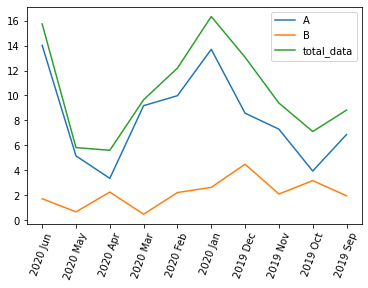

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in ['A','B','total_data']: ax.plot(sprint.index, sprint[i], label=i)
plt.legend(loc='upper right')
plt.xticks(rotation = 70)

In [11]:
axB = ax.twinx()
axB.bar(sprint.index, sprint.cost, fill=False, label='cost')
axB.legend(loc='upper left')
plt.show()

<Figure size 1080x432 with 0 Axes>

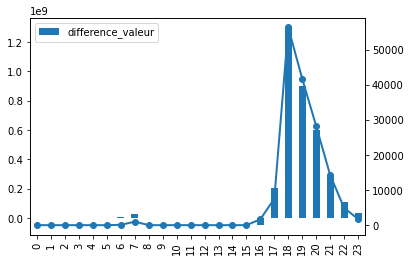

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(1 , figsize = (15 ,6))
ax = df[['difference_valeur']].plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(df[['difference_volume']].values, linestyle='-', marker='o', linewidth=2.0)

In [48]:
df = pd.read_csv("/Users/diakite/Downloads/Telegram Desktop/Mood_Etancheite_20221115.csv", sep = ";")
df.head()

,hour,valeur_mood1,volume_mood1,valeur_mood2,volume_mood2,valeur_gr1,volume_gr1,valeur_gr2,volume_gr2,difference_valeur1,difference_volume1,difference_valeur2,difference_volume2,nbr_found,percent
0,0H,14859734,503,2045650,81,14911834,507,2077750,84,52100,4,32100,3,584,98.81556683587141 %
1,1H,7693246,477,885800,39,7693246,477,885800,39,0,0,0,0,516,100.0 %
2,2H,2289113,120,405000,22,2289513,121,405000,22,400,1,0,0,142,99.3006993006993 %
3,3H,2992400,103,750300,9,2992400,103,750300,9,0,0,0,0,112,100.0 %
4,4H,2983085,121,182650,14,2983085,121,182650,14,0,0,0,0,135,100.0 %


In [49]:
df["difference_valeur"] = df["difference_valeur1"] + df["difference_valeur2"]
df["difference_volume"] = df["difference_volume1"] + df["difference_volume2"]

df.head(5)

,hour,valeur_mood1,volume_mood1,valeur_mood2,volume_mood2,valeur_gr1,volume_gr1,valeur_gr2,volume_gr2,difference_valeur1,difference_volume1,difference_valeur2,difference_volume2,nbr_found,percent,difference_valeur,difference_volume
0,0H,14859734,503,2045650,81,14911834,507,2077750,84,52100,4,32100,3,584,98.81556683587141 %,84200,7
1,1H,7693246,477,885800,39,7693246,477,885800,39,0,0,0,0,516,100.0 %,0,0
2,2H,2289113,120,405000,22,2289513,121,405000,22,400,1,0,0,142,99.3006993006993 %,400,1
3,3H,2992400,103,750300,9,2992400,103,750300,9,0,0,0,0,112,100.0 %,0,0
4,4H,2983085,121,182650,14,2983085,121,182650,14,0,0,0,0,135,100.0 %,0,0


Text(0.5, 1.0, 'ETANCHEITE GR vs MOOD 2022 - 11 - 15')

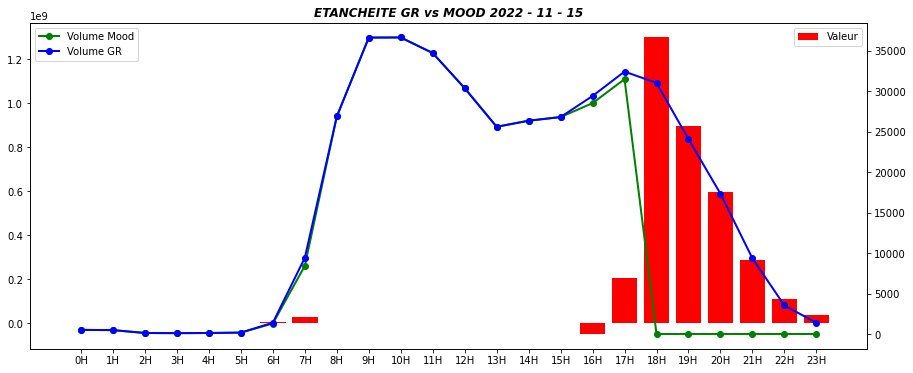

In [42]:
fig = plt.figure(1 , figsize = (15 ,6))

plt.bar(df['hour'].values , df['difference_valeur'].values, label = 'Valeur', color = 'red')
plt.legend(loc=1)
plt.twinx()
plt.plot(df['volume_mood1'].values , '-' , marker='o', linewidth=2.0, label = 'Volume Mood', color = 'green')
plt.plot(df['volume_gr1'].values , '-' , marker='o', linewidth=2.0, label = 'Volume GR', color = 'blue')
plt.legend(loc=2)
plt.title(label = "ETANCHEITE GR vs MOOD 2022 - 11 - 15", fontstyle="italic", fontweight="bold")

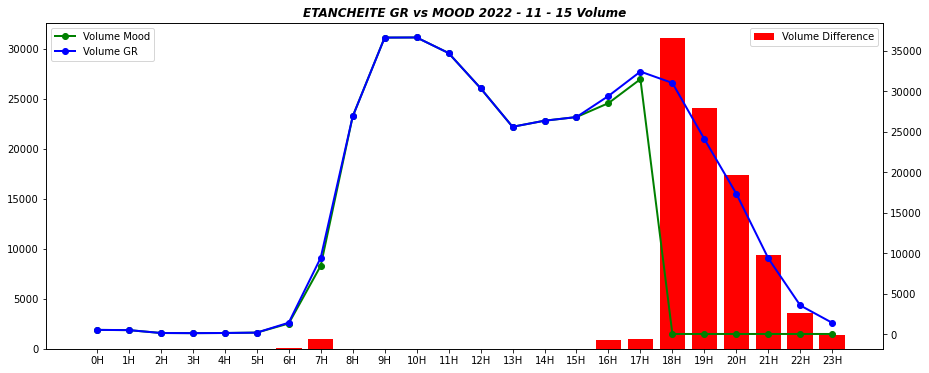

In [55]:
fig = plt.figure(1 , figsize = (15 ,6))

plt.bar(df['hour'].values , df['difference_volume1'].values, label = 'Volume Difference', color = 'red')
plt.legend(loc=1)
plt.twinx()
plt.plot(df['volume_mood1'].values , '-' , marker='o', linewidth=2.0, label = 'Volume Mood', color = 'green')
plt.plot(df['volume_gr1'].values , '-' , marker='o', linewidth=2.0, label = 'Volume GR', color = 'blue')
plt.legend(loc=2)
plt.title(label = "ETANCHEITE GR vs MOOD 2022 - 11 - 15 Volume", fontstyle="italic", fontweight="bold")
plt.savefig('/Users/diakite/Downloads/ETANCHEITE_tr.png') 

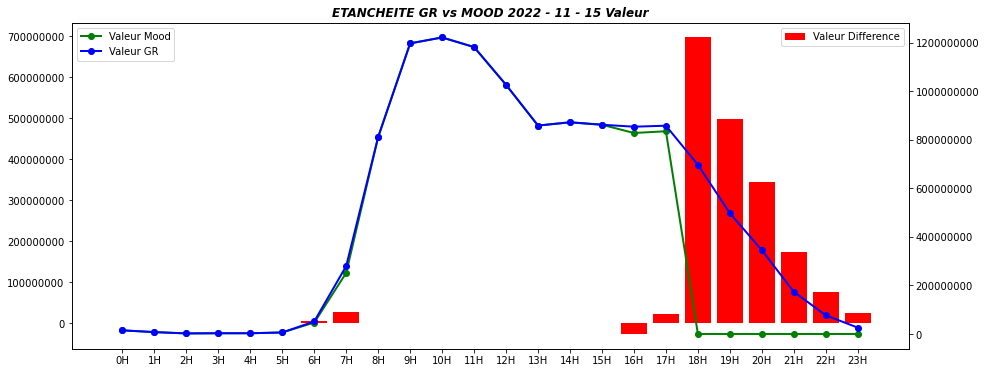

In [63]:
fig = plt.figure(1 , figsize = (15 ,6))

plt.bar(df['hour'].values , df['difference_valeur1'].values, label = 'Valeur Difference', color = 'red')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc=1)
plt.twinx()
plt.plot(df['valeur_mood1'].values , '-' , marker='o', linewidth=2.0, label = 'Valeur Mood', color = 'green')
plt.plot(df['valeur_gr1'].values , '-' , marker='o', linewidth=2.0, label = 'Valeur GR', color = 'blue')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc=2)
plt.title(label = "ETANCHEITE GR vs MOOD 2022 - 11 - 15 Valeur", fontstyle="italic", fontweight="bold")
plt.savefig('/Users/diakite/Downloads/ETANCHEITE_va.png') 

In [1]:
df = pd.read_csv("/Users/diakite/Downloads/Telegram Desktop/Mood_Etancheite_20221115.csv", sep = ";")
df.head()

df["difference_valeur"] = df["difference_valeur1"] + df["difference_valeur2"]
df["difference_volume"] = df["difference_volume1"] + df["difference_volume2"]

df.head(5)

,hour,valeur_mood1,volume_mood1,valeur_mood2,volume_mood2,valeur_gr1,volume_gr1,valeur_gr2,volume_gr2,difference_valeur1,difference_volume1,difference_valeur2,difference_volume2,nbr_found,percent,difference_valeur,difference_volume
0,0H,14859734,503,2045650,81,14911834,507,2077750,84,52100,4,32100,3,584,98.81556683587141 %,84200,7
1,1H,7693246,477,885800,39,7693246,477,885800,39,0,0,0,0,516,100.0 %,0,0
2,2H,2289113,120,405000,22,2289513,121,405000,22,400,1,0,0,142,99.3006993006993 %,400,1
3,3H,2992400,103,750300,9,2992400,103,750300,9,0,0,0,0,112,100.0 %,0,0
4,4H,2983085,121,182650,14,2983085,121,182650,14,0,0,0,0,135,100.0 %,0,0


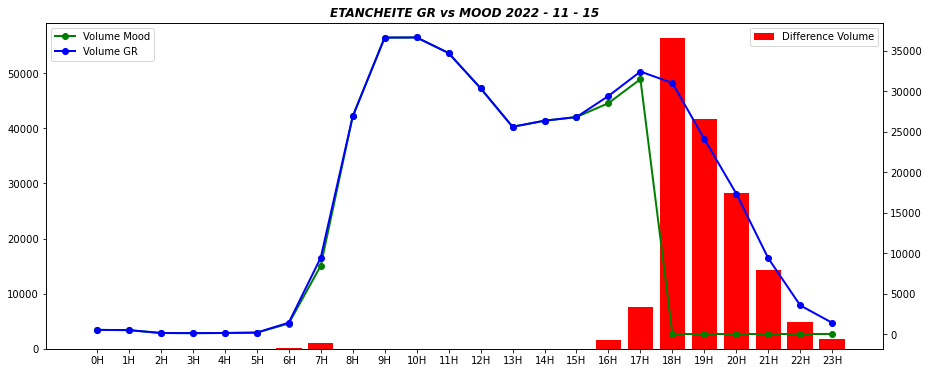

In [10]:
fig = plt.figure(1 , figsize = (15 ,6))

plt.bar(df['hour'].values , df['difference_volume'].values, label = 'Difference Volume', color = 'red')
plt.legend(loc=1)
plt.twinx()
plt.plot(df['volume_mood1'].values , '-' , marker='o', linewidth=2.0, label = 'Volume Mood', color = 'green')
plt.plot(df['volume_gr1'].values , '-' , marker='o', linewidth=2.0, label = 'Volume GR', color = 'blue')
plt.legend(loc=2)
plt.title(label = "ETANCHEITE GR vs MOOD 2022 - 11 - 15", fontstyle="italic", fontweight="bold")
plt.savefig('/Users/diakite/Downloads/ETANCHEITE_Mood_volume.png') 

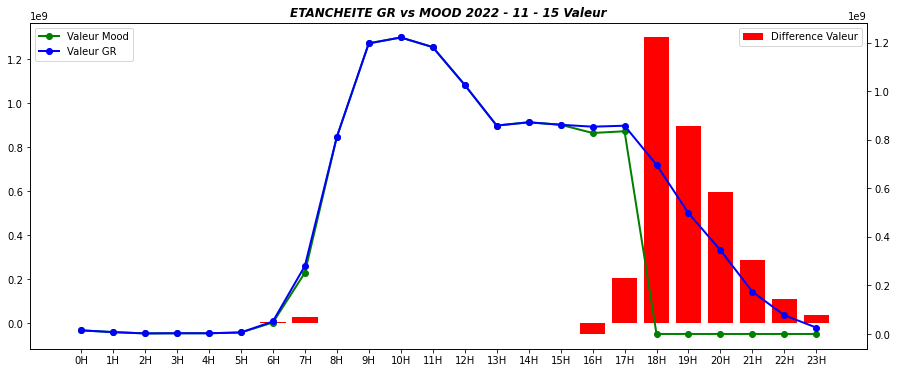

In [11]:
fig = plt.figure(1 , figsize = (15 ,6))

plt.bar(df['hour'].values , df['difference_valeur'].values, label = 'Difference Valeur', color = 'red')
plt.legend(loc=1)
plt.twinx()
plt.plot(df['valeur_mood1'].values , '-' , marker='o', linewidth=2.0, label = 'Valeur Mood', color = 'green')
plt.plot(df['valeur_gr1'].values , '-' , marker='o', linewidth=2.0, label = 'Valeur GR', color = 'blue')
plt.legend(loc=2)
plt.title(label = "ETANCHEITE GR vs MOOD 2022 - 11 - 15 Valeur", fontstyle="italic", fontweight="bold")
plt.savefig('/Users/diakite/Downloads/ETANCHEITE_Mood_valeur.png') 

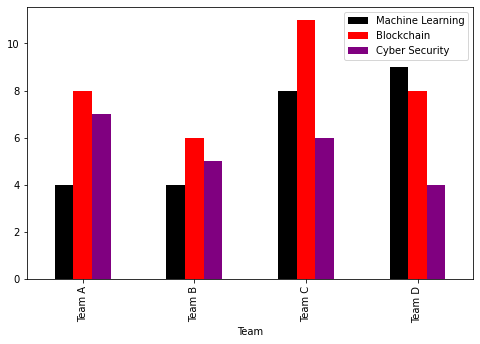

In [3]:
# Library Import(numpy and matplotlib)
import pandas as pd 
import matplotlib.pyplot as plot 
# Make a data definition
_data=[["Team A",4, 8, 7],
      ["Team B",4, 6, 5],
      ["Team C",8, 11, 6],
      ["Team D",9, 8, 4]
     ]
 
# Colors 
my_color =['black', 'red','purple']
 
# Draw a multi-colored bar chart.
_df=pd.DataFrame(_data,columns=["Team","Machine Learning", "Blockchain", "Cyber Security"])
 
_df.plot(x="Team", y=["Machine Learning", "Blockchain", "Cyber Security"], 
        kind="bar",figsize=(8,5), color=my_color)
 
# Display the plt
plot.show()



In [13]:
df = pd.read_csv("/Users/diakite/Downloads/Mood_Etancheite_DG_20221202.csv", sep = ";")
df.head()

,hour,valeur_mood1,volume_mood1,valeur_mood2,volume_mood2,valeur_gr1,volume_gr1,valeur_gr2,volume_gr2,difference_valeur1,difference_volume1,difference_valeur2,difference_volume2,owner_msisdn,partenaire_new
0,0,176750,14,45000,1,0,0,45000,1,0,0,0,0,758025342,DISTRICENTRE
1,0,11500,2,34000,4,0,0,34000,4,0,0,0,0,708475526,AJS
2,0,21290,16,0,0,0,0,0,0,0,0,0,0,759800676,NaN
3,0,840776,11,0,0,0,0,0,0,0,0,0,0,709609281,NaN
4,0,600,1,0,0,0,0,0,0,0,0,0,0,787243144,NaN


In [23]:
df.shape

(13522, 15)

In [25]:
df["difference_valeur"] = df["difference_valeur1"] + df["difference_valeur2"]
df["difference_volume"] = df["difference_volume1"] + df["difference_volume2"]

df["valeur_gr"] = df["valeur_gr1"] + df["valeur_gr2"]
df["volume_gr"] = df["volume_gr1"] + df["volume_gr2"]

df["valeur_mood"] = df["valeur_mood1"] + df["valeur_mood2"]
df["volume_mood"] = df["volume_mood1"] + df["volume_mood2"]

In [26]:
df[df["partenaire_new"].notnull()].head()

,hour,valeur_mood1,volume_mood1,valeur_mood2,volume_mood2,valeur_gr1,volume_gr1,valeur_gr2,volume_gr2,difference_valeur1,...,difference_valeur2,difference_volume2,owner_msisdn,partenaire_new,difference_valeur,difference_volume,valeur_gr,volume_gr,valeur_mood,volume_mood
0,0,176750,14,45000,1,0,0,45000,1,0,...,0,0,758025342,DISTRICENTRE,0,0,45000,1,221750,15
1,0,11500,2,34000,4,0,0,34000,4,0,...,0,0,708475526,AJS,0,0,34000,4,45500,6
5,0,342500,30,489400,8,0,0,489400,8,0,...,0,0,708442014,LA COQUILLE,0,0,489400,8,831900,38
18,0,50300,2,32000,4,0,0,32000,4,0,...,0,0,758025240,TKGS,0,0,32000,4,82300,6
19,0,6700,4,3000,2,0,0,3000,2,0,...,0,0,708791991,TID,0,0,3000,2,9700,6


In [34]:
df3 = df.groupby("partenaire_new", as_index=False).agg( difference_valeur = ("difference_valeur","sum") ,
                                  difference_volume = ("difference_volume", "sum") ,  
                                  valeur_gr = ("valeur_gr", "sum") ,
                                  volume_gr = ("volume_gr","sum"),  
                                  valeur_mood = ("valeur_mood", "sum"), 
                                  volume_mood = ("volume_mood", "sum") 
                                )

In [35]:
df3.head()

,partenaire_new,difference_valeur,difference_volume,valeur_gr,volume_gr,valeur_mood,volume_mood
0,AJS,-331227177,-12210,815480460,27007,1683020920,57722
1,AMANDA,-4724710,-419,378445813,13591,1326128875,34991
2,DISTRICENTRE,-41883015,-1205,477391891,14188,903597442,28406
3,IDT,-335193633,-9155,471446801,16390,1477717770,44658
4,KTC,-34757208,-1573,449185654,14964,998085899,34376


In [106]:
df.groupby("hour", as_index=False).agg( 
                                 valeur_mood1 = ("valeur_mood1","sum") ,
                                 valeur_mood2 = ("valeur_mood2", "sum") , 
                                 valeur_gr1 = ("valeur_gr1", "sum") ,  
                                 valeur_gr2 = ("valeur_gr2", "sum") ,  
                                 volume_mood1 = ("volume_mood1", "sum") ,  
                                 volume_mood2 = ("volume_mood2", "sum") ,
                                 volume_gr1 = ("volume_gr1", "sum") ,  
                                 volume_gr2 = ("volume_gr2", "sum")      
                                ).head(6)

,hour,valeur_mood1,valeur_mood2,valeur_gr1,valeur_gr2,volume_mood1,volume_mood2,volume_gr1,volume_gr2
0,0,23053006,2709500,0,2709500,861,81,0,81
1,1,27448105,797200,0,797200,1117,37,0,37
2,2,33208340,319800,0,319800,1156,17,0,17
3,3,14635640,78500,0,78500,426,6,0,6
4,4,15546345,158500,0,158500,363,5,0,5
5,5,19848245,1459175,0,1459175,511,29,0,29


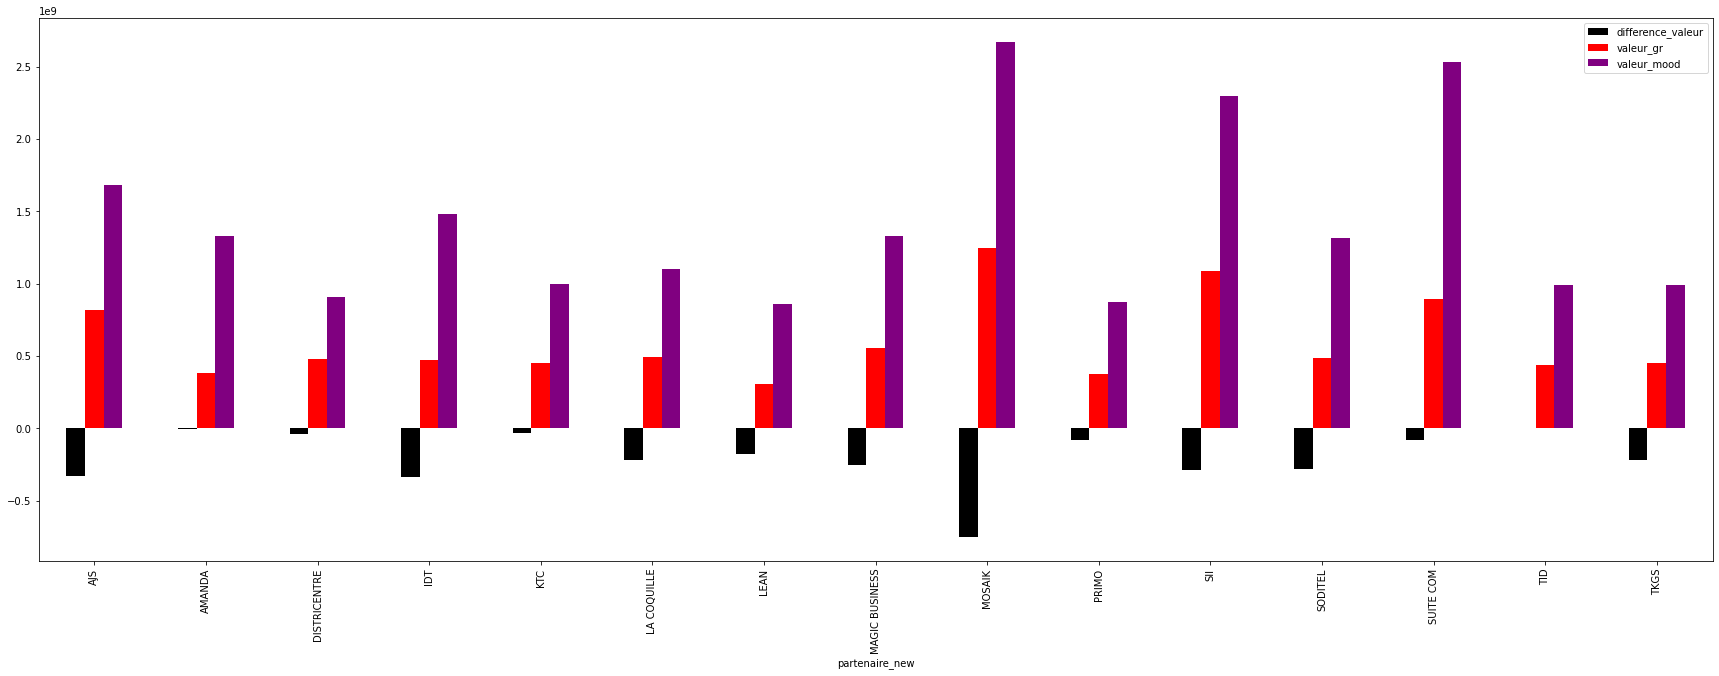

In [43]:
# Library Import(numpy and matplotlib)
import pandas as pd 
import matplotlib.pyplot as plot 
# Make a data definition
_data=df3
 
# Colors 
my_color =['black', 'red','purple']
 
# Draw a multi-colored bar chart.
_df=pd.DataFrame(_data ,columns=["partenaire_new","difference_valeur", "valeur_gr", "valeur_mood"])
         
_df.plot(x="partenaire_new", y=["difference_valeur", "valeur_gr", "valeur_mood"], 
        kind="bar", figsize=(30,10) , color=my_color)

# Display the plt
plot.show()


TypeError: unhashable type: 'numpy.ndarray'

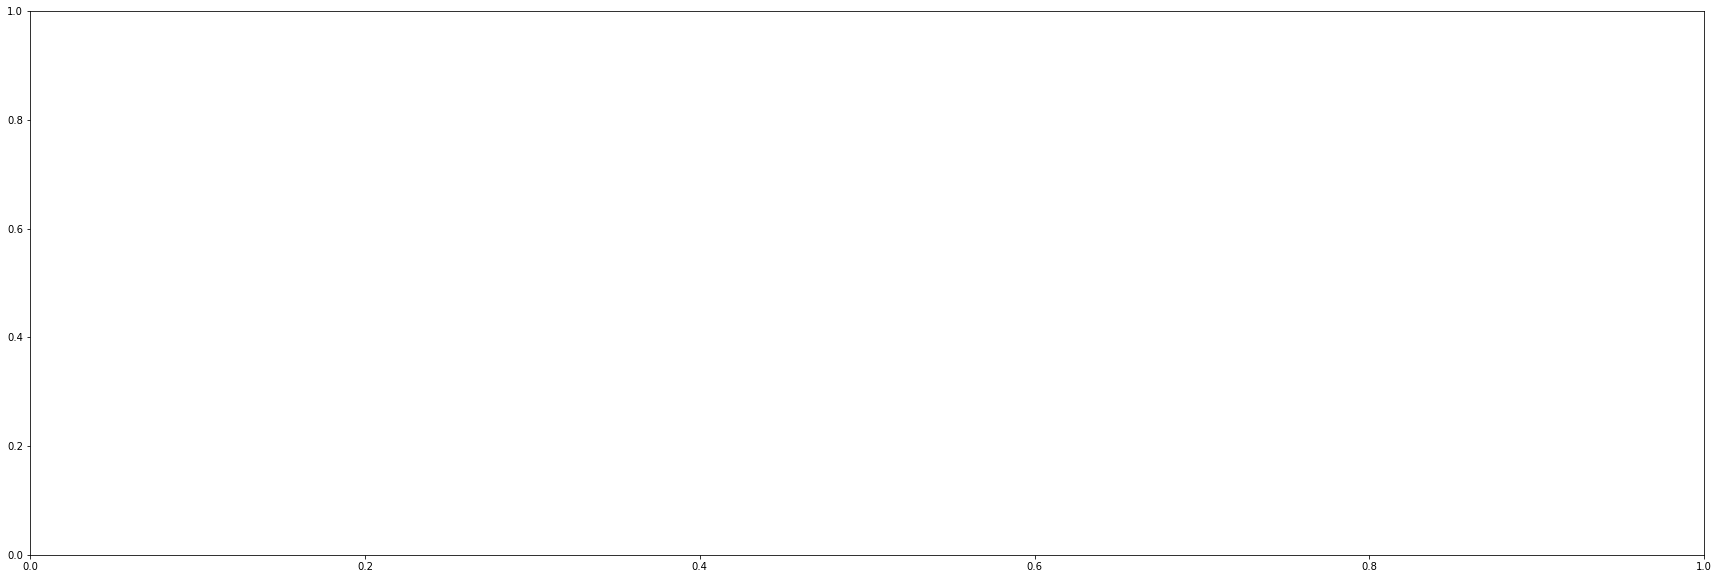

In [60]:
import pandas as pd 
import matplotlib.pyplot as plot 
# Make a data definition
_data=df3
 
# Colors 
my_color =['black', 'red','purple']

fig = plt.figure(1 , figsize = (30,10))
 
# Draw a multi-colored bar chart.
_df=pd.DataFrame(_data ,columns=["partenaire_new","difference_valeur", "valeur_gr", "valeur_mood"])

x = _df[["partenaire_new"]]
y = _df[["difference_valeur", "valeur_gr", "valeur_mood"]]
 
plt.bar(x = x, height = y, color = my_color)

plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_useOffset(False)

# Display the plt
plot.show()

In [ ]:
plt.bar()

In [ ]:
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_useOffset(False)

In [21]:
df[df["partenaire_new"].notnull()].shape

(820, 15)

In [ ]:
df2 = df[df["partenaire_new"].notnull()]


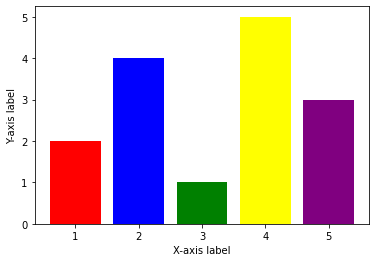

In [61]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]
colors = ['red', 'blue', 'green', 'yellow', 'purple']

# Create the bar plot
plt.bar(x, y, color=colors)

# Add labels to the x-axis and y-axis
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# Display the plot
plt.show()


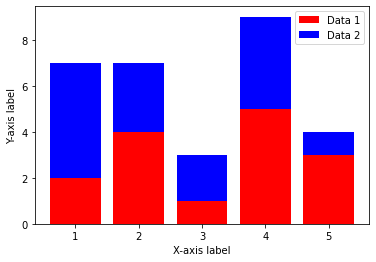

In [62]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 1, 5, 3]
y2 = [5, 3, 2, 4, 1]

# Create the first bar plot
plt.bar(x, y1, color='red', label='Data 1')

# Create the second bar plot
plt.bar(x, y2, color='blue', label='Data 2', bottom=y1)

# Add labels to the x-axis and y-axis
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# Add a legend
plt.legend()

# Display the plot
plt.show()


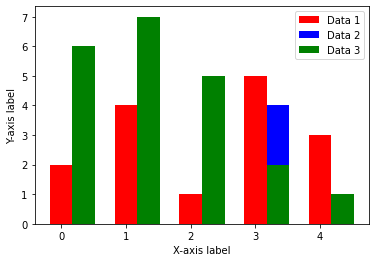

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.arange(5)
y1 = [2, 4, 1, 5, 3]
y2 = [5, 3, 2, 4, 1]
y3 = [6, 7, 5, 2, 1]

# Create the grouped bar plot
fig, ax = plt.subplots()
bar_width = 0.35

bar1 = ax.bar(x, y1, bar_width, color='red', label='Data 1')
bar2 = ax.bar(x + bar_width, y2, bar_width, color='blue', label='Data 2')
bar3 = ax.bar(x + bar_width, y3, bar_width, color='green', label='Data 3')

# Add labels to the x-axis and y-axis
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')

# Add a legend
ax.legend()

# Display the plot
plt.show()


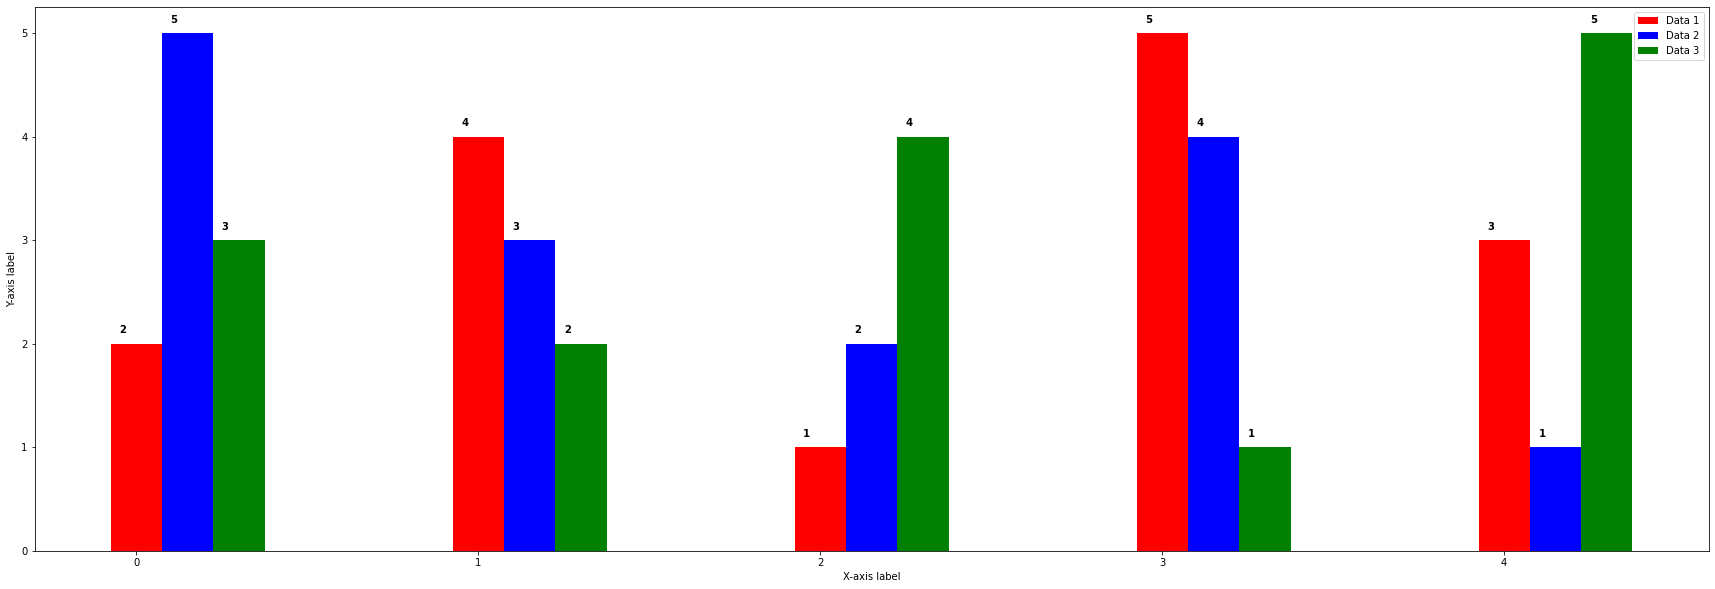

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.arange(5)
y1 = [2, 4, 1, 5, 3]
y2 = [5, 3, 2, 4, 1]
y3 = [3, 2, 4, 1, 5]

# Create the grouped bar plot
fig, ax = plt.subplots(1 , figsize = (30,10))
#plt.figure()

bar_width = 0.15

bar1 = ax.bar(x, y1, bar_width, color='red', label='Data 1')
bar2 = ax.bar(x + bar_width, y2, bar_width, color='blue', label='Data 2')
bar3 = ax.bar(x + bar_width*2, y3, bar_width, color='green', label='Data 3')


# Add values on the plot
for i in range(len(y1)):
    ax.text(x[i]-bar_width/3, y1[i]+0.1, str(y1[i]), color='black', fontweight='bold')
    ax.text(x[i]+bar_width-bar_width/3, y2[i]+0.1, str(y2[i]), color='black', fontweight='bold')
    ax.text(x[i]+bar_width*2-bar_width/3, y3[i]+0.1, str(y3[i]), color='black', fontweight='bold')

# Add labels to the x-axis and y-axis
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')

# Add a legend
ax.legend()

# Display the plot
plt.show()


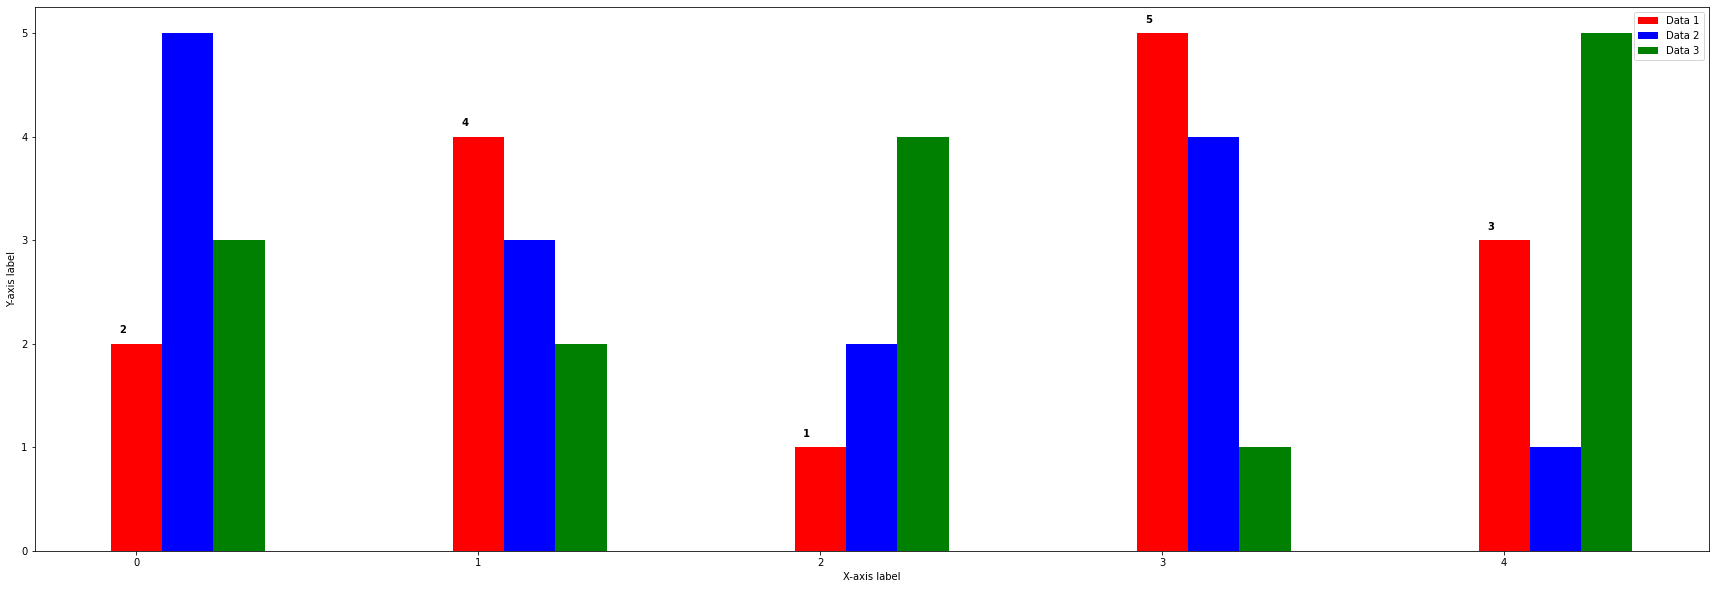

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.arange(5)
y1 = [2, 4, 1, 5, 3]
y2 = [5, 3, 2, 4, 1]
y3 = [3, 2, 4, 1, 5]

# Create the grouped bar plot
fig, ax = plt.subplots(1 , figsize = (30,10))
bar_width = 0.15

bar1 = ax.bar(x, y1, bar_width, color='red', label='Data 1')
bar2 = ax.bar(x + bar_width, y2, bar_width, color='blue', label='Data 2')
bar3 = ax.bar(x + bar_width*2, y3, bar_width, color='green', label='Data 3')

# Add values on the plot (only for y1)
for i in range(len(y1)):
    ax.text(x[i]-bar_width/3, y1[i]+0.1, str(y1[i]), color='black', fontweight='bold')

# Add labels to the x-axis and y-axis
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')

# Add a legend
ax.legend()

# Display the plot
plt.show()


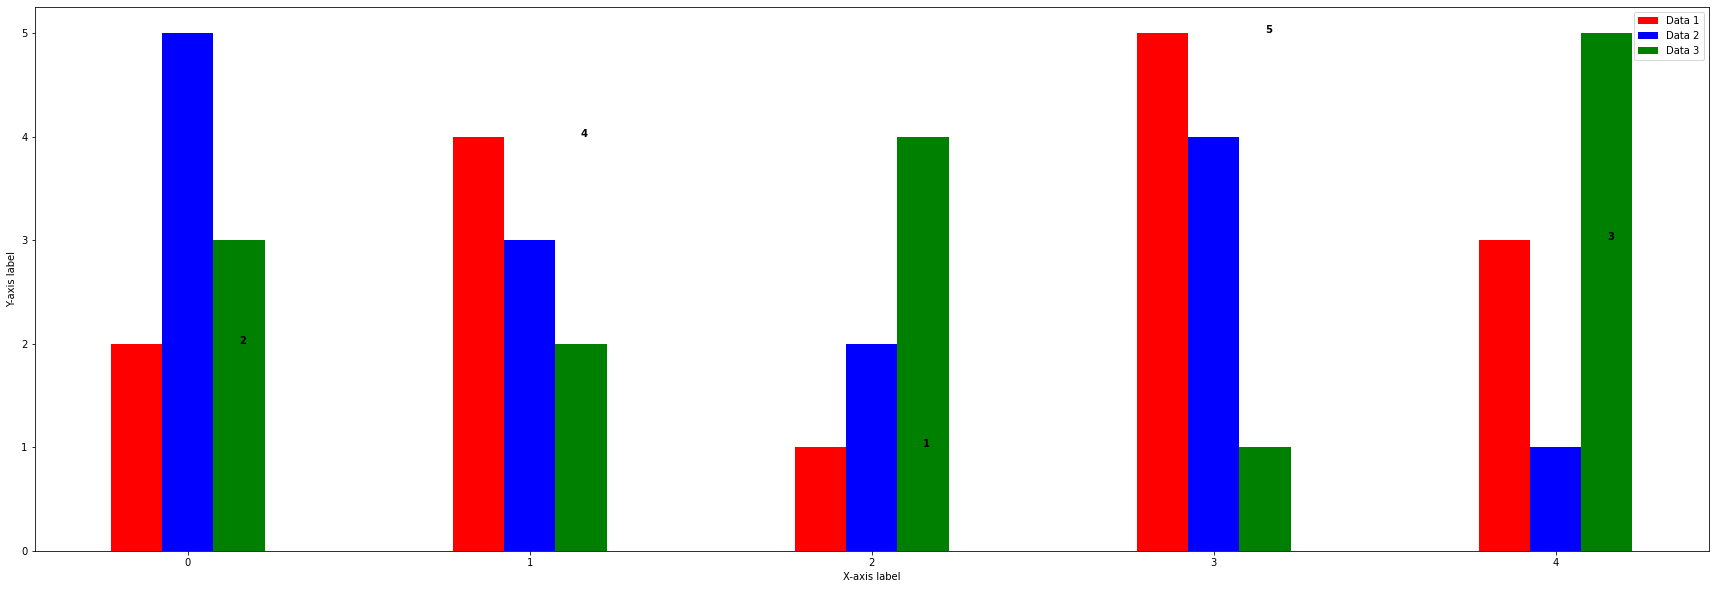

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.arange(5)
y1 = [2, 4, 1, 5, 3]
y2 = [5, 3, 2, 4, 1]
y3 = [3, 2, 4, 1, 5]

# Center the x values
x_tick_labels = np.arange(5) 
ax.set_xticks(x_tick_labels)
ax.set_xticklabels(x)

# Create the grouped bar plot
fig, ax = plt.subplots(1 , figsize = (30,10))
bar_width = 0.15

bar1 = ax.bar(x_tick_labels - bar_width, y1, bar_width, color='red', label='Data 1')
bar2 = ax.bar(x_tick_labels, y2, bar_width, color='blue', label='Data 2')
bar3 = ax.bar(x_tick_labels + bar_width, y3, bar_width, color='green', label='Data 3')

# Add values on the plot (only for y1)
for i in range(len(y1)):
    ax.text(x[i]+bar_width, y1[i], str(y1[i]), color='black', fontweight='bold')

# Add labels to the x-axis and y-axis
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')

# Add a legend
ax.legend()

# Display the plot
plt.show()


In [93]:
pp = ["AJS","AMANDA"]

In [94]:
df4 = df3[df3["partenaire_new"].isin(pp)]

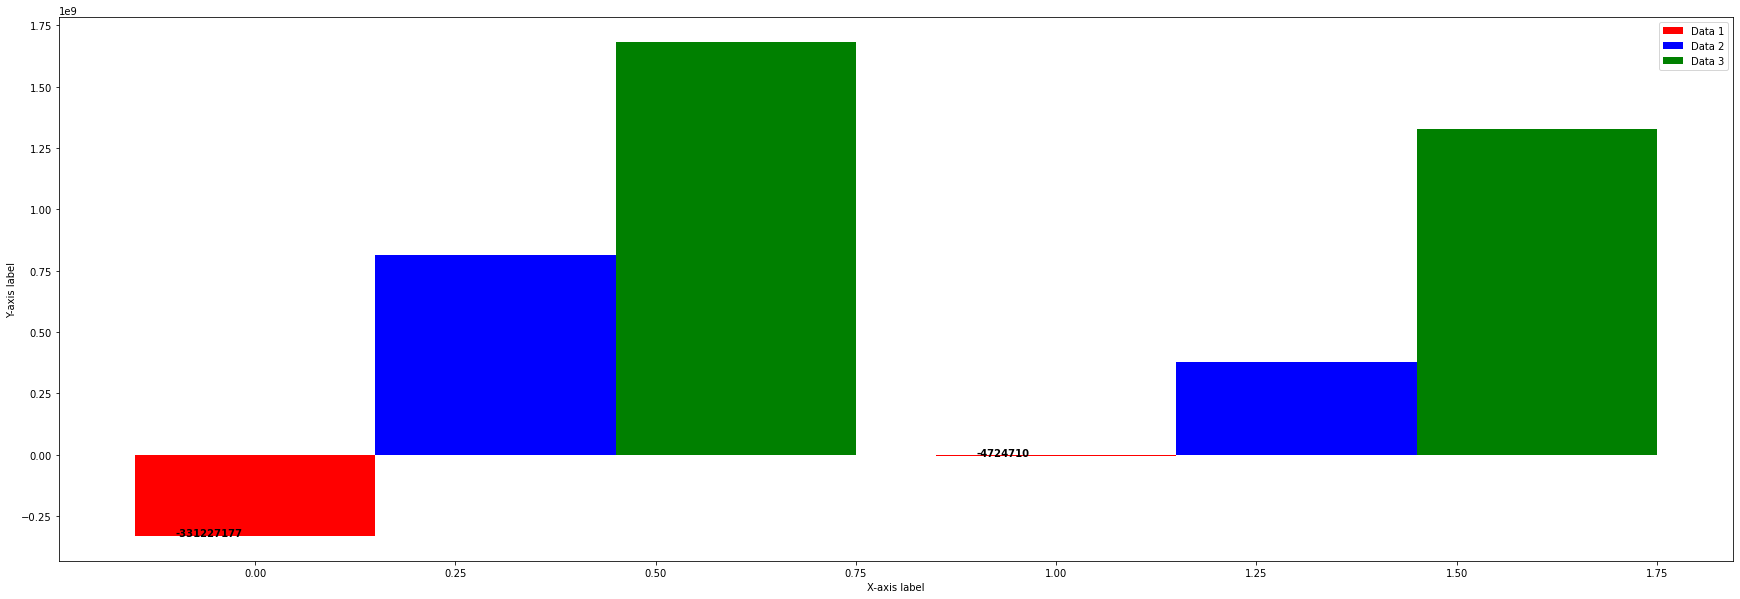

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Sample data
x = df4["partenaire_new"]
y1 = df4["difference_valeur"]
y2 = df4["valeur_gr"]
y3 = df4["valeur_mood"]


x_tick_labels = np.arange(len(x))
ax.set_xticks(x_tick_labels)
ax.set_xticklabels(x)

# Create the grouped bar plot
fig, ax = plt.subplots(1 , figsize = (30,10))
bar_width = 0.30

bar1 = ax.bar(x_tick_labels, y1, bar_width, color='red', label='Data 1')
bar2 = ax.bar(x_tick_labels + bar_width, y2, bar_width, color='blue', label='Data 2')
bar3 = ax.bar(x_tick_labels + bar_width*2, y3, bar_width, color='green', label='Data 3')

# Add values on the plot (only for y1)
for i in range(len(y1)):
    ax.text(x_tick_labels[i]-bar_width/3, y1[i]+0.3, str(y1[i]), color='black', fontweight='bold')

# Add labels to the x-axis and y-axis
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [ ]:
df = pd.read_csv("/Users/diakite/Downloads/Mood_Etancheite_DG_20230202.csv", sep = ";")
df.head()

In [6]:
import mitosheet
mitosheet.sheet(df, analysis_to_replay="id-gkuxhzzymg")

MitoWidget(analysis_data_json='{"analysisName": "id-gkuxhzzymg", "analysisToReplay": null, "code": [], "stepSu…

In [ ]:
from mitosheet import *; register_analysis("id-gkuxhzzymg");
    
# Deleted 1 row in df
df.drop(labels=[5], inplace=True)

# Pivoted into df
df_pivot = pd.DataFrame(data={})

# Pivoted into df
tmp_df = df[['valeur_mood1', 'volume_mood2', 'volume_mood1', 'volume_gr1', 'volume_gr2', 'difference_valeur2', 'difference_valeur1', 'difference_volume1', 'difference_volume2', 'partenaire_new', 'valeur_gr1', 'valeur_gr2', 'valeur_mood2']]
pivot_table = tmp_df.pivot_table(
    index=['partenaire_new'],
    values=['volume_mood1', 'valeur_mood1', 'valeur_mood2', 'volume_mood2', 'valeur_gr1', 'volume_gr1', 'valeur_gr2', 'volume_gr2', 'difference_valeur1', 'difference_volume1', 'difference_valeur2', 'difference_volume2'],
    aggfunc={'volume_mood1': ['sum'], 'valeur_mood1': ['sum'], 'valeur_mood2': ['sum'], 'volume_mood2': ['sum'], 'valeur_gr1': ['sum'], 'volume_gr1': ['sum'], 'valeur_gr2': ['sum'], 'volume_gr2': ['sum'], 'difference_valeur1': ['sum'], 'difference_volume1': ['sum'], 'difference_valeur2': ['sum'], 'difference_volume2': ['sum']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
df_pivot = pivot_table.reset_index()


In [8]:
df_pivot = pd.read_csv("/Users/diakite/Downloads/MitoExport_csv_df_mood.csv")
df_pivot.head()

,partenaire_new,difference_valeur1 sum,difference_valeur2 sum,difference_volume1 sum,difference_volume2 sum,valeur_gr1 sum,valeur_gr2 sum,valeur_mood1 sum,valeur_mood2 sum,volume_gr1 sum,volume_gr2 sum,volume_mood1 sum,volume_mood2 sum
0,AJS,-743499817,572650,-27174,20,234900.0,655243453.0,743734717.0,654670803.0,14.0,22873.0,27188.0,22853.0
1,AMANDA,-709696657,746800,-19022,11,26310.0,328708833.0,709722967.0,327962033.0,3.0,12915.0,19025.0,12904.0
2,APOCI,-53480,0,-49,0,369300.0,593900.0,422780.0,593900.0,13.0,63.0,62.0,63.0
3,DISTRICENTRE,-432006445,351500,-13464,12,1697550.0,459258281.0,433703995.0,458906781.0,15.0,13273.0,13479.0,13261.0
4,IDT,-798316590,402265,-25966,22,1173980.0,417593976.0,799490570.0,417191711.0,9.0,15247.0,25975.0,15225.0


In [48]:
df = pd.read_csv("/Users/diakite/Downloads/Mood_Etancheite_DG_20230202.csv", sep = ";")
df.head()

,valeur_mood1,volume_mood1,valeur_mood2,volume_mood2,valeur_gr1,volume_gr1,valeur_gr2,volume_gr2,difference_valeur1,difference_volume1,difference_valeur2,difference_volume2,owner_msisdn,partenaire_new
0,25451600.0,1314.0,13025365.0,646.0,25513100.0,1316.0,13025365.0,646.0,61500,2,0,0,747118290.0,SODITEL
1,16896060.0,1623.0,17249457.0,1376.0,16917210.0,1627.0,17226957.0,1369.0,21150,4,-22500,-7,768378030.0,LEAN
2,34664350.0,530.0,12651400.0,259.0,35075350.0,534.0,12651400.0,259.0,411000,4,0,0,707068309.0,SODITEL
3,433703995.0,13479.0,458906781.0,13261.0,434531345.0,13506.0,459258281.0,13273.0,827350,27,351500,12,758025342.0,DISTRICENTRE
4,4263460.0,96.0,2492100.0,58.0,4263460.0,96.0,2492100.0,58.0,0,0,0,0,748383338.0,APOCI


In [49]:
df.drop(labels=[5], inplace=True)

df["difference_valeur"] = df["difference_valeur1"] + df["difference_valeur2"]
df["difference_volume"] = df["difference_volume1"] + df["difference_volume2"]

df["valeur_gr"] = df["valeur_gr1"] + df["valeur_gr2"]
df["volume_gr"] = df["volume_gr1"] + df["volume_gr2"]

df["valeur_mood"] = df["valeur_mood1"] + df["valeur_mood2"]
df["volume_mood"] = df["volume_mood1"] + df["volume_mood2"]

In [50]:
df3 = df.groupby("partenaire_new", as_index=False).agg( difference_valeur = ("difference_valeur","sum") ,
                                  difference_volume = ("difference_volume", "sum") ,  
                                  valeur_gr = ("valeur_gr", "sum") ,
                                  volume_gr = ("volume_gr","sum"),  
                                  valeur_mood = ("valeur_mood", "sum"), 
                                  volume_mood = ("volume_mood", "sum") 
                                )

df3.head()

,partenaire_new,difference_valeur,difference_volume,valeur_gr,volume_gr,valeur_mood,volume_mood
0,AJS,2402100,68,1.536286e+09,52238.0,1.533884e+09,52170.0
1,AMANDA,1565300,40,1.192669e+09,33377.0,1.191104e+09,33337.0
2,APOCI,544830,35,7.432881e+08,26382.0,7.427432e+08,26347.0
3,DISTRICENTRE,2159800,88,9.268497e+08,27372.0,9.246899e+08,27284.0
4,IDT,935750,80,1.217618e+09,41280.0,1.216682e+09,41200.0


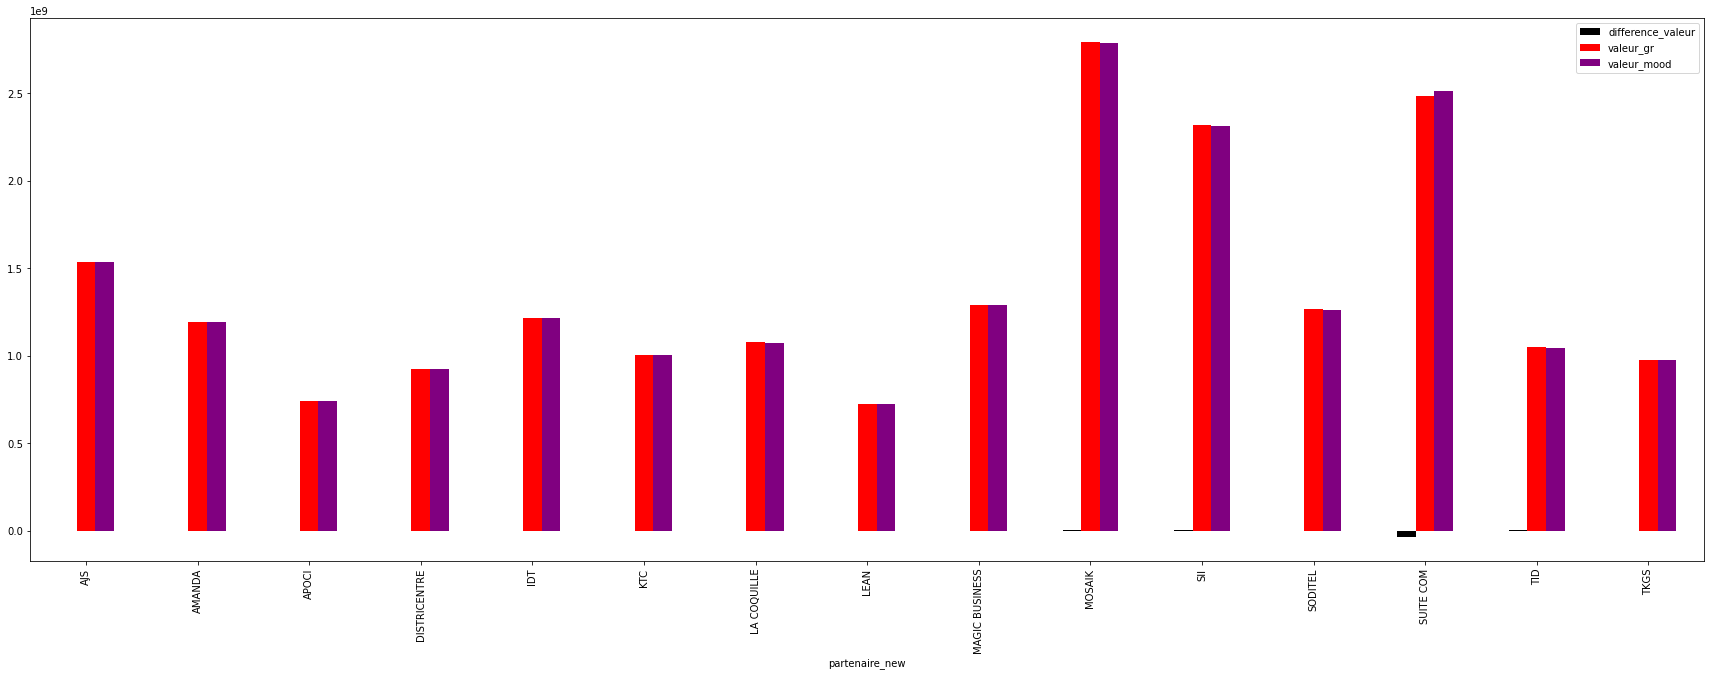

In [51]:
# Library Import(numpy and matplotlib)
import pandas as pd 
import matplotlib.pyplot as plot 
# Make a data definition
_data=df3
 
# Colors 
my_color =['black', 'red','purple']
 
# Draw a multi-colored bar chart.
_df=pd.DataFrame(_data ,columns=["partenaire_new","difference_valeur", "valeur_gr", "valeur_mood"])
         
_df.plot(x="partenaire_new", y=["difference_valeur", "valeur_gr", "valeur_mood"], 
        kind="bar", figsize=(30,10) , color=my_color)

# Display the plt
plot.show()


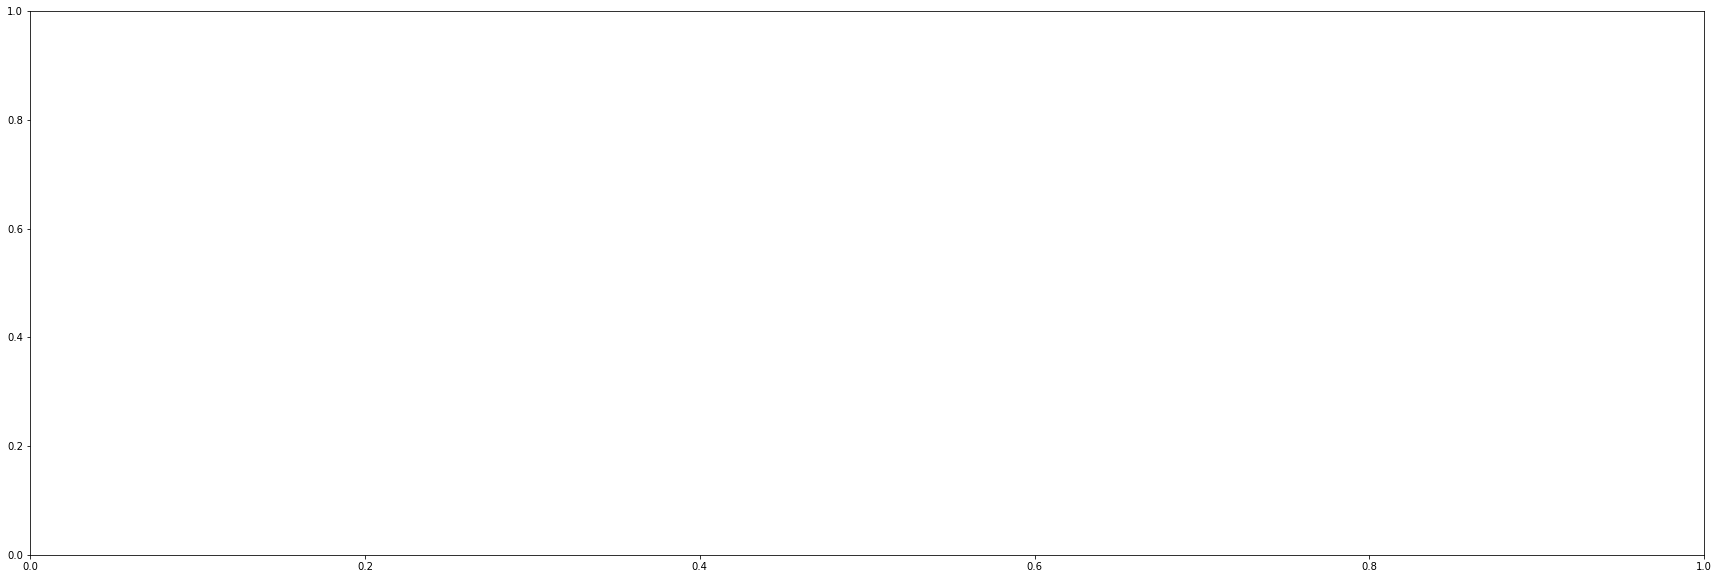

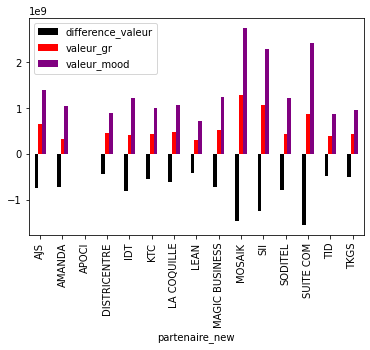

error uploading: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fbce2293a30>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))


In [21]:
f, a = plot.subplots(figsize=(30,10))
a.yaxis.offsetText.set_visible(False)

_data=df3
 
# Colors 
my_color =['black', 'red','purple']
 
# Draw a multi-colored bar chart.
_df=pd.DataFrame(_data ,columns=["partenaire_new","difference_valeur", "valeur_gr", "valeur_mood"])
         
_df.plot(x="partenaire_new", y=["difference_valeur", "valeur_gr", "valeur_mood"], 
        kind="bar" , color=my_color)

# Display the plt
plot.show()



In [ ]:
_data=df3
 
# Colors 
my_color =['black', 'red','purple']
 
# Draw a multi-colored bar chart.
_df=pd.DataFrame(_data ,columns=["partenaire_new","difference_valeur", "valeur_gr", "valeur_mood"])
         
_df.plot(x="partenaire_new", y=["difference_valeur", "valeur_gr", "valeur_mood"], 
        kind="bar", figsize=(30,10) , color=my_color)

# Display the plt
plot.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

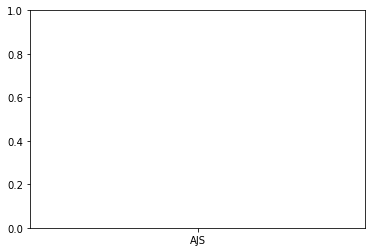

In [27]:
import pandas as pd 
import matplotlib.pyplot as plt 

_data=df3
#fig = plt.figure(3 , figsize=(30,10)) 
my_color =['black', 'red','purple']
_df=pd.DataFrame(_data ,columns=["partenaire_new","difference_valeur", "valeur_gr", "valeur_mood"])    
plt.bar(x =_df["partenaire_new"], height = _df[["difference_valeur", "valeur_gr", "valeur_mood"]], color=my_color )
plt.ticklabel_format(style='plain', axis='y')
plot.show()


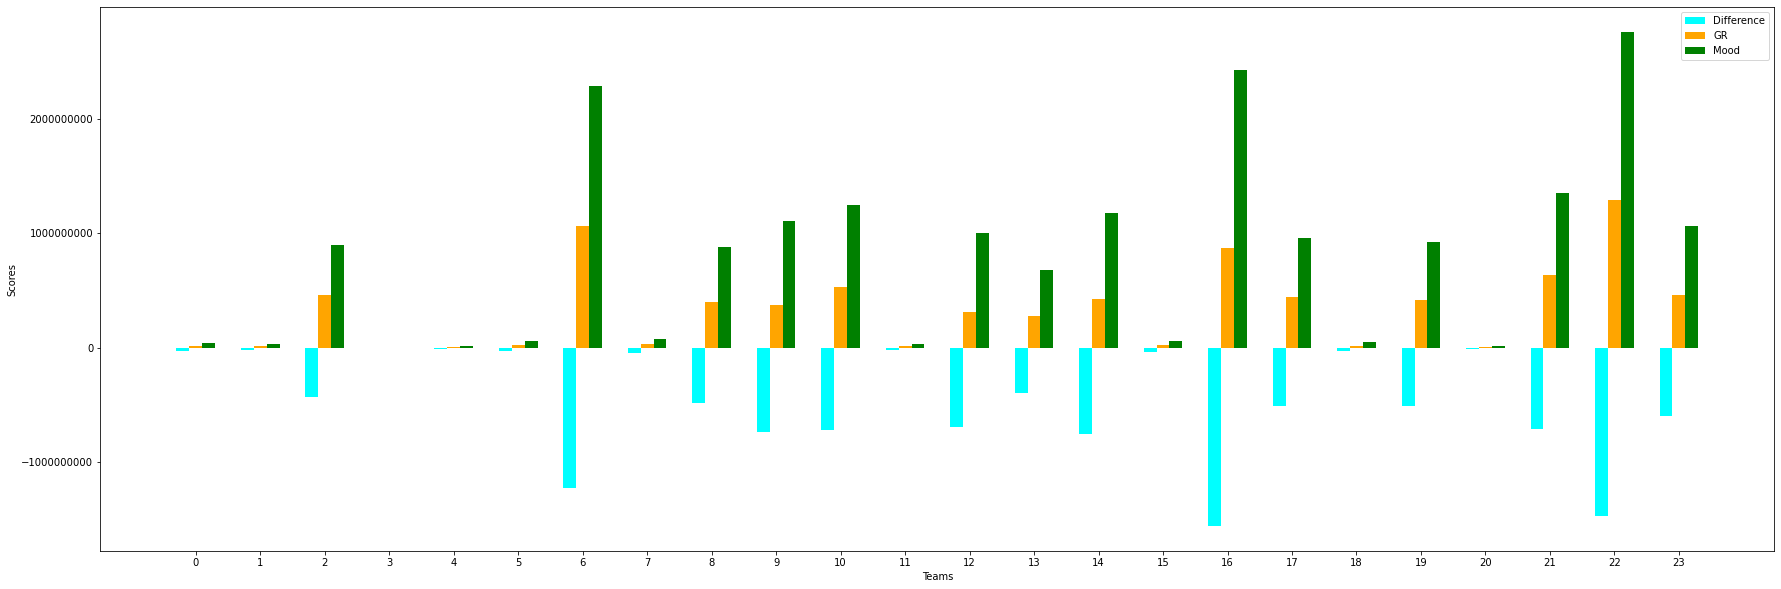

In [37]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = list(df["partenaire_new"])
y1 = list(df["difference_valeur"])
y2 = list(df["valeur_gr"])
y3 = list(df["valeur_mood"])
width = 0.2

x_tick_labels = np.arange(len(x))
fig = plt.figure(3 , figsize=(30,10)) 

# plot data in grouped manner of bar type
plt.bar(x_tick_labels-0.2, y1, width, color='cyan')
plt.ticklabel_format(style='plain', axis='y')

plt.bar(x_tick_labels, y2, width, color='orange')
plt.ticklabel_format(style='plain', axis='y')

plt.bar(x_tick_labels+0.2, y3, width, color='green')
plt.ticklabel_format(style='plain', axis='y')

plt.xticks(x_tick_labels)
plt.xlabel("Teams")
plt.ylabel("Scores")
plt.legend(["Difference", "GR", "Mood"])
plt.show()


In [ ]:
df_transaction_gr = pd.read_csv("/Users/diakite/Downloads/Telegram Desktop/df_transaction_gr_cashout_cashin_20230202.csv", sep = ";")

df_transaction_gr.head(2)


In [43]:
import mitosheet
mitosheet.sheet(df_transaction_gr , analysis_to_replay="id-zueftlnrcp")

MitoWidget(analysis_data_json='{"analysisName": "id-wdjsmusfbz", "analysisToReplay": {"analysisName": "id-zuef…

In [41]:
df_transaction_gr[df_transaction_gr["TRANSFER_ID"] == "CI230202.0019.A66740"]

,SENDER_MSISDN,MSISDN,RECEIVER_USER_ID,SENDER_USER_ID,TRANSACTION_AMOUNT,COMMISSIONS_PAID,COMMISSIONS_RECEIVED,COMMISSIONS_OTHERS,SERVICE_CHARGE_RECEIVED,SERVICE_CHARGE_PAID,TAXES,SERVICE_TYPE,TRANSFER_STATUS,SENDER_PRE_BAL,SENDER_POST_BAL,RECEIVER_PRE_BAL,RECEIVER_POST_BAL,SENDER_ACC_STATUS,RECEIVER_ACC_STATUS,ERROR_CODE,ERROR_DESC,REFERENCE_NUMBER,CREATED_ON,CREATED_BY,MODIFIED_ON,MODIFIED_BY,APP_1_DATE,APP_2_DATE,TRANSFER_ID,TRANSFER_DATETIME,SENDER_CATEGORY_CODE,SENDER_DOMAIN_CODE,SENDER_GRADE_NAME,SENDER_GROUP_ROLE,SENDER_DESIGNATION,SENDER_STATE,RECEIVER_CATEGORY_CODE,RECEIVER_DOMAIN_CODE,RECEIVER_GRADE_NAME,RECEIVER_GROUP_ROLE,RECEIVER_DESIGNATION,RECEIVER_STATE,SENDER_CITY,RECEIVER_CITY,APP_1_BY,APP_2_BY,REQUEST_SOURCE,GATEWAY_TYPE,TRANSFER_SUBTYPE,PAYMENT_TYPE,PAYMENT_NUMBER,PAYMENT_DATE,REMARKS,ACTION_TYPE,TRANSACTION_TAG,RECONCILIATION_BY,RECONCILIATION_FOR,EXT_TXN_NUMBER,ORIGINAL_REF_NUMBER,ZEBRA_AMBIGUOUS,ATTEMPT_STATUS,OTHER_MSISDN,SENDER_WALLET_NUMBER,RECEIVER_WALLET_NUMBER,SENDER_USER_NAME,RECEIVER_USER_NAME,TNO_MSISDN,TNO_ID,UNREG_FIRST_NAME,UNREG_LAST_NAME,UNREG_DOB,UNREG_ID_NUMBER,BULK_PAYOUT_BATCHID,IS_FINANCIAL,TRANSFER_DONE,INITIATOR_MSISDN,VALIDATOR_MSISDN,INITIATOR_COMMENTS,VALIDATOR_COMMENTS,SENDER_WALLET_NAME,RECIEVER_WALLET_NAME,SENDER_USER_TYPE,RECEIVER_USER_TYPE,TXNMODE,TAG,OWNER_MSISDN,USER_DOMAIN_CODE,USER_GRADE_NAME,USER_ID,WEB_LOGIN,USER_CATEGORY_CODE,ADDRESS2,GROUP_ROLE,PARTENAIRE_NEW,ACTEURS,TYPE2
509555,708961941,758373143,PT210517.1119.120980,PT200603.1633.318950,450.0,0.0,0.0,0.0,0.0,0.0,0.0,CASHIN,TS,1150.0,700.0,2.45,452.45,Y,Y,NaN,NaN,NaN,02/02/2023 00:19:48,PT200603.1633.318950,02/02/2023 00:19:48,PT200603.1633.318950,NaN,NaN,CI230202.0019.A66740,02/02/2023 00:19:48,PDV3CABOM,GR3CABOM,Pdv Type 3 Cabine OM,BA200603.1633.318863,DIST3,NaN,SUBS,SUBS,MasterPlusZero,NaN,NaN,NaN,NDEDE AYEMOU,ZOUAN-HOUNIEN,NaN,NaN,BROWSER,USSD,CASHIN,NaN,NaN,NaN,NaN,CREATION,CASHIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101120015473801,1011217437036,AMA EXPRESS847 PDV,DAGUI ALEXIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,Normal,Normal,CHANNEL,SUBSCRIBER,NaN,CASHIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df_transaction_gr[df_transaction_gr["TRANSFER_ID"] == "CI230202.0019.A66740"][["SENDER_MSISDN","MSISDN"]]



,SENDER_MSISDN,MSISDN
509555,708961941,758373143


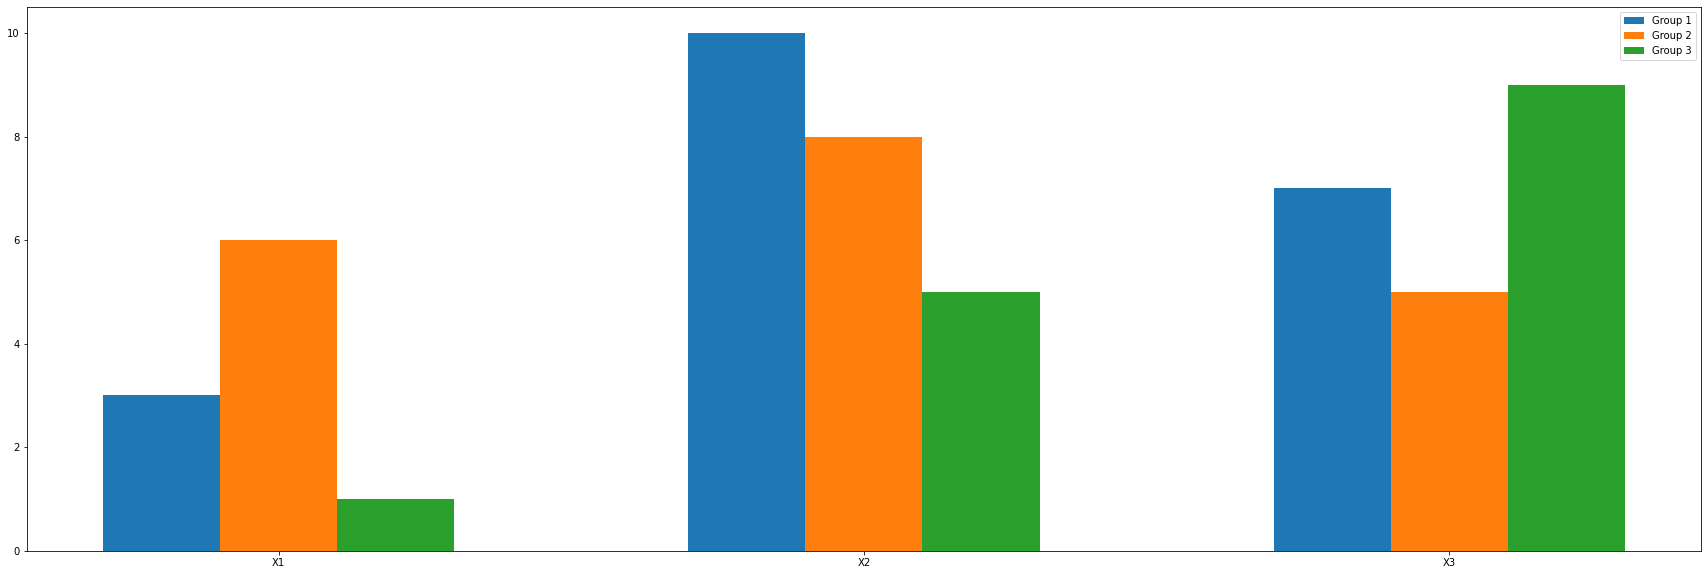

In [53]:
import matplotlib.pyplot as plt

group1 = [3, 10, 7]
group2 = [6, 8, 5]
group3 = [1, 5, 9]

fig, ax = plt.subplots(figsize=(30,10))

bar_width = 0.2

bar1 = ax.bar(x=range(len(group1)), height=group1, width=bar_width, label='Group 1')
bar2 = ax.bar(x=[i + bar_width for i in range(len(group2))], height=group2, width=bar_width, label='Group 2')
bar3 = ax.bar(x=[i + 2 * bar_width for i in range(len(group3))], height=group3, width=bar_width, label='Group 3')

ax.set_xticks([i + bar_width for i in range(len(group1))])
ax.set_xticklabels(['X1', 'X2', 'X3'])

ax.legend()

plt.show()


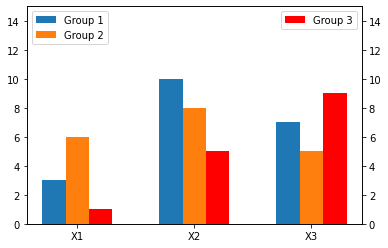

In [54]:
import matplotlib.pyplot as plt

group1 = [3, 10, 7]
group2 = [6, 8, 5]
group3 = [1, 5, 9]

fig, ax = plt.subplots()

bar_width = 0.2

bar1 = ax.bar(x=range(len(group1)), height=group1, width=bar_width, label='Group 1')
bar2 = ax.bar(x=[i + bar_width for i in range(len(group2))], height=group2, width=bar_width, label='Group 2')

ax2 = ax.twinx()
bar3 = ax2.bar(x=[i + 2 * bar_width for i in range(len(group3))], height=group3, width=bar_width, label='Group 3', color='red')

ax.set_xticks([i + bar_width for i in range(len(group1))])
ax.set_xticklabels(['X1', 'X2', 'X3'])

# set y-axis limits for Group 1 and Group 2
ax.set_ylim(0, 15)

# set y-axis step size for Group 1 and Group 2
ax.set_yticks(range(0, 16, 2))

# set y-axis limits for Group 3
ax2.set_ylim(0, 15)

# set y-axis step size for Group 3
ax2.set_yticks(range(0, 16, 2))

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [ ]:
df = pd.read_csv("/nfs_sunshine/Mood_Etancheite_DG_20230202.csv", sep = ";")

In [57]:
df = pd.read_csv("/Users/diakite/Downloads/Mood_Etancheite_DG_20230202.csv", sep = ";")
df.head()

df.drop(labels=[5], inplace=True)

df["difference_valeur"] = df["difference_valeur1"] + df["difference_valeur2"]
df["difference_volume"] = df["difference_volume1"] + df["difference_volume2"]

df["valeur_gr"] = df["valeur_gr1"] + df["valeur_gr2"]
df["volume_gr"] = df["volume_gr1"] + df["volume_gr2"]

df["valeur_mood"] = df["valeur_mood1"] + df["valeur_mood2"]
df["volume_mood"] = df["volume_mood1"] + df["volume_mood2"]

df3 = df.groupby("partenaire_new", as_index=False).agg( difference_valeur = ("difference_valeur","sum") ,
                                  difference_volume = ("difference_volume", "sum") ,  
                                  valeur_gr = ("valeur_gr", "sum") ,
                                  volume_gr = ("volume_gr","sum"),  
                                  valeur_mood = ("valeur_mood", "sum"), 
                                  volume_mood = ("volume_mood", "sum") 
                                )

df3.head()

,partenaire_new,difference_valeur,difference_volume,valeur_gr,volume_gr,valeur_mood,volume_mood
0,AJS,2402100,68,1.536286e+09,52238.0,1.533884e+09,52170.0
1,AMANDA,1565300,40,1.192669e+09,33377.0,1.191104e+09,33337.0
2,APOCI,544830,35,7.432881e+08,26382.0,7.427432e+08,26347.0
3,DISTRICENTRE,2159800,88,9.268497e+08,27372.0,9.246899e+08,27284.0
4,IDT,935750,80,1.217618e+09,41280.0,1.216682e+09,41200.0


In [70]:
list(df3["difference_valeur"])

[2402100,
 1565300,
 544830,
 2159800,
 935750,
 1592030,
 1425800,
 217200,
 1625900,
 4047575,
 3622900,
 2128300,
 -32003977,
 3931150,
 2456400]

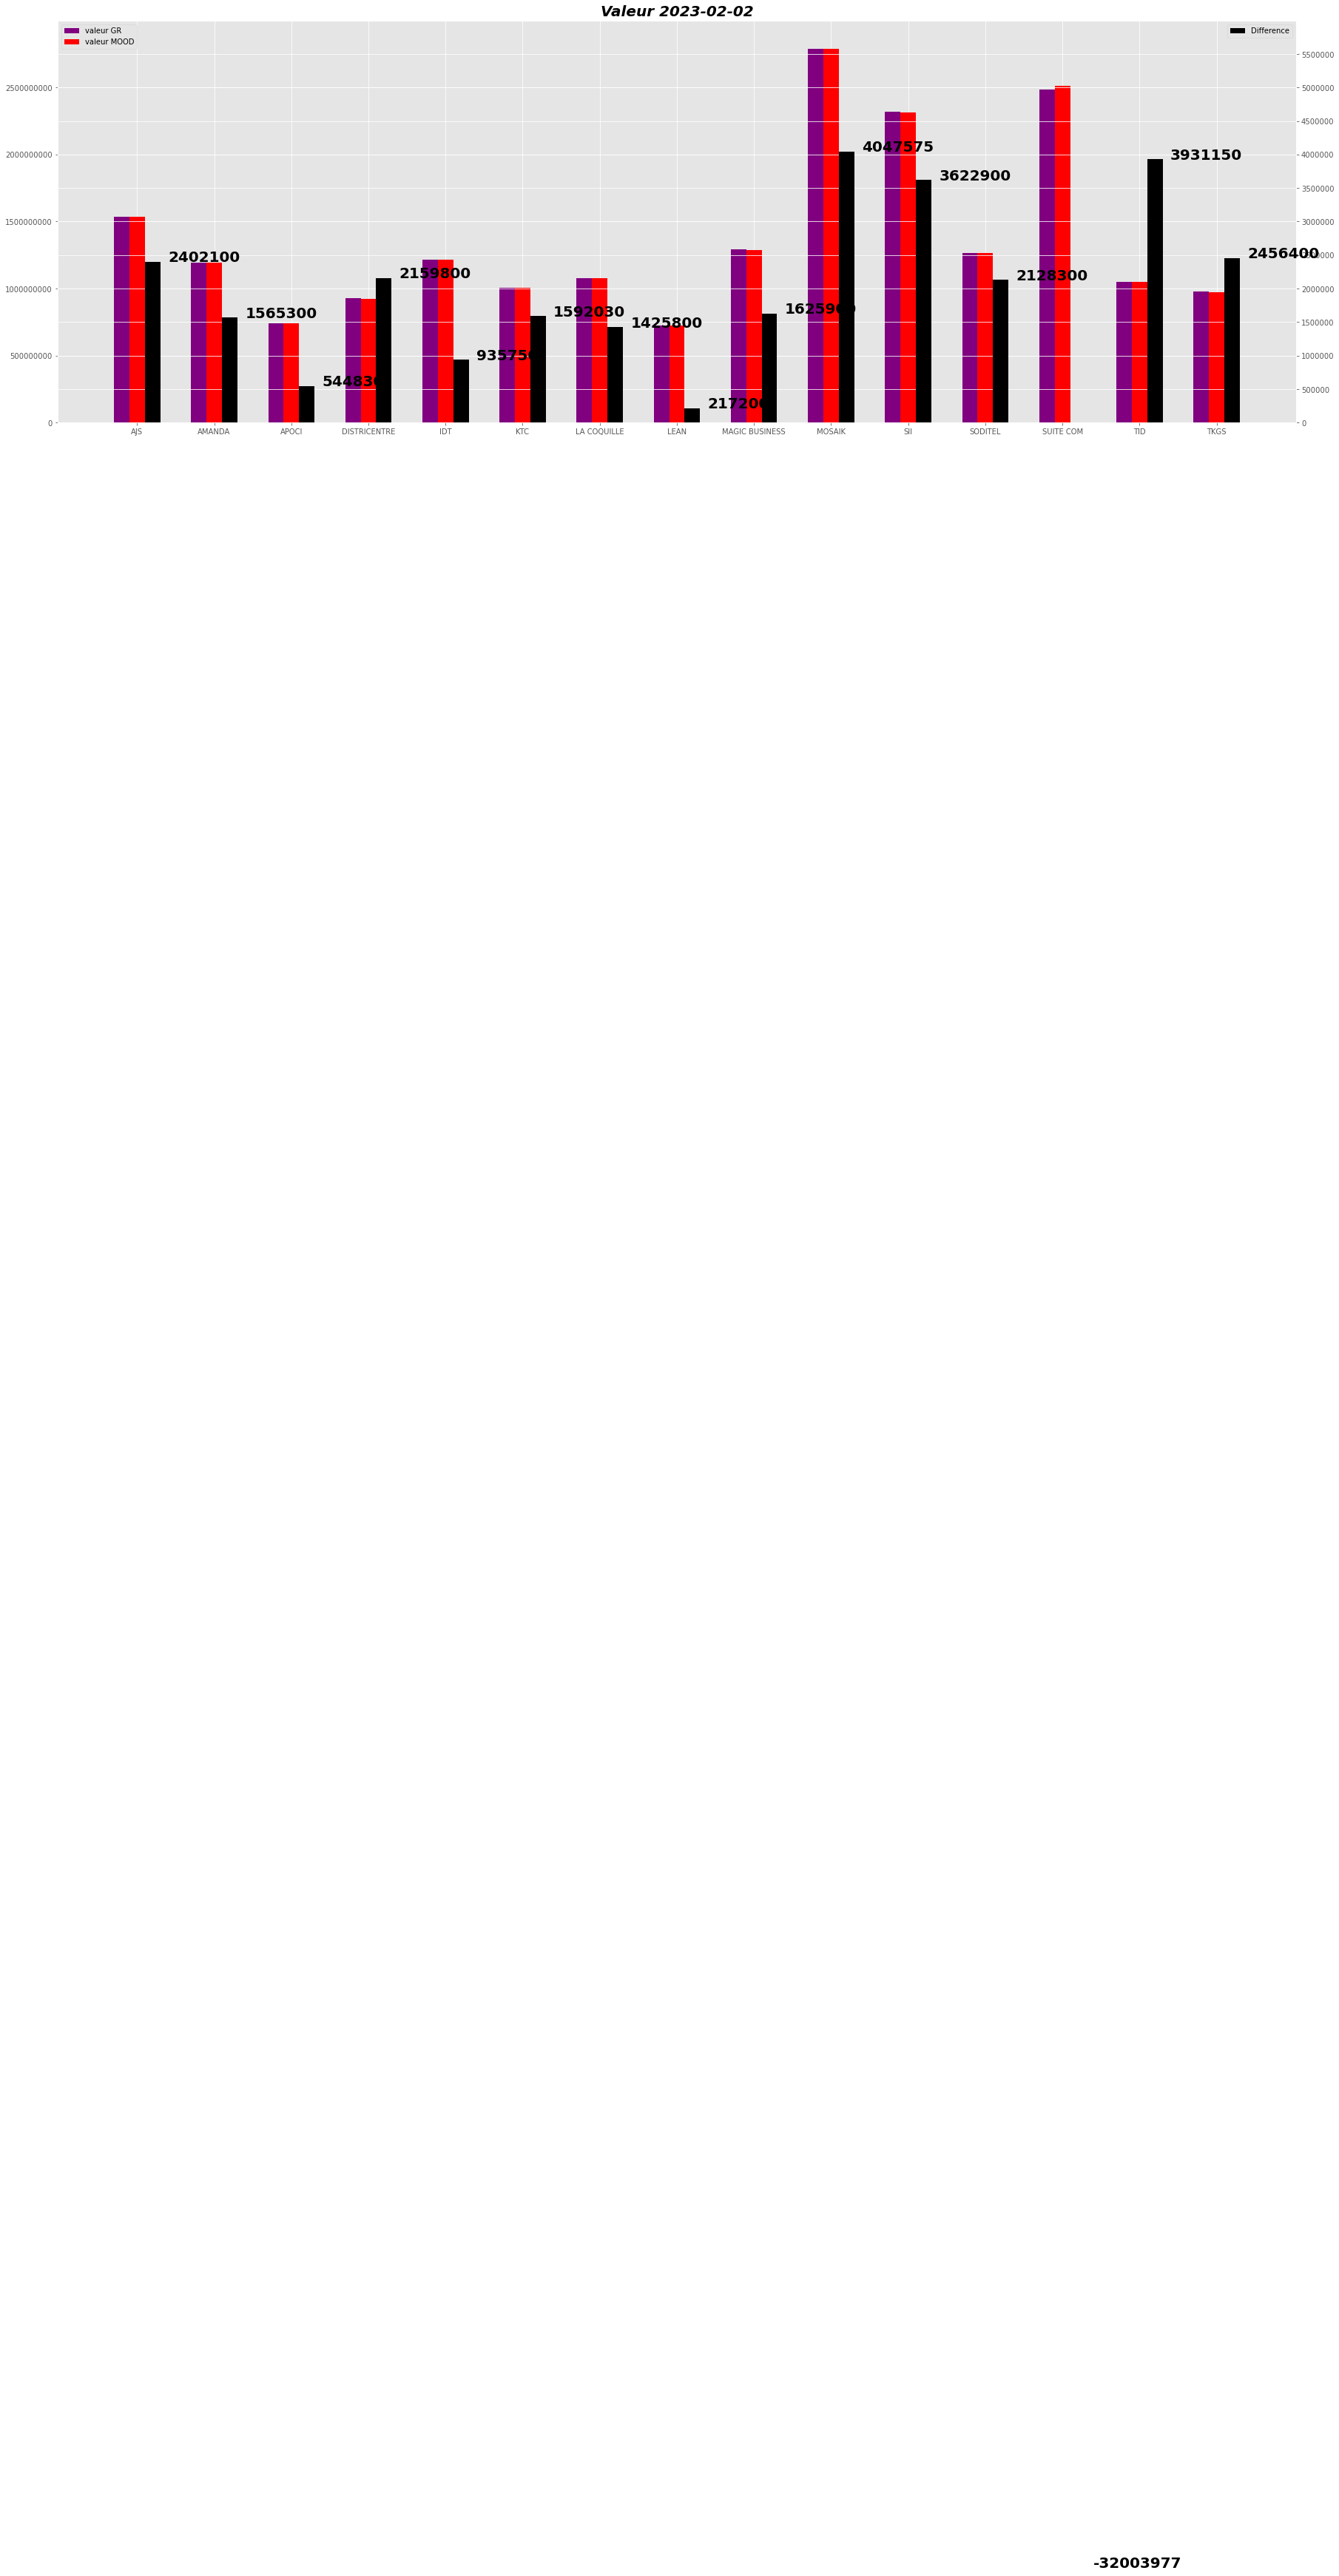

In [129]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

group1 = list(df3["valeur_gr"])
group2 = list(df3["valeur_mood"])
group3 = list(df3["difference_valeur"])

fig, ax = plt.subplots(figsize=(30,10))

bar_width = 0.2

bar1 = ax.bar(x=range(len(group1)), height=group1, width=bar_width, label='valeur GR', color='purple')
bar2 = ax.bar(x=[i + bar_width for i in range(len(group2))], height=group2, width=bar_width, label='valeur MOOD', color='red')

ax2 = ax.twinx()
bar3 = ax2.bar(x=[i + 2 * bar_width for i in range(len(group3))], height=group3, width=bar_width, label='Difference', color='black')

ax.set_xticks([i + bar_width for i in range(len(group1))])
ax.set_xticklabels(list(df3["partenaire_new"]))

# set y-axis limits for Group 1 and Group 2
ax.set_ylim(0, 3000000000)

# set y-axis step size for Group 1 and Group 2
ax.set_yticks(range(0, 3000000000, 500000000))
ax.ticklabel_format(style='plain', axis='y')

# set y-axis limits for Group 3
ax2.set_ylim(0, 6000000)

# set y-axis step size for Group 3
ax2.set_yticks(range(0, 6000000, 500000))
ax2.ticklabel_format(style='plain', axis='y')


# Add values on the plot (only for Group 3)
x = [i + 2 * bar_width for i in range(len(group3))]
for i, v in enumerate(group3):
    ax2.text(x[i]+bar_width, v-10 , str(v), color='black', fontweight='bold', fontsize=20)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title("Valeur 2023-02-02", fontsize = "20",fontstyle="italic", fontweight="bold")
plt.savefig("/nfs_sunshine/Valeur_2023_02_02_mood.png")


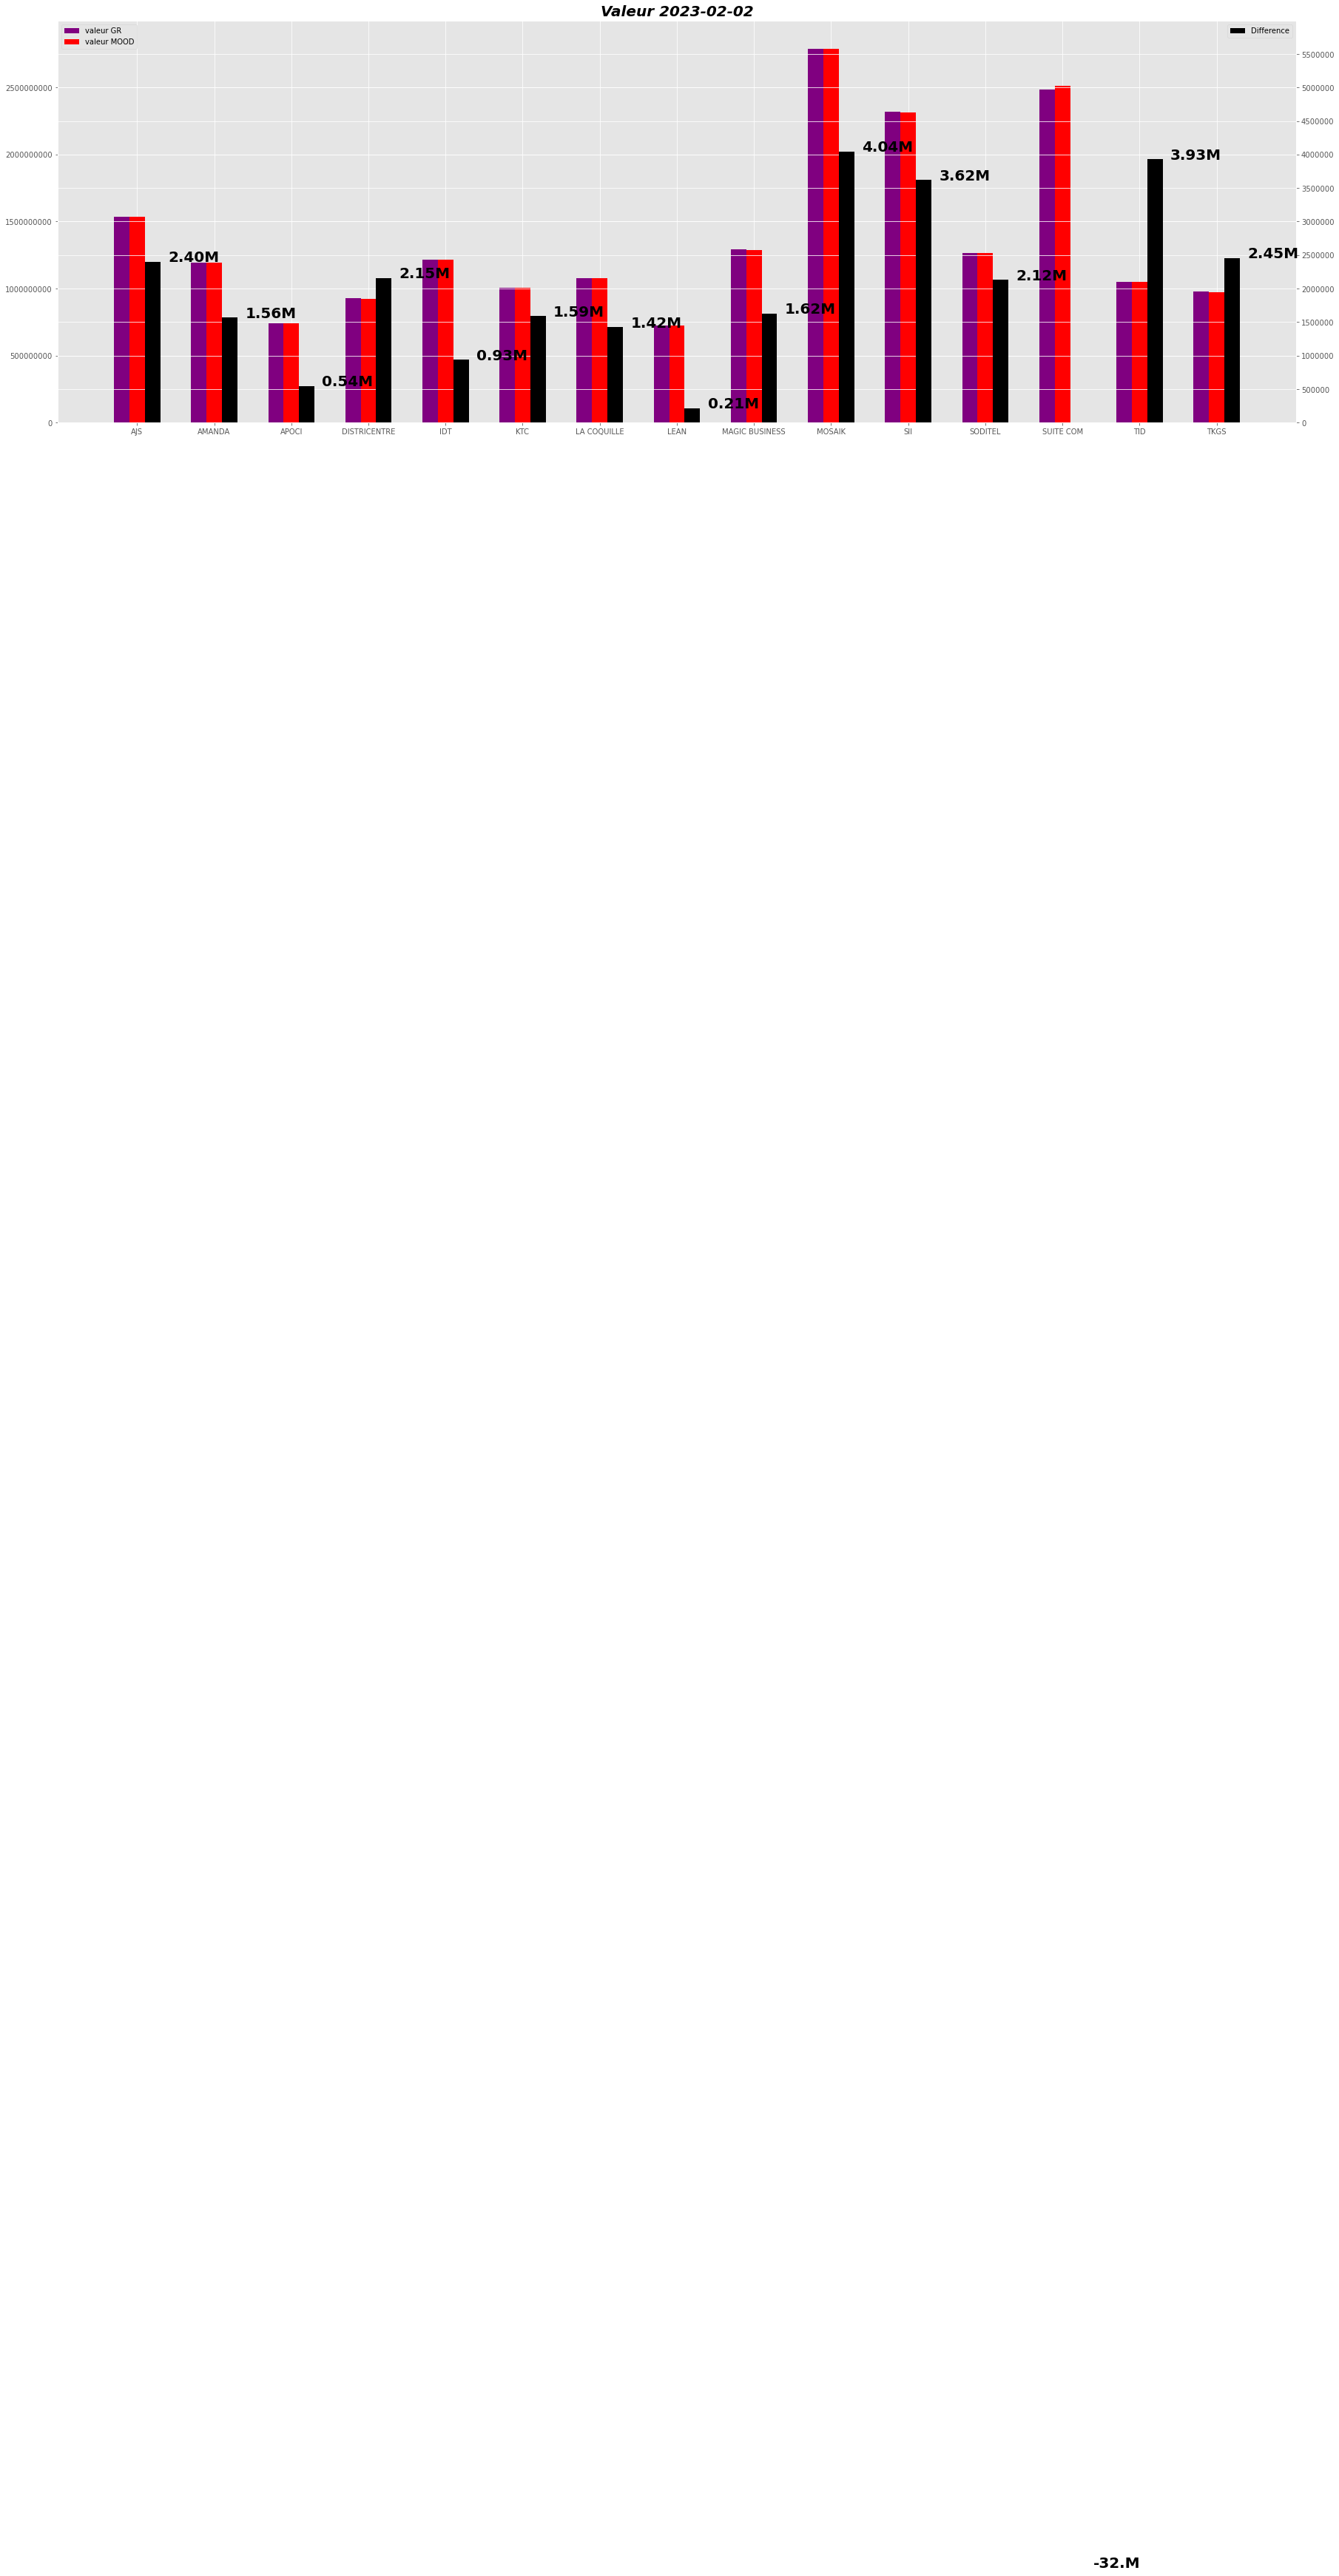

In [137]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

group1 = list(df3["valeur_gr"])
group2 = list(df3["valeur_mood"])
group3 = list(df3["difference_valeur"])

fig, ax = plt.subplots(figsize=(30,10))

bar_width = 0.2

bar1 = ax.bar(x=range(len(group1)), height=group1, width=bar_width, label='valeur GR', color='purple')
bar2 = ax.bar(x=[i + bar_width for i in range(len(group2))], height=group2, width=bar_width, label='valeur MOOD', color='red')

ax2 = ax.twinx()
bar3 = ax2.bar(x=[i + 2 * bar_width for i in range(len(group3))], height=group3, width=bar_width, label='Difference', color='black')

ax.set_xticks([i + bar_width for i in range(len(group1))])
ax.set_xticklabels(list(df3["partenaire_new"]))

# set y-axis limits for Group 1 and Group 2
ax.set_ylim(0, 3000000000)

# set y-axis step size for Group 1 and Group 2
ax.set_yticks(range(0, 3000000000, 500000000))
ax.ticklabel_format(style='plain', axis='y')

# set y-axis limits for Group 3
ax2.set_ylim(0, 6000000)

# set y-axis step size for Group 3
ax2.set_yticks(range(0, 6000000, 500000))
ax2.ticklabel_format(style='plain', axis='y')


# Add values on the plot (only for Group 3)
x = [i + 2 * bar_width for i in range(len(group3))]
for i, v in enumerate(group3):
    ax2.text(x[i]+bar_width, v-10 ,  str(v*10**(-6))[0:4] + "M", color='black', fontweight='bold', fontsize=20)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title("Valeur 2023-02-02", fontsize = "20",fontstyle="italic", fontweight="bold")
plt.savefig("Valeur_2023_02_02_mood_t.png")


In [74]:
df3.head()

,partenaire_new,difference_valeur,difference_volume,valeur_gr,volume_gr,valeur_mood,volume_mood
0,AJS,2402100,68,1.536286e+09,52238.0,1.533884e+09,52170.0
1,AMANDA,1565300,40,1.192669e+09,33377.0,1.191104e+09,33337.0
2,APOCI,544830,35,7.432881e+08,26382.0,7.427432e+08,26347.0
3,DISTRICENTRE,2159800,88,9.268497e+08,27372.0,9.246899e+08,27284.0
4,IDT,935750,80,1.217618e+09,41280.0,1.216682e+09,41200.0


In [75]:
keys = list(df3["partenaire_new"])
values = list(df3["difference_valeur"])

my_dict = dict(zip(keys, values))
print(my_dict)


{'AJS': 2402100, 'AMANDA': 1565300, 'APOCI': 544830, 'DISTRICENTRE': 2159800, 'IDT': 935750, 'KTC': 1592030, 'LA COQUILLE': 1425800, 'LEAN': 217200, 'MAGIC BUSINESS': 1625900, 'MOSAIK': 4047575, 'SII': 3622900, 'SODITEL': 2128300, 'SUITE COM': -32003977, 'TID': 3931150, 'TKGS': 2456400}


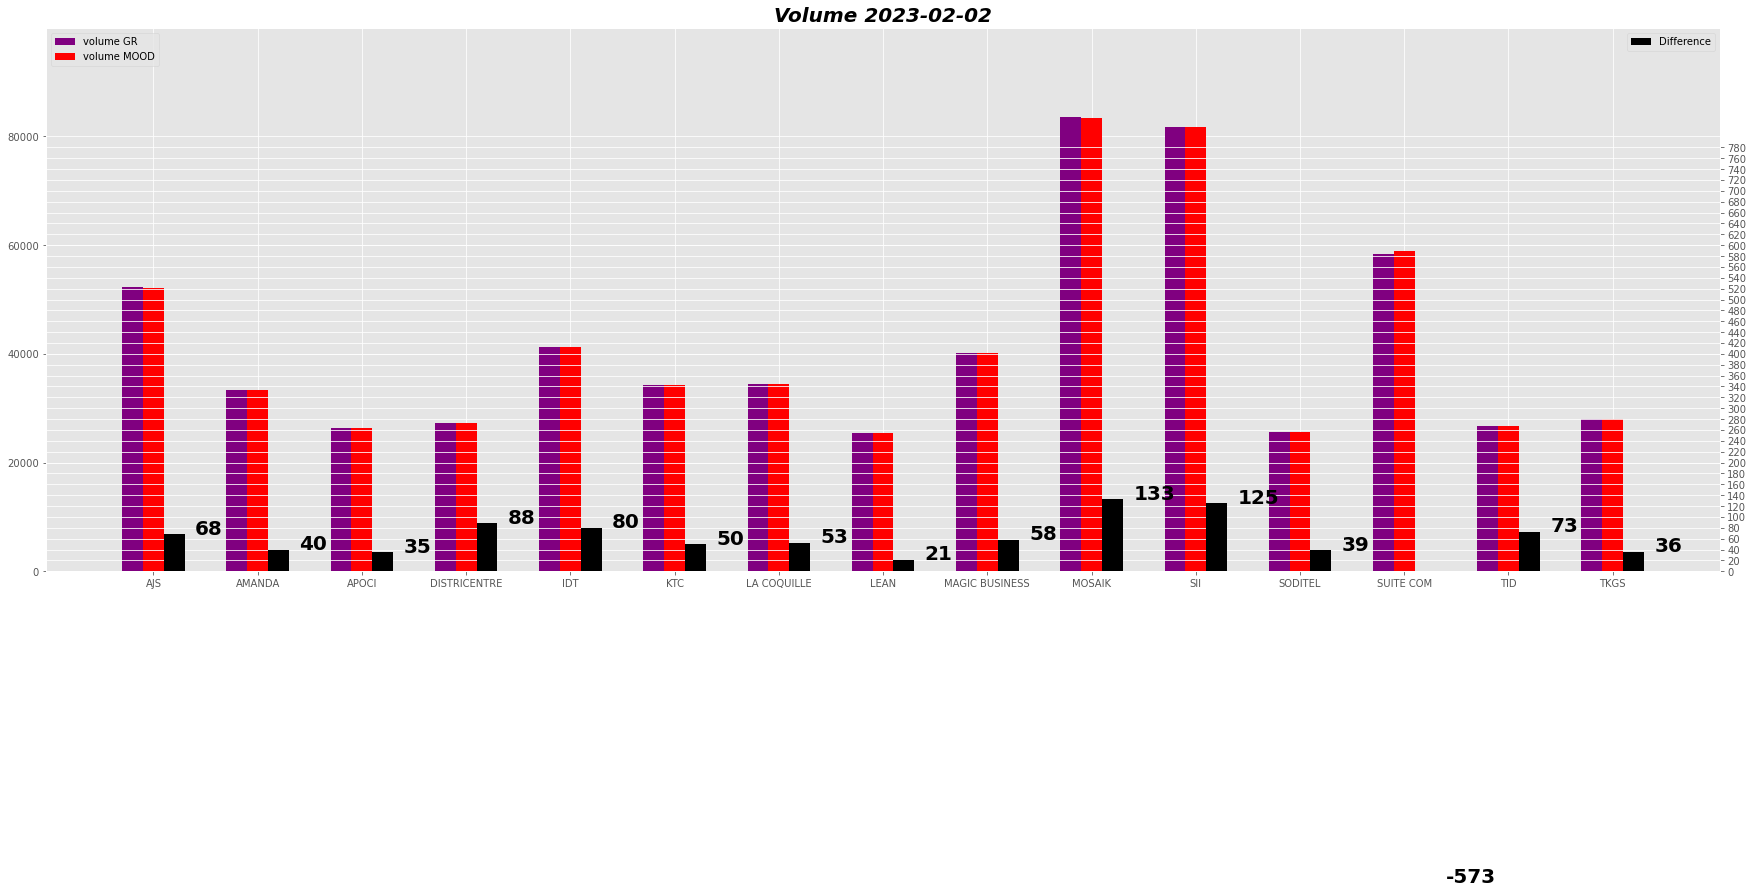

In [126]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

group1 = list(df3["volume_gr"])
group2 = list(df3["volume_mood"])
group3 = list(df3["difference_volume"])

fig, ax = plt.subplots(figsize=(30,10))

bar_width = 0.2

bar1 = ax.bar(x=range(len(group1)), height=group1, width=bar_width, label='volume GR', color='purple')
bar2 = ax.bar(x=[i + bar_width for i in range(len(group2))], height=group2, width=bar_width, label='volume MOOD', color='red')

ax2 = ax.twinx()
bar3 = ax2.bar(x=[i + 2 * bar_width for i in range(len(group3))], height=group3, width=bar_width, label='Difference', color='black')

ax.set_xticks([i + bar_width for i in range(len(group1))])
ax.set_xticklabels(list(df3["partenaire_new"]))

# set y-axis limits for Group 1 and Group 2
ax.set_ylim(0, 100000)

# set y-axis step size for Group 1 and Group 2
ax.set_yticks(range(0, 100000, 20000))

# set y-axis limits for Group 3
ax2.set_ylim(0, 1000)

# set y-axis step size for Group 3
ax2.set_yticks(range(0, 800, 20))


# Add values on the plot (only for Group 3)
x = [i + 2 * bar_width for i in range(len(group3))]
for i, v in enumerate(group3):
    ax2.text(x[i]+bar_width, v , str(v), color='black', fontweight='bold', fontsize=20)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title("Volume 2023-02-02", fontsize = "20", fontstyle="italic", fontweight="bold")
plt.savefig("Volume_2023_02_02_mood.png")

In [96]:
x

[0.4,
 1.4,
 2.4,
 3.4,
 4.4,
 5.4,
 6.4,
 7.4,
 8.4,
 9.4,
 10.4,
 11.4,
 12.4,
 13.4,
 14.4]

In [87]:
keys = list(df3["partenaire_new"])
values = list(df3["volume_gr"])

my_dict = dict(zip(keys, values))
print(my_dict)


{'AJS': 52238.0, 'AMANDA': 33377.0, 'APOCI': 26382.0, 'DISTRICENTRE': 27372.0, 'IDT': 41280.0, 'KTC': 34294.0, 'LA COQUILLE': 34534.0, 'LEAN': 25501.0, 'MAGIC BUSINESS': 40134.0, 'MOSAIK': 83601.0, 'SII': 81783.0, 'SODITEL': 25628.0, 'SUITE COM': 58328.0, 'TID': 26726.0, 'TKGS': 28094.0}


In [88]:
keys = list(df3["partenaire_new"])
values = list(df3["volume_mood"])

my_dict = dict(zip(keys, values))
print(my_dict)


{'AJS': 52170.0, 'AMANDA': 33337.0, 'APOCI': 26347.0, 'DISTRICENTRE': 27284.0, 'IDT': 41200.0, 'KTC': 34244.0, 'LA COQUILLE': 34481.0, 'LEAN': 25480.0, 'MAGIC BUSINESS': 40076.0, 'MOSAIK': 83468.0, 'SII': 81658.0, 'SODITEL': 25589.0, 'SUITE COM': 58901.0, 'TID': 26653.0, 'TKGS': 28058.0}


In [89]:
keys = list(df3["partenaire_new"])
values = list(df3["difference_volume"])

my_dict = dict(zip(keys, values))
print(my_dict)


{'AJS': 68, 'AMANDA': 40, 'APOCI': 35, 'DISTRICENTRE': 88, 'IDT': 80, 'KTC': 50, 'LA COQUILLE': 53, 'LEAN': 21, 'MAGIC BUSINESS': 58, 'MOSAIK': 133, 'SII': 125, 'SODITEL': 39, 'SUITE COM': -573, 'TID': 73, 'TKGS': 36}


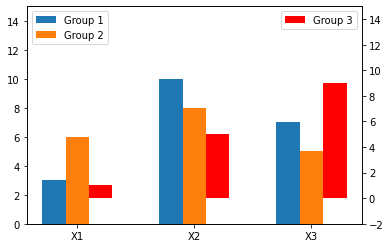

In [77]:
import matplotlib.pyplot as plt

group1 = [3, 10, 7]
group2 = [6, 8, 5]
group3 = [1, 5, 9]

fig, ax = plt.subplots()

bar_width = 0.2

bar1 = ax.bar(x=range(len(group1)), height=group1, width=bar_width, label='Group 1')
bar2 = ax.bar(x=[i + bar_width for i in range(len(group2))], height=group2, width=bar_width, label='Group 2')

ax2 = ax.twinx()
bar3 = ax2.bar(x=[i + 2 * bar_width for i in range(len(group3))], height=group3, width=bar_width, label='Group 3', color='red')

ax.set_xticks([i + bar_width for i in range(len(group1))])
ax.set_xticklabels(['X1', 'X2', 'X3'])

# set y-axis limits for Group 1 and Group 2
ax.set_ylim(0, 15)

# set y-axis step size for Group 1 and Group 2
ax.set_yticks(range(0, 16, 2))

# set y-axis limits for Group 3
ax2.set_ylim(0, 15)

# set y-axis step size for Group 3
ax2.set_yticks(range(-2, 16, 2))

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [140]:
df3.head()

,partenaire_new,difference_valeur,difference_volume,valeur_gr,volume_gr,valeur_mood,volume_mood
0,AJS,2402100,68,1.536286e+09,52238.0,1.533884e+09,52170.0
1,AMANDA,1565300,40,1.192669e+09,33377.0,1.191104e+09,33337.0
2,APOCI,544830,35,7.432881e+08,26382.0,7.427432e+08,26347.0
3,DISTRICENTRE,2159800,88,9.268497e+08,27372.0,9.246899e+08,27284.0
4,IDT,935750,80,1.217618e+09,41280.0,1.216682e+09,41200.0


In [142]:
df3[df3["partenaire_new"] == "SUITE COM"]

,partenaire_new,difference_valeur,difference_volume,valeur_gr,volume_gr,valeur_mood,volume_mood
12,SUITE COM,-32003977,-573,2.482008e+09,58328.0,2.514012e+09,58901.0


In [146]:
df3.head()

,partenaire_new,difference_valeur,difference_volume,valeur_gr,volume_gr,valeur_mood,volume_mood
0,AJS,1834200,72,1.475498e+09,53192.0,1.473664e+09,53120.0
1,AMANDA,754650,36,1.002861e+09,30355.0,1.002106e+09,30319.0
2,APOCI,529050,28,6.989585e+08,24679.0,6.984294e+08,24651.0
3,DISTRICENTRE,1649950,77,8.402427e+08,26255.0,8.385928e+08,26178.0
4,IDT,594672,68,1.131993e+09,39732.0,1.131399e+09,39664.0


In [147]:
df3["difference_valeur"] = df3["difference_valeur"].apply(lambda x : x if x > 0 else 0)

In [148]:
df3.head()

,partenaire_new,difference_valeur,difference_volume,valeur_gr,volume_gr,valeur_mood,volume_mood
0,AJS,1834200,72,1.475498e+09,53192.0,1.473664e+09,53120.0
1,AMANDA,754650,36,1.002861e+09,30355.0,1.002106e+09,30319.0
2,APOCI,529050,28,6.989585e+08,24679.0,6.984294e+08,24651.0
3,DISTRICENTRE,1649950,77,8.402427e+08,26255.0,8.385928e+08,26178.0
4,IDT,594672,68,1.131993e+09,39732.0,1.131399e+09,39664.0


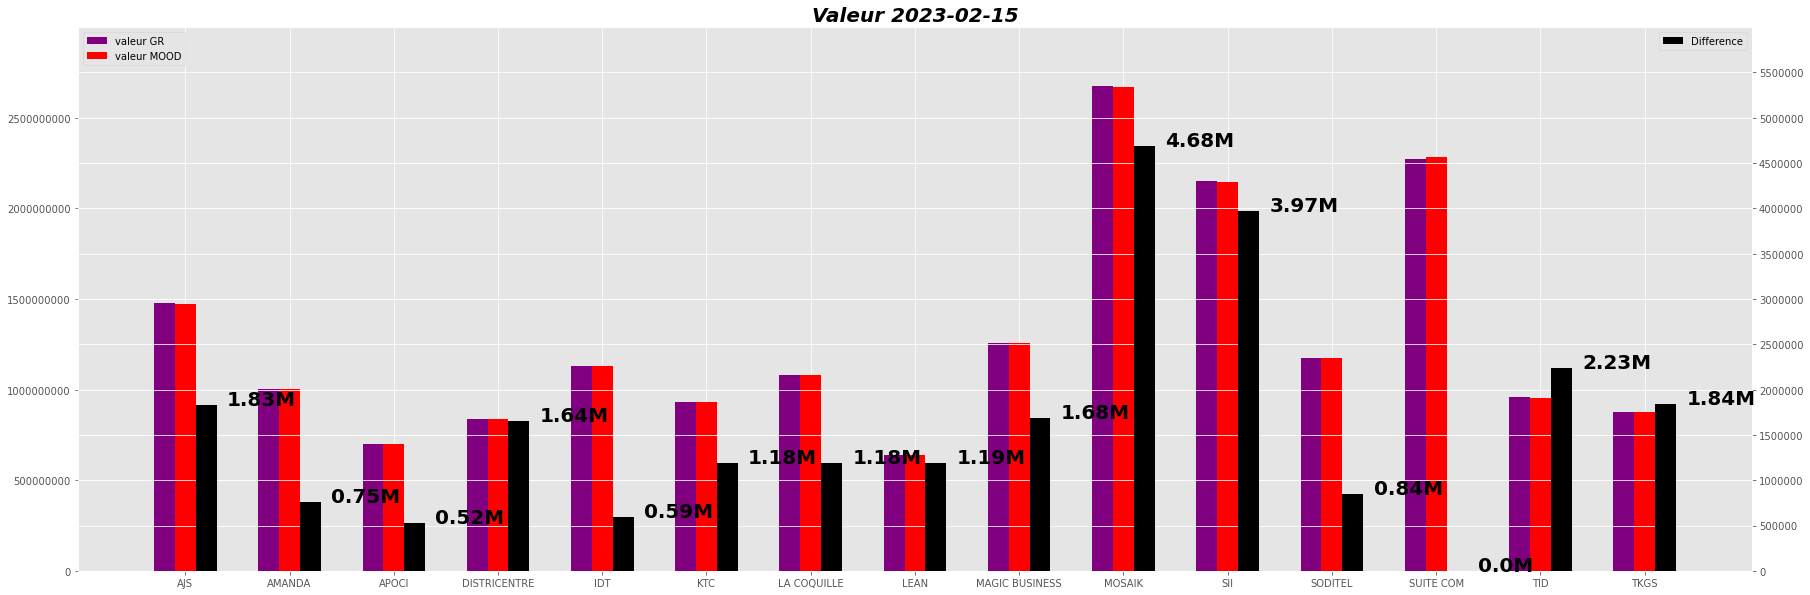

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

df = pd.read_csv("/Users/diakite/Downloads/Mood_Etancheite_DG_20230215.csv", sep = ";")
df.head()

df.drop(labels=[5], inplace=True)

df["difference_valeur"] = df["difference_valeur1"] + df["difference_valeur2"]
df["difference_volume"] = df["difference_volume1"] + df["difference_volume2"]

df["valeur_gr"] = df["valeur_gr1"] + df["valeur_gr2"]
df["volume_gr"] = df["volume_gr1"] + df["volume_gr2"]

df["valeur_mood"] = df["valeur_mood1"] + df["valeur_mood2"]
df["volume_mood"] = df["volume_mood1"] + df["volume_mood2"]

df3 = df.groupby("partenaire_new", as_index=False).agg( difference_valeur = ("difference_valeur","sum") ,
                                  difference_volume = ("difference_volume", "sum") ,  
                                  valeur_gr = ("valeur_gr", "sum") ,
                                  volume_gr = ("volume_gr","sum"),  
                                  valeur_mood = ("valeur_mood", "sum"), 
                                  volume_mood = ("volume_mood", "sum") 
                                )

df3["difference_valeur"] = df3["difference_valeur"].apply(lambda x : x if x > 0 else 0)

group1 = list(df3["valeur_gr"])
group2 = list(df3["valeur_mood"])
group3 = list(df3["difference_valeur"])

fig, ax = plt.subplots(figsize=(30,10))

bar_width = 0.2

bar1 = ax.bar(x=range(len(group1)), height=group1, width=bar_width, label='valeur GR', color='purple')
bar2 = ax.bar(x=[i + bar_width for i in range(len(group2))], height=group2, width=bar_width, label='valeur MOOD', color='red')

ax2 = ax.twinx()
bar3 = ax2.bar(x=[i + 2 * bar_width for i in range(len(group3))], height=group3, width=bar_width, label='Difference', color='black')

ax.set_xticks([i + bar_width for i in range(len(group1))])
ax.set_xticklabels(list(df3["partenaire_new"]))

# set y-axis limits for Group 1 and Group 2
ax.set_ylim(0, 3000000000)

# set y-axis step size for Group 1 and Group 2
ax.set_yticks(range(0, 3000000000, 500000000))
ax.ticklabel_format(style='plain', axis='y')

# set y-axis limits for Group 3
ax2.set_ylim(0, 6000000)

# set y-axis step size for Group 3
ax2.set_yticks(range(0, 6000000, 500000))
ax2.ticklabel_format(style='plain', axis='y')

# Add values on the plot (only for Group 3)
x = [i + 2 * bar_width for i in range(len(group3))]
for i, v in enumerate(group3):
    ax2.text(x[i]+bar_width, v-10 ,  str(v*10**(-6))[0:4] + "M", color='black', fontweight='bold', fontsize=20)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title("Valeur 2023-02-15", fontsize = "20",fontstyle="italic", fontweight="bold")
plt.savefig("Valeur_2023_02_02_mood.png")


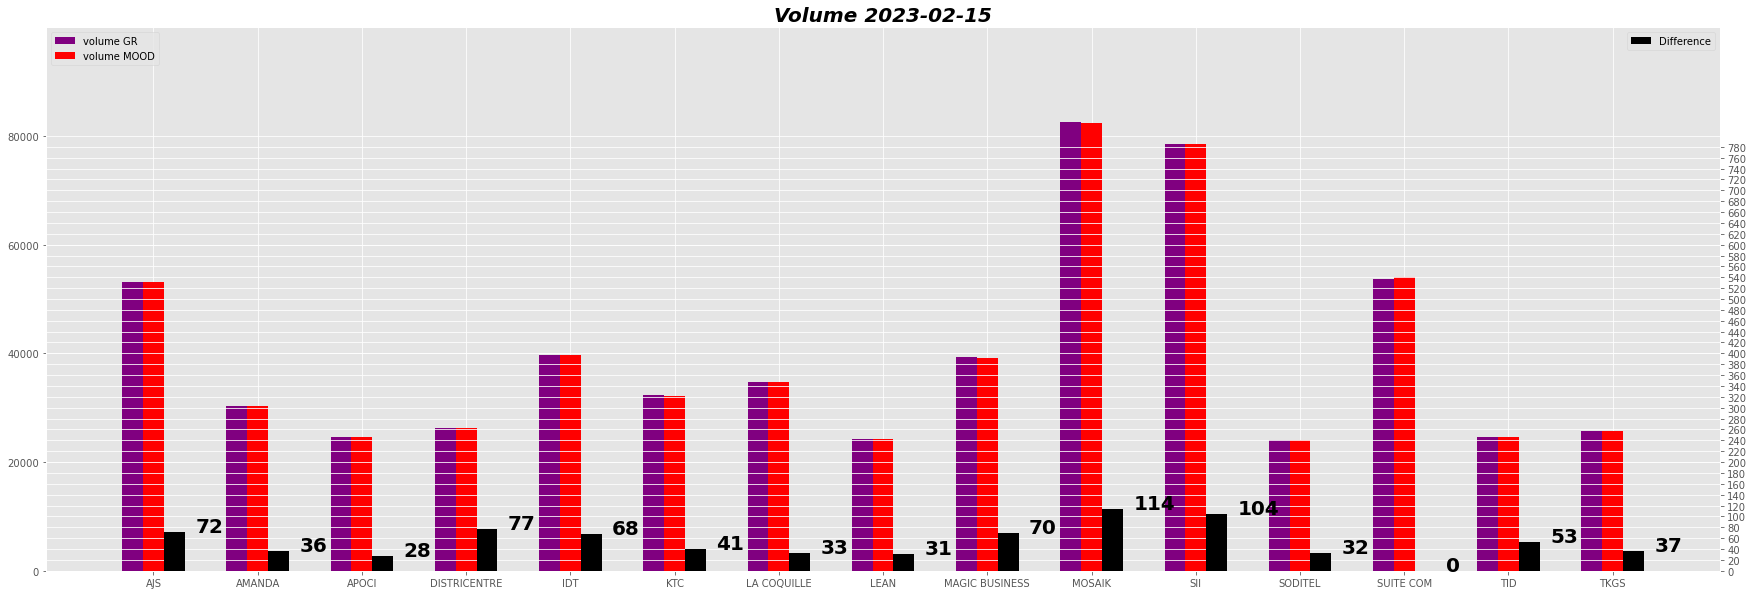

In [157]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

group1 = list(df3["volume_gr"])
group2 = list(df3["volume_mood"])
group3 = list(df3["difference_volume"])

df3["difference_volume"] = df3["difference_volume"].apply(lambda x : x if x > 0 else 0)

fig, ax = plt.subplots(figsize=(30,10))

bar_width = 0.2

bar1 = ax.bar(x=range(len(group1)), height=group1, width=bar_width, label='volume GR', color='purple')
bar2 = ax.bar(x=[i + bar_width for i in range(len(group2))], height=group2, width=bar_width, label='volume MOOD', color='red')

ax2 = ax.twinx()
bar3 = ax2.bar(x=[i + 2 * bar_width for i in range(len(group3))], height=group3, width=bar_width, label='Difference', color='black')

ax.set_xticks([i + bar_width for i in range(len(group1))])
ax.set_xticklabels(list(df3["partenaire_new"]))

# set y-axis limits for Group 1 and Group 2
ax.set_ylim(0, 100000)

# set y-axis step size for Group 1 and Group 2
ax.set_yticks(range(0, 100000, 20000))

# set y-axis limits for Group 3
ax2.set_ylim(0, 1000)

# set y-axis step size for Group 3
ax2.set_yticks(range(0, 800, 20))


# Add values on the plot (only for Group 3)
x = [i + 2 * bar_width for i in range(len(group3))]
for i, v in enumerate(group3):
    ax2.text(x[i]+bar_width, v , str(v), color='black', fontweight='bold', fontsize=20)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title("Volume 2023-02-15", fontsize = "20", fontstyle="italic", fontweight="bold")
plt.savefig("Volume_2023_02_02_mood.png")

In [156]:
df3["difference_volume"].unique()

array([ 72,  36,  28,  77,  68,  41,  33,  31,  70, 114, 104,  32,   0,
        53,  37])

In [154]:
df3["difference_volume"] = df3["difference_volume"].apply(lambda x : x if x > 0 else 0)

In [155]:
df3

,partenaire_new,difference_valeur,difference_volume,valeur_gr,volume_gr,valeur_mood,volume_mood
0,AJS,1834200,72,1.475498e+09,53192.0,1.473664e+09,53120.0
1,AMANDA,754650,36,1.002861e+09,30355.0,1.002106e+09,30319.0
2,APOCI,529050,28,6.989585e+08,24679.0,6.984294e+08,24651.0
3,DISTRICENTRE,1649950,77,8.402427e+08,26255.0,8.385928e+08,26178.0
4,IDT,594672,68,1.131993e+09,39732.0,1.131399e+09,39664.0
...,...,...,...,...,...,...,...
10,SII,3970950,104,2.148507e+09,78576.0,2.144536e+09,78472.0
11,SODITEL,849150,32,1.177133e+09,24054.0,1.176284e+09,24022.0
12,SUITE COM,0,0,2.270176e+09,53755.0,2.285972e+09,54000.0
13,TID,2233200,53,9.582982e+08,24593.0,9.560650e+08,24540.0


In [ ]:
df3["difference_volume"] = df3["difference_volume"]

In [153]:
df3

,partenaire_new,difference_valeur,difference_volume,valeur_gr,volume_gr,valeur_mood,volume_mood
0,AJS,1834200,72,1.475498e+09,53192.0,1.473664e+09,53120.0
1,AMANDA,754650,36,1.002861e+09,30355.0,1.002106e+09,30319.0
2,APOCI,529050,28,6.989585e+08,24679.0,6.984294e+08,24651.0
3,DISTRICENTRE,1649950,77,8.402427e+08,26255.0,8.385928e+08,26178.0
4,IDT,594672,68,1.131993e+09,39732.0,1.131399e+09,39664.0
...,...,...,...,...,...,...,...
10,SII,3970950,104,2.148507e+09,78576.0,2.144536e+09,78472.0
11,SODITEL,849150,32,1.177133e+09,24054.0,1.176284e+09,24022.0
12,SUITE COM,0,0,2.270176e+09,53755.0,2.285972e+09,54000.0
13,TID,2233200,53,9.582982e+08,24593.0,9.560650e+08,24540.0


In [162]:
df = pd.read_csv("/Users/diakite/Downloads/Mood_Etancheite_DG_20230215.csv", sep = ";")
df.head(50)

,valeur_mood1,volume_mood1,valeur_mood2,volume_mood2,valeur_gr1,volume_gr1,valeur_gr2,volume_gr2,difference_valeur1,difference_volume1,difference_valeur2,difference_volume2,owner_msisdn,partenaire_new
0,1.590877e+07,1032.0,8.416145e+06,559.0,1.591077e+07,1034.0,8.455845e+06,561.0,2000,2,39700,2,747118290.0,SODITEL
1,1.383214e+07,1496.0,1.872015e+07,1549.0,1.383214e+07,1496.0,1.876020e+07,1554.0,0,0,40050,5,768378030.0,LEAN
2,4.060781e+07,529.0,1.396520e+07,276.0,4.067281e+07,531.0,1.396520e+07,276.0,65000,2,0,0,707068309.0,SODITEL
3,3.851087e+08,12447.0,4.226997e+08,13207.0,3.860468e+08,12465.0,4.228307e+08,13220.0,938050,18,131000,13,758025342.0,DISTRICENTRE
4,5.662250e+06,70.0,4.635750e+06,65.0,5.662250e+06,70.0,4.635750e+06,65.0,0,0,0,0,748383338.0,APOCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,3.700777e+08,13103.0,3.170512e+08,11301.0,3.703888e+08,13121.0,3.172691e+08,11311.0,311150,18,217900,10,711474464.0,APOCI
39,6.530193e+08,24301.0,6.218985e+08,22584.0,6.536630e+08,24332.0,6.223100e+08,22606.0,643700,31,411450,22,758024956.0,AJS
40,5.924884e+07,341.0,1.245707e+07,133.0,5.924884e+07,341.0,1.245707e+07,133.0,0,0,0,0,707103532.0,SUITE COM
41,1.349326e+09,43443.0,1.292721e+09,38708.0,1.350772e+09,43498.0,1.295964e+09,38767.0,1445730,55,3242850,59,708376099.0,MOSAIK


In [161]:
df.shape

(43, 14)

In [163]:
df.count()

valeur_mood1          42
volume_mood1          42
valeur_mood2          42
volume_mood2          42
valeur_gr1            42
volume_gr1            42
valeur_gr2            42
volume_gr2            42
difference_valeur1    43
difference_volume1    43
difference_valeur2    43
difference_volume2    43
owner_msisdn          42
partenaire_new        42
dtype: int64

In [167]:
df.dropna(inplace = True)

In [8]:
file_path = "/Users/diakite/Downloads/part-00011-ce54071b-65b5-46b8-980f-b46e804d9d63.c000.snappy.parquet"

df = flatten_explode_df(flatten_explode_df(spark.read.parquet(file_path)))


In [12]:
df.select("value").show(1,False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|value                                                                                                                                                                                                                                                                                                                                                                                                     |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [5]:
df = spark.read.parquet("/Users/diakite/Downloads/part-00011-ce54071b-65b5-46b8-980f-b46e804d9d63.c000.snappy.parquet")
df.show()



+--------------------+--------------------+----------------------+------+----+
|               value|   current_timestamp|dexa_current_timestamp|minute|week|
+--------------------+--------------------+----------------------+------+----+
|{"_id":"225074762...|2023-03-10 01:59:...|  2023-03-10 01:59:...|    59|  10|
|{"_id":"225070836...|2023-03-10 01:59:...|  2023-03-10 01:59:...|    59|  10|
+--------------------+--------------------+----------------------+------+----+



In [6]:
df = flatten_explode_df(flatten_explode_df(spark.read.parquet(file_path)))




In [7]:
df.show()

+--------------------+--------------------+----------------------+------+----+
|               value|   current_timestamp|dexa_current_timestamp|minute|week|
+--------------------+--------------------+----------------------+------+----+
|{"_id":"225074762...|2023-03-10 01:59:...|  2023-03-10 01:59:...|    59|  10|
|{"_id":"225070836...|2023-03-10 01:59:...|  2023-03-10 01:59:...|    59|  10|
+--------------------+--------------------+----------------------+------+----+



In [32]:

df = pd.read_csv("/Users/diakite/Downloads/random_omci.csv", sep = " ")
df1 = df[["index", "Unnamed: 6", "Unnamed: 7"]].rename(columns={ "index" : "index", "Unnamed: 6" : "count" , "Unnamed: 7" : "time" })
df1[df1["index"] != "index"].head()


,index,count,time
0,random_commissions_fixes_v2_20230101,21736.0,2023-02-09T21:55:55.398Z
2,random_commissions_fixes_v2_20230102,27899.0,2023-02-09T21:58:11.427Z
4,random_commissions_fixes_v2_20230103,33488.0,2023-02-09T21:58:38.191Z
6,random_commissions_fixes_v2_20230104,35031.0,2023-01-05T23:19:59.954Z
8,random_commissions_fixes_v2_20230105,35739.0,2023-01-06T10:11:20.939Z


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   379 non-null    object 
 1   count   190 non-null    float64
 2   time    190 non-null    object 
dtypes: float64(1), object(2)
memory usage: 9.0+ KB


In [35]:
df1['hour'] = df1['time'].str.split('T').str[1].str.split(':').str[0].astype(int)
df1['day'] = pd.to_datetime(df1['time']).dt.day


ValueError: cannot convert float NaN to integer

In [23]:
def ff(string) : 
    return string.split(" ")
    

In [24]:
df['index                                docs.count creation.date.string'].apply(ff)

0      [random_commissions_fixes_v2_20230101, , , , ,...
1      [index, , , , , , , , , , , , , , , , , , , , ...
2      [random_commissions_fixes_v2_20230102, , , , ,...
3      [index, , , , , , , , , , , , , , , , , , , , ...
4      [random_commissions_fixes_v2_20230103, , , , ,...
5      [index, , , , , , , , , , , , , , , , , , , , ...
6      [random_commissions_fixes_v2_20230104, , , , ,...
7      [index, , , , , , , , , , , , , , , , , , , , ...
8      [random_commissions_fixes_v2_20230105, , , , ,...
9      [index, , , , , , , , , , , , , , , , , , , , ...
10     [random_commissions_fixes_v2_20230106, , , , ,...
11     [index, , , , , , , , , , , , , , , , , , , , ...
12     [random_commissions_fixes_v2_20230107, , , , ,...
13     [index, , , , , , , , , , , , , , , , , , , , ...
14     [random_commissions_fixes_v2_20230108, , , , ,...
15     [index, , , , , , , , , , , , , , , , , , , , ...
16     [random_commissions_fixes_v2_20230109, , , , ,...
17     [index, , , , , , , , , 

In [25]:
df['index                                docs.count creation.date.string'].apply(ff).head

<bound method NDFrame.head of 0      [random_commissions_fixes_v2_20230101, , , , ,...
1      [index, , , , , , , , , , , , , , , , , , , , ...
2      [random_commissions_fixes_v2_20230102, , , , ,...
3      [index, , , , , , , , , , , , , , , , , , , , ...
4      [random_commissions_fixes_v2_20230103, , , , ,...
5      [index, , , , , , , , , , , , , , , , , , , , ...
6      [random_commissions_fixes_v2_20230104, , , , ,...
7      [index, , , , , , , , , , , , , , , , , , , , ...
8      [random_commissions_fixes_v2_20230105, , , , ,...
9      [index, , , , , , , , , , , , , , , , , , , , ...
10     [random_commissions_fixes_v2_20230106, , , , ,...
11     [index, , , , , , , , , , , , , , , , , , , , ...
12     [random_commissions_fixes_v2_20230107, , , , ,...
13     [index, , , , , , , , , , , , , , , , , , , , ...
14     [random_commissions_fixes_v2_20230108, , , , ,...
15     [index, , , , , , , , , , , , , , , , , , , , ...
16     [random_commissions_fixes_v2_20230109, , , , ,...
1

In [38]:
df2 = df1[df1["index"] != "index"]

In [42]:
df2.head(190)

,index,count,time
0,random_commissions_fixes_v2_20230101,21736.0,2023-02-09T21:55:55.398Z
2,random_commissions_fixes_v2_20230102,27899.0,2023-02-09T21:58:11.427Z
4,random_commissions_fixes_v2_20230103,33488.0,2023-02-09T21:58:38.191Z
6,random_commissions_fixes_v2_20230104,35031.0,2023-01-05T23:19:59.954Z
8,random_commissions_fixes_v2_20230105,35739.0,2023-01-06T10:11:20.939Z
...,...,...,...
370,random_commissions_fixes_v2_20230705,39211.0,2023-07-06T18:54:43.780Z
372,random_commissions_fixes_v2_20230706,38897.0,2023-07-07T19:28:45.149Z
374,random_commissions_fixes_v2_20230707,39133.0,2023-07-08T09:52:56.782Z
376,random_commissions_fixes_v2_20230708,37329.0,2023-07-09T07:10:53.530Z


In [ ]:
from datetime import datetime

t = "2023-02-09T21:55:55.398Z"
dt = datetime.fromisoformat(t[:-1])  # convert ISO format to datetime object
tt = dt.strftime("%Y-%m-%d")  # extract date as string in desired format
hh = dt.strftime("%H:%M")  # extract time as string in desired format

print(tt)  # output: 2023-02-09
print(hh)  # output: 21:55


In [53]:
from datetime import datetime

def get_day(char) : 
    return datetime.fromisoformat(char[:-1]).strftime("%Y-%m-%d")
    
def get_hour(char) : 
    return datetime.fromisoformat(char[:-1]).strftime("%H:%M")   


In [56]:
df2["day"] = df2["time"].astype(str).apply(get_day)
df2["hour"] = df2["time"].astype(str).apply(get_hour)

/var/folders/b7/pj4f3ws14fl09641x7pq364w0000gn/T/ipykernel_3073/2292422587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["day"] = df2["time"].astype(str).apply(get_day)
/var/folders/b7/pj4f3ws14fl09641x7pq364w0000gn/T/ipykernel_3073/2292422587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["hour"] = df2["time"].astype(str).apply(get_hour)


In [57]:
df2.head()

,index,count,time,day,hour
0,random_commissions_fixes_v2_20230101,21736.0,2023-02-09T21:55:55.398Z,2023-02-09,21:55
2,random_commissions_fixes_v2_20230102,27899.0,2023-02-09T21:58:11.427Z,2023-02-09,21:58
4,random_commissions_fixes_v2_20230103,33488.0,2023-02-09T21:58:38.191Z,2023-02-09,21:58
6,random_commissions_fixes_v2_20230104,35031.0,2023-01-05T23:19:59.954Z,2023-01-05,23:19
8,random_commissions_fixes_v2_20230105,35739.0,2023-01-06T10:11:20.939Z,2023-01-06,10:11


In [58]:
df2[["day", "hour"]].head()

,day,hour
0,2023-02-09,21:55
2,2023-02-09,21:58
4,2023-02-09,21:58
6,2023-01-05,23:19
8,2023-01-06,10:11


/var/folders/b7/pj4f3ws14fl09641x7pq364w0000gn/T/ipykernel_3073/1545725463.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["day"] = pd.to_datetime(df2["day"])
/var/folders/b7/pj4f3ws14fl09641x7pq364w0000gn/T/ipykernel_3073/1545725463.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["hour"] = pd.to_datetime(df2["hour"], format="%H:%M")


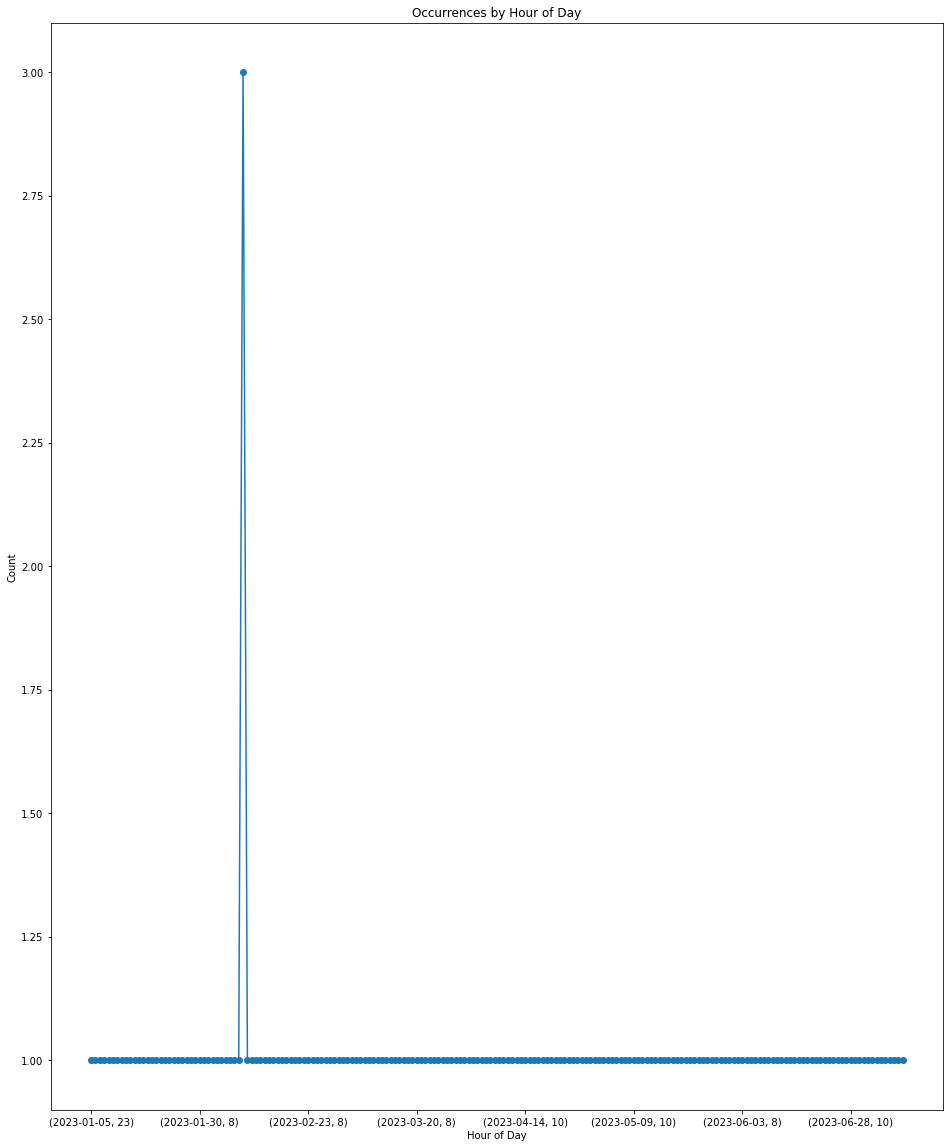

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# convert "day" and "hour" columns to datetime objects
df2["day"] = pd.to_datetime(df2["day"])
df2["hour"] = pd.to_datetime(df2["hour"], format="%H:%M")

# group DataFrame by day and hour, and count number of occurrences
counts = df2.groupby([df2["day"].dt.date, df2["hour"].dt.hour]).size()

# create plot
fig, ax = plt.subplots(figsize = (16,20))  #fig = plt.figure(figsize = (16,20))
counts.plot(ax=ax, kind="line", marker="o")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Count")
ax.set_title("Occurrences by Hour of Day")
plt.show()


In [55]:
df2["day"] = df2["time"].str.apply(get_day)
df2["hour"] = df2["time"].str.apply(get_hour)

AttributeError: 'StringMethods' object has no attribute 'apply'

In [64]:
df = df2

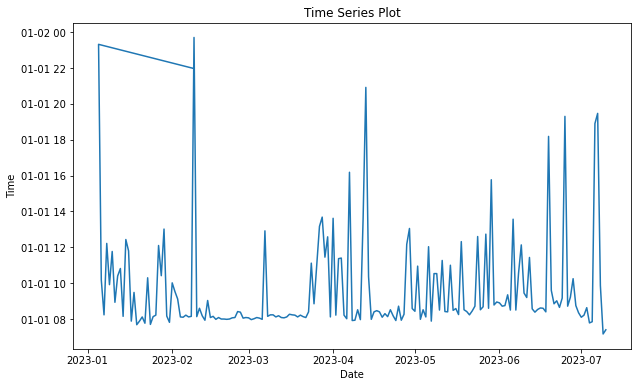

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a time series data in a Pandas DataFrame
# with a 'datetime' column and a 'value' column

# Extracting the date and time components from the datetime column

# Plotting the time series
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.plot(df['day'], df['hour'])  # Plotting the date against the time

# Customizing the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Time')  # Y-axis label
plt.title('Time Series Plot')  # Title of the plot

# Display the plot
plt.show()

In [68]:
df2.head()

,index,count,time,day,hour
0,random_commissions_fixes_v2_20230101,21736.0,2023-02-09T21:55:55.398Z,2023-02-09,1900-01-01 21:55:00
2,random_commissions_fixes_v2_20230102,27899.0,2023-02-09T21:58:11.427Z,2023-02-09,1900-01-01 21:58:00
4,random_commissions_fixes_v2_20230103,33488.0,2023-02-09T21:58:38.191Z,2023-02-09,1900-01-01 21:58:00
6,random_commissions_fixes_v2_20230104,35031.0,2023-01-05T23:19:59.954Z,2023-01-05,1900-01-01 23:19:00
8,random_commissions_fixes_v2_20230105,35739.0,2023-01-06T10:11:20.939Z,2023-01-06,1900-01-01 10:11:00
